# **Section 1: Cover Page**

**2M01 Group 3: Liver Disease**

| Name                | Student ID      |
|---------------------|-----------------|
| Janell Lim Lin Ying | S10266035D      |
| Glenys Hoo Yi Qin   | S10259107D      |
| Lee Yu Chen         | S10268331J      |

Link to Colab: https://colab.research.google.com/drive/1lrm3zJ_KRMCfMcsHVwsEBpxEJt2xKT7E?usp=sharing
<br> Link to GitHub: https://github.com/janell-lly/nhanes-liver-disease-analysis

# **Section 2: Declaration of Contribution**

| Group Member       | Contribution      |
|--------------------|-----------------|
| Janell Lim Lin Ying| Variables, Loading & Cleaning Data, Tidying Up of Report |
| Glenys Hoo Yi Qin  | Clinical Significance of Variables, XGBoost |
| Lee Yu Chen        | Clinical Significance of Variables, Logistic Regression |

# **Section 3: Summary**

This project investigates liver health trends in U.S. adults by examining how 12 lifestyle, socioeconomic, and clinical factors — including BMI, physical activity, alcohol consumption and hypertension — influence liver enzyme levels. We focus on ALT, AST, GGT, and ALP, which serve as the primary biomarkers associated with hepatocellular injury and biliary tract dysfunction.

While clinical research frequently focuses on populations with established chronic conditions, this study places a unique emphasis on identifying subclinical liver stress in seemingly healthy individuals — specifically those within a normal BMI range or those who maintain active lifestyles.

By analysing data from 5 NHANES cycles (2009–2018), we utilise Logistic Regression to identify key risk associations and XGBoost to model complex, non-linear interactions between predictors. Ultimately, this project seeks to identify early warning signs of liver dysfunction within the general population, supporting the development of more inclusive and preventive public health strategies for managing chronic liver disease.

# **Section 4: Variables and Data Sources**

## **Section 4.1: Continuous Variables**

| Variable Name | SAS Label | Description | Clinical Significance & Justification | Data Source |
| :--- | :--- | :--- | :--- | :--- |
| **LBXSATSI** | ALT (U/L) | **Alanine Aminotransferase (U/L):** Serum concentration of the ALT enzyme. | A primary biomarker for hepatocellular injury. Elevated levels indicate leakage from damaged liver cells, commonly associated with NAFLD/MASLD or viral hepatitis. | BIOPRO_F – BIOPRO_J |
| **LBXSASSI** | AST (U/L) | **Aspartate Aminotransferase (U/L):** Serum concentration of the AST enzyme. | While indicative of liver damage, AST is also found in cardiac and skeletal muscle. It is included to allow for the analysis of the AST/ALT ratio, a key diagnostic indicator for specific liver pathologies. | BIOPRO_F – BIOPRO_J |
| **LBXSGTSI** | GGT (U/L) | **Gamma-Glutamyl Transferase (U/L):** Serum concentration of the GGT enzyme. | A sensitive indicator of biliary obstruction and alcohol-induced liver stress. It also serves as a proxy for oxidative stress and metabolic syndrome. | BIOPRO_F – BIOPRO_J |
| **LBXSAPSI** | ALP (U/L) | **Alkaline Phosphatase (U/L):** Total serum ALP enzyme concentration. | Primarily used to identify cholestasis (impaired bile flow) or infiltrative liver diseases. Higher levels often signal issues within the hepatobiliary system. | BIOPRO_F – BIOPRO_J |
| **BMXBMI** | BMI (kg/m²) | **Body Mass Index:** Calculated from the participant's measured height and weight. | A fundamental predictor of metabolic-associated liver disease. High BMI correlates with increased hepatic fat accumulation and systemic inflammation. | BMX_F – BMX_J |
| **BMXWAIST** | Waist (cm) | **Waist Circumference:** Measured at the uppermost lateral border of the hip bone (ilium). | A marker of visceral adiposity. Evidence suggests abdominal fat is more closely linked to liver fibrosis and insulin resistance than BMI alone. | BMX_F – BMX_J |
| **LBDSTRSI** | Trigly. (mmol/L) | **Triglycerides:** Serum triglyceride concentration. | Elevated triglycerides are a hallmark of dyslipidaemia and are strongly associated with hepatic steatosis (fatty liver) and overall metabolic dysfunction. | BIOPRO_F – BIOPRO_J |
| **LBXGH** | HbA1c (%) | **Glycohaemoglobin:** The percentage of haemoglobin with glucose attached. | Reflects average blood glucose over a three-month period. High levels indicate insulin resistance, which is a major driver of liver inflammation and stiffness. | GHB_F – GHB_J |
| **RIDAGEYR** | Age (Years) | **Age at Screening:** The age of the participant at the time of health screening. | Included to account for the cumulative effect of metabolic stress and the natural decline in hepatic regenerative capacity over time. | DEMO_F – DEMO_J |
| **INDFMPIR** | PIR Ratio | **Poverty Income Ratio:** Ratio of family income to the poverty threshold. | A socioeconomic proxy. Lower PIR values are associated with health disparities, including limited access to nutritious food and preventative healthcare. | DEMO_F – DEMO_J

## **Section 4.2: Categorical Variables**

| Variable Name | SAS Label | Description & Coding | Clinical Significance & Justification | Data Source |
| :--- | :--- | :--- | :--- | :--- |
| **RIAGENDR** | Gender | **Gender:** 1 = Male; 2 = Female. | Biological sex influences liver enzyme baselines. Males typically exhibit higher ALT and GGT levels due to hormonal profiles and differences in hepatic metabolism. | DEMO_F – DEMO_J |
| **RIDRETH3** | Race/Eth. | **Race/Ethnicity:** 1 = Mexican American; 2 = Other Hispanic; 3 = Non-Hispanic White; 4 = Non-Hispanic Black; 6 = Non-Hispanic Asian; 7 = Other/Multi-racial. | Included to account for genetic and lifestyle variations. Certain ethnic groups show higher prevalence of metabolic-associated liver disease (MASLD). | DEMO_F – DEMO_J |
| **ALQ130** | Alcohol Use | **Avg. drinks per day:** 1–15 = Number of drinks; 777 = Refused; 999 = Don't know. | Chronic or excessive alcohol intake is a direct hepatotoxin. It causes oxidative stress and inflammation, leading to significant elevations in GGT and AST. | ALQ_F – ALQ_J |
| **SMQ020** | Smoking | **Cigarette Use:** 1 = Yes; 2 = No; 7 = Refused; 9 = Don't know. (Analysed alongside SMQ040 for current status). | Smoking contributes to systemic inflammation and oxidative stress. It is linked to the progression of liver fibrosis and can worsen metabolic liver injury. | SMQ_F – SMQ_J |
| **PAQ620** | Phys. Activity | **Moderate Work Activity:** 1 = Yes; 2 = No; 7 = Refused; 9 = Don't know. | Regular physical activity improves insulin sensitivity and reduces hepatic fat. Inactivity is a known risk factor for liver fat accumulation and enzyme elevation. | PAQ_F – PAQ_J |
| **BPQ020** | Hypertension | **High Blood Pressure:** 1 = Yes; 2 = No; 3 = Borderline; 7 = Refused; 9 = Don't know. | Hypertension is a key component of metabolic syndrome. It frequently coexists with insulin resistance and increases the risk of advanced liver stiffness. | BPQ_F – BPQ_J |

## **Total Number of Participants**
- Before filtering: 28,835

- After filtering: 5,208

## **Inclusion Criteria**
- Participants aged 20 and above
- Participants with complete data for all selected variables  
  *(excluding those who responded with 7/777: "Refused" or 9/999: "Don’t know" for any variable)*

# **Section 4: Coding**

## **✅ Step 1: Import Libraries and Define NHANES Cycles**

This step loads the essential Python libraries required for data manipulation, statistical modelling and advanced visualisation. It also defines the specific NHANES cycles (F-J) and the corresponding years to be retrieved and merged for the study.

In [ ]:
# @title
# Import relevant libraries for data handling and numerical analysis
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis and Logistic Regression
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Machine Learning and XGBoost requirements
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Define years (2009–2018) & NHANES cycles (F-J)
years = ["2009", "2011", "2013", "2015", "2017"]
cycles = ["F", "G", "H", "I", "J"]

print(f"Libraries imported. Pipeline set for NHANES cycles: {cycles}")

Libraries imported. Pipeline set for NHANES cycles: ['F', 'G', 'H', 'I', 'J']


## **✅ Step 2: Load and Extract NHANES Variables**
This step automates the retrieval of raw .XPT files from the CDC NHANES servers for the selected cycles (2009–2018). We extract the 16 primary variables (4 outcomes and 12 predictors) identified in our study rationale.

The data is categorised into the following modules:
- Demographics: Gender, Age, Ethnicity, and Poverty Income Ratio (RIAGENDR, RIDAGEYR, RIDRETH3, INDFMPIR)
- Examination (Body Measures): BMI and Waist Circumference (BMXBMI, BMXWAIST)
- Laboratory (Biochemistry & Glycohaemoglobin): Liver enzymes (ALT, AST, GGT, ALP), Triglycerides, and HbA1c (LBXSATSI, LBXSASSI, LBXSGTSI, LBXSAPSI, LBDSTRSI, LBXGH)
- Questionnaire: Physical Activity, Hypertension history, Smoking status, and Alcohol consumption (PAQ620, BPQ020, SMQ020, SMQ040, ALQ130)

In [ ]:
# @title
# Helper function to read SAS files and tag with the corresponding NHANES cycle
def read_and_tag(urls, selected_cols):
    dfs = []
    for y, c, url in zip(years, cycles, urls):
        try:
            # Loading data from the CDC website
            df_temp = pd.read_sas(url)

            # Ensure SEQN is included for merging; extract only our required variables
            cols_to_select = [col for col in selected_cols if col in df_temp.columns]
            df_temp = df_temp[cols_to_select + ["SEQN"]]

            # Tag cycle for transparency and tracking
            df_temp["Cycle"] = c
            dfs.append(df_temp)
        except Exception as e:
            print(f"Error reading {url}: {e}")
            continue

    # Handle potential column mismatches across cycles and concatenate
    all_cols = list(set([col for df in dfs for col in df.columns]))
    for i in range(len(dfs)):
        for col in all_cols:
            if col not in dfs[i].columns:
                dfs[i][col] = np.nan

    return pd.concat(dfs, ignore_index=True)

# 1. Demographics (Gender, Age, Ethnicity, PIR)
demo_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/DEMO_{c}.xpt" for y, c in zip(years, cycles)]
df_demo = read_and_tag(demo_urls, ["RIAGENDR", "RIDAGEYR", "RIDRETH3", "INDFMPIR"])

# 2. Body Measures (BMI, Waist Circumference)
bmi_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/BMX_{c}.xpt" for y, c in zip(years, cycles)]
df_bmi = read_and_tag(bmi_urls, ["BMXBMI", "BMXWAIST"])

# 3. Standard Biochemistry (ALT, AST, GGT, ALP, Triglycerides)
biopro_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/BIOPRO_{c}.xpt" for y, c in zip(years, cycles)]
df_liver = read_and_tag(biopro_urls, ["LBXSATSI", "LBXSASSI", "LBXSGTSI", "LBXSAPSI", "LBDSTRSI"])

# 4. Glycohaemoglobin (HbA1c)
ghb_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/GHB_{c}.xpt" for y, c in zip(years, cycles)]
df_ghb = read_and_tag(ghb_urls, ["LBXGH"])

# 5. Physical Activity
physical_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/PAQ_{c}.xpt" for y, c in zip(years, cycles)]
df_physical = read_and_tag(physical_urls, ["PAQ620"])

# 6. Hypertension History
hypertension_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/BPQ_{c}.xpt" for y, c in zip(years, cycles)]
df_hypertension = read_and_tag(hypertension_urls, ["BPQ020"])

# 7. Smoking Status
smoking_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/SMQ_{c}.xpt" for y, c in zip(years, cycles)]
df_smoking = read_and_tag(smoking_urls, ["SMQ020", "SMQ040"])

# 8. Alcohol Use
alcohol_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/ALQ_{c}.xpt" for y, c in zip(years, cycles)]
df_drinking = read_and_tag(alcohol_urls, ["ALQ130"])

print("Successfully loaded all modules. Ready for merging and data cleaning.")

Successfully loaded all modules. Ready for merging and data cleaning.


## **✅ Step 3: Merge NHANES Data and Filter by Age**

This step consolidates the different data modules into a master dataframe using the unique Sequence ID (SEQN) and the survey Cycle as keys. Following the merge, we restrict the study population to adults (aged 20 years and above) to ensure the clinical liver enzyme thresholds remain relevant.

In [ ]:
# @title
# Ensure SEQN is consistent across all dataframes to prevent merge errors
dfs_to_merge = [df_demo, df_bmi, df_liver, df_ghb, df_physical, df_hypertension, df_smoking, df_drinking]

# Start with the first dataframe and iteratively merge the rest
df = dfs_to_merge[0]
for next_df in dfs_to_merge[1:]:
    df = pd.merge(df, next_df, on=["SEQN", "Cycle"], how="left")

# Filter for the adult population (Age >= 20)
df = df[df["RIDAGEYR"] >= 20].copy()

# Map cycle letters to the start year of the survey period (UK English: analysing 2009-2018)
cycle_to_year = {
    "F": 2009,
    "G": 2011,
    "H": 2013,
    "I": 2015,
    "J": 2017
}

# Add Year column for time-series visualisation or trend analysis
df["Year"] = df["Cycle"].map(cycle_to_year)

# Final verification of the merged dataset
print(f"Merge Complete.")
print(f"Final shape after age filtering: {df.shape}")
print(f"Total Unique Participants: {df['SEQN'].nunique()}")
print(f"Columns included: {df.columns.tolist()}")

# Check for duplicates to ensure data integrity
if df.duplicated(subset=['SEQN', 'Cycle']).any():
    print("Warning: Duplicate SEQN detected. Check merging logic.")
else:
    print("Integrity Check Passed: No duplicate participants.")

Merge Complete.
Final shape after age filtering: (28835, 20)
Total Unique Participants: 28835
Columns included: ['RIAGENDR', 'RIDAGEYR', 'INDFMPIR', 'SEQN', 'Cycle', 'RIDRETH3', 'BMXBMI', 'BMXWAIST', 'LBXSATSI', 'LBXSASSI', 'LBXSGTSI', 'LBXSAPSI', 'LBDSTRSI', 'LBXGH', 'PAQ620', 'BPQ020', 'SMQ020', 'SMQ040', 'ALQ130', 'Year']
Integrity Check Passed: No duplicate participants.


## **✅ Step 4: Obtain Number of Participants and Analyse Initial Missing Data**

This step establishes our baseline cohort size after age filtering but prior to any cleaning or attribute modification. We calculate the count and percentage of missing values for each variable to identify the extent of "system-missing" data (e.g., failed lab tests or skip patterns) across the various modules.

In [ ]:
# @title
# 1. Record the total number of adult participants (Age >= 20) before cleaning
initial_participants = df.shape[0]
print(f"Number of participants before cleaning: {initial_participants}")

# 2. Prepare data for missingness analysis
# We remove 'SEQN' and 'Cycle' as they are structural identifiers, not clinical variables
df_analysis = df.drop(columns=["SEQN", "Cycle"])

# 3. Calculate missing value metrics
missing_counts = df_analysis.isnull().sum()
missing_pct = (df_analysis.isnull().mean() * 100).round(2)

# 4. Display the Missing Data Summary table
# Sorting by 'Missing %' helps identify which biomarkers have the highest data loss
print("\nMissing Data Summary (Before Cleaning):")
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_pct
}).sort_values(by="Missing %", ascending=False)

# Display the summary table
missing_summary

Number of participants before cleaning: 28835

Missing Data Summary (Before Cleaning):


Missing Count  Missing %
SMQ040            16348      56.69
ALQ130            11970      41.51
RIDRETH3           6218      21.56
INDFMPIR           3002      10.41
LBXSASSI           2895      10.04
LBDSTRSI           2888      10.02
LBXSATSI           2878       9.98
LBXSGTSI           2875       9.97
LBXSAPSI           2875       9.97
BMXWAIST           2828       9.81
LBXGH              2452       8.50
BMXBMI             1503       5.21
RIDAGEYR              0       0.00
RIAGENDR              0       0.00
BPQ020                0       0.00
PAQ620                0       0.00
SMQ020                1       0.00
Year                  0       0.00

## **✅ Step 5: Data Cleaning and Categorical Variable Transformation**

In this step, we identify and quantify invalid survey responses (Refused/Don't Know) before converting them to NaN. We then initialise our cleaned dataframe (df_cleaned) and transform raw NHANES numerical codes into descriptive, readable categories for variables such as Smoking, Alcohol Use and Ethnicity.

### Count Invalid Responses

In [ ]:
# @title
# 1. Quantify 'Refused' (7/777) and 'Don't Know' (9/999) responses in the raw data
coded_vars_small = ["SMQ020", "SMQ040", "PAQ620", "BPQ020"]
coded_vars_large = ["ALQ130"]

print("### Data Quality Check: Invalid Responses ###\n")
for col in coded_vars_small:
    if col in df.columns:
        counts = df[col].value_counts()
        print(f"{col} -> Refused (7): {counts.get(7, 0)}, Don't know (9): {counts.get(9, 0)}")

for col in coded_vars_large:
    if col in df.columns:
        counts = df[col].value_counts()
        print(f"{col} -> Refused (777): {counts.get(777, 0)}, Don't know (999): {counts.get(999, 0)}")

### Data Quality Check: Invalid Responses ###

SMQ020 -> Refused (7): 4, Don't know (9): 15
SMQ040 -> Refused (7): 2, Don't know (9): 0
PAQ620 -> Refused (7): 2, Don't know (9): 14
BPQ020 -> Refused (7): 0, Don't know (9): 40
ALQ130 -> Refused (777): 3, Don't know (999): 15


### Initialise df_cleaned and Perform Categorisation

In [ ]:
# @title
# 2. Create the cleaned dataframe checkpoint
df_cleaned = df.copy()

# 3. Define Categorisation Functions
def classify_smoking(row):
    if pd.isna(row["SMQ020"]): return np.nan
    if row["SMQ020"] == 2: return "Never smoked"
    elif row["SMQ020"] == 1:
        if pd.isna(row["SMQ040"]): return "Former smoker"
        if row["SMQ040"] == 1: return "Regular smoker"
        elif row["SMQ040"] == 2: return "Occasional smoker"
        elif row["SMQ040"] == 3: return "Reformed non-smoker"
    return np.nan

# 4. Apply Transformations and Clean Codes

# Smoking Transformation
df_cleaned["Smoking"] = df_cleaned.apply(classify_smoking, axis=1)
df_cleaned["SMQ020"] = df_cleaned["SMQ020"].replace({7: np.nan, 9: np.nan})
df_cleaned["SMQ040"] = df_cleaned["SMQ040"].replace({7: np.nan, 9: np.nan})

# Alcohol Use Transformation
df_cleaned["ALQ130"] = df_cleaned["ALQ130"].replace({777: np.nan, 999: np.nan})
df_cleaned["AlcoholUse"] = df_cleaned["ALQ130"].map(
    lambda x: "Non-drinker" if x == 0 else
    "Light drinker" if 1 <= x <= 2 else
    "Moderate drinker" if 3 <= x <= 4 else
    "Heavy drinker" if 5 <= x <= 7 else
    "Very heavy drinker" if 8 <= x <= 13 else
    "Excessive drinker" if x == 15 else
    np.nan
)

# Gender & Ethnicity (Using RIDRETH3)
df_cleaned["Gender"] = df_cleaned["RIAGENDR"].map({1: "Male", 2: "Female"})
df_cleaned["Ethnicity"] = df_cleaned["RIDRETH3"].map({
    1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White",
    4: "Non-Hispanic Black", 6: "Non-Hispanic Asian", 7: "Other/Multi-racial"
})

# Physical Activity & Hypertension
df_cleaned["PAQ620"] = df_cleaned["PAQ620"].replace({7: np.nan, 9: np.nan})
df_cleaned["Activity"] = df_cleaned["PAQ620"].map({1: "Yes", 2: "No"})

df_cleaned["BPQ020"] = df_cleaned["BPQ020"].replace({7: np.nan, 9: np.nan})
df_cleaned["Hypertension"] = df_cleaned["BPQ020"].map({1: "Yes", 2: "No", 3: "Borderline"})

print("\nCategorisation complete.")
print(f"Alcohol Consumption groups:\n{df_cleaned['AlcoholUse'].value_counts()}")
print(f"\nEthnicity groups:\n{df_cleaned['Ethnicity'].value_counts()}")


Categorisation complete.
Alcohol Consumption groups:
AlcoholUse
Light drinker         10725
Moderate drinker       3619
Heavy drinker          1676
Very heavy drinker      698
Excessive drinker        64
Name: count, dtype: int64

Ethnicity groups:
Ethnicity
Non-Hispanic White    8311
Non-Hispanic Black    5128
Mexican American      3037
Non-Hispanic Asian    2962
Other Hispanic        2371
Other/Multi-racial     808
Name: count, dtype: int64


## **✅ Step 6: Missing Data Summary Before Final Cleaning**

This step quantifies the cumulative missingness across the dataset before any rows are removed. By combining the "System Missing" data (failed labs or skip patterns) with the "User-Refused" data (re-coded as NaN in Step 5), we establish a final baseline of data quality.

- Data Quality Strategy: We treat both system-nulls and non-substantive survey responses (Refused/Don't know) as missing to ensure the statistical validity of our regression and XGBoost models
- Sample Loss Justification: High missingness in variables like ALQ130 and SMQ040 is expected due to the "skip-pattern" nature of NHANES (e.g., participants who never smoked 100 cigarettes are not asked if they smoke every day)

In [ ]:
# @title
# 1. Capture the total participant count after age-filtering but before row deletion
initial_participants = df_cleaned.shape[0]
print(f"Number of participants before final cleaning: {initial_participants}")

# 2. Analyse missingness across all variables in the cleaned dataframe
# We exclude 'SEQN' and 'Cycle' to focus on clinical and demographic predictors
df_analysis = df_cleaned.drop(columns=["SEQN", "Cycle", "Year"])

# 3. Calculate missing counts and percentages
missing_counts = df_analysis.isnull().sum()
missing_pct = (df_analysis.isnull().mean() * 100).round(2)

# 4. Create and display the summary table
print("\n### Missing Data Summary (Cumulative Missingness) ###")
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_pct
}).sort_values(by="Missing Count", ascending=False)

# Display the summary table
missing_summary

Number of participants before final cleaning: 28835

### Missing Data Summary (Cumulative Missingness) ###


Missing Count  Missing %
SMQ040                16350      56.70
AlcoholUse            12053      41.80
ALQ130                11988      41.57
Ethnicity              6218      21.56
RIDRETH3               6218      21.56
INDFMPIR               3002      10.41
LBXSASSI               2895      10.04
LBDSTRSI               2888      10.02
LBXSATSI               2878       9.98
LBXSGTSI               2875       9.97
LBXSAPSI               2875       9.97
BMXWAIST               2828       9.81
LBXGH                  2452       8.50
BMXBMI                 1503       5.21
Hypertension             40       0.14
BPQ020                   40       0.14
Smoking                  22       0.08
SMQ020                   20       0.07
PAQ620                   16       0.06
Activity                 16       0.06
RIDAGEYR                  0       0.00
RIAGENDR                  0       0.00
Gender                    0       0.00

## **✅ Step 7: Final Data Cleaning and Sample Size Consolidation**

This step performs the final Listwise Deletion. We remove all participants who are missing data in any of our 16 variables. This ensures that the subsequent Logistic Regression and XGBoost models are trained on a "complete case" basis, which is a requirement for standard implementations of these algorithms.

In [ ]:
# @title
# 1. Show cumulative missing data (including Refused/Don't Know) before the final drop
# We use df_cleaned because it contains the converted NaN values from Step 5
missing_counts_cumulative = df_cleaned.isnull().sum()
missing_pct_cumulative = (df_cleaned.isnull().mean() * 100).round(2)

# 2. Create the Summary Table (using the state BEFORE dropping)
print("### Sample Size Breakdown (Valid vs. Missing) ###")
variable_summary = pd.DataFrame({
    "Valid Count": df_cleaned.notnull().sum(),
    "Missing Count": missing_counts_cumulative,
    "Missing %": missing_pct_cumulative
})

# Display summary (dropping structural columns for clarity)
print(variable_summary.drop(index=["SEQN", "Cycle", "Year"]).sort_values(by="Missing Count", ascending=False))

# 3. PERFORM THE FINAL DROP
# This removes any row containing a NaN in any column
df_final = df_cleaned.dropna().copy()

# 4. Final Validation
df_final.reset_index(drop=True, inplace=True)
final_participants = df_final.shape[0]

print(f"\n✅ Cleaning Complete.")
print(f"✅ Initial Adult Participants: {initial_participants}")
print(f"✅ Final Participants with Complete Data: {final_participants}")
print(f"✅ Total participants removed: {initial_participants - final_participants}")

# Confirm no missing values remain
if df_final.isnull().sum().sum() == 0:
    print("✅ Integrity Check Passed: No missing values remain in the final dataset.")

### Sample Size Breakdown (Valid vs. Missing) ###
              Valid Count  Missing Count  Missing %
SMQ040              12485          16350      56.70
AlcoholUse          16782          12053      41.80
ALQ130              16847          11988      41.57
Ethnicity           22617           6218      21.56
RIDRETH3            22617           6218      21.56
INDFMPIR            25833           3002      10.41
LBXSASSI            25940           2895      10.04
LBDSTRSI            25947           2888      10.02
LBXSATSI            25957           2878       9.98
LBXSGTSI            25960           2875       9.97
LBXSAPSI            25960           2875       9.97
BMXWAIST            26007           2828       9.81
LBXGH               26383           2452       8.50
BMXBMI              27332           1503       5.21
Hypertension        28795             40       0.14
BPQ020              28795             40       0.14
Smoking             28813             22       0.08
SMQ020        

# **📊 Frequency Tables and Bar Charts for Categorical Variables**

This section visualises the distribution of categorical predictors in the final analytical cohort (n=5,208). By examining these distributions, we can identify the prevalence of lifestyle factors (smoking, alcohol) and clinical history (hypertension) within our complete-case sample.


--- Frequency Table for Gender ---
Category  Count  Percentage (%)
    Male   3167           60.81
  Female   2041           39.19

--- Frequency Table for Ethnicity ---
          Category  Count  Percentage (%)
  Mexican American    598           11.48
    Other Hispanic    464            8.91
Non-Hispanic White   2481           47.64
Non-Hispanic Black   1060           20.35
Non-Hispanic Asian    351            6.74
Other/Multi-racial    254            4.88

--- Frequency Table for AlcoholUse ---
          Category  Count  Percentage (%)
       Non-drinker      0            0.00
     Light drinker   2914           55.95
  Moderate drinker   1283           24.64
     Heavy drinker    694           13.33
Very heavy drinker    294            5.65
 Excessive drinker     23            0.44

--- Frequency Table for Smoking ---
           Category  Count  Percentage (%)
       Never smoked      0            0.00
Reformed non-smoker   2711           52.05
     Regular smoker   1944         

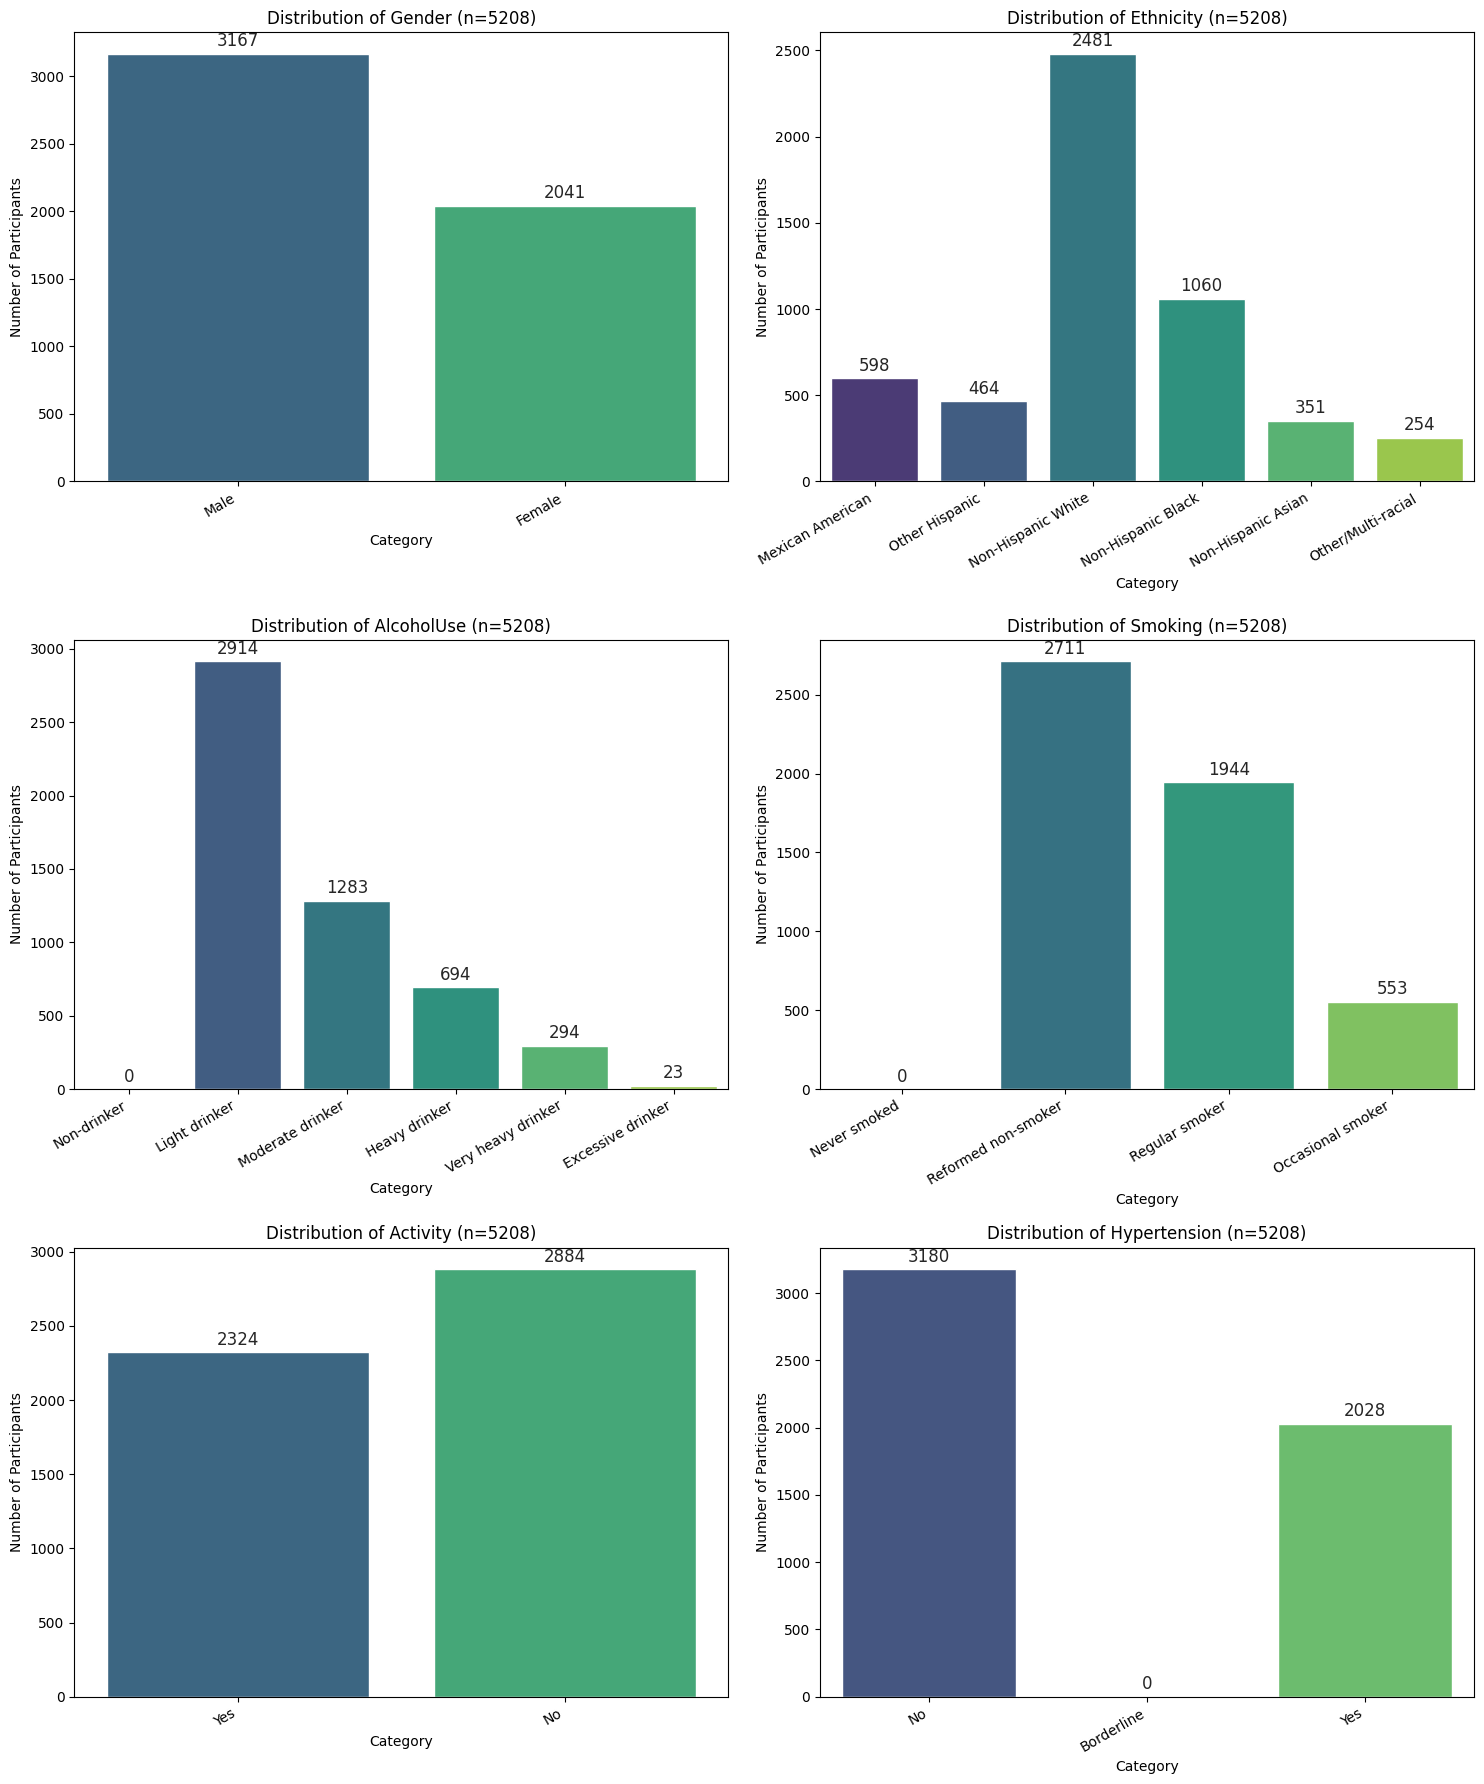

In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define logical orders (Keep as is)
smoking_order = ["Never smoked", "Reformed non-smoker", "Regular smoker", "Occasional smoker"]
hypertension_order = ["No", "Borderline", "Yes"]
alcohol_order = ["Non-drinker", "Light drinker", "Moderate drinker", "Heavy drinker", "Very heavy drinker", "Excessive drinker"]
ethnicity_order = ["Mexican American", "Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black", "Non-Hispanic Asian", "Other/Multi-racial"]
activity_order = ["Yes", "No"]
gender_order = ["Male", "Female"]

# 2. Cast columns (Keep as is)
df_final["Smoking"] = pd.Categorical(df_final["Smoking"], categories=smoking_order)
df_final["Hypertension"] = pd.Categorical(df_final["Hypertension"], categories=hypertension_order)
df_final["AlcoholUse"] = pd.Categorical(df_final["AlcoholUse"], categories=alcohol_order)
df_final["Ethnicity"] = pd.Categorical(df_final["Ethnicity"], categories=ethnicity_order)
df_final["Activity"] = pd.Categorical(df_final["Activity"], categories=activity_order)
df_final["Gender"] = pd.Categorical(df_final["Gender"], categories=gender_order)

cat_vars = ["Gender", "Ethnicity", "AlcoholUse", "Smoking", "Activity", "Hypertension"]

# MINIMAL EDIT: Create a grid figure (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten() # Makes indexing easier

sns.set_theme(style="whitegrid")

for i, var in enumerate(cat_vars):
    # 3. Calculate counts and percentages (Keep as is)
    counts = df_final[var].value_counts().sort_index()
    percentages = (df_final[var].value_counts(normalize=True).sort_index() * 100).round(2)

    freq_table = pd.DataFrame({'Category': counts.index, 'Count': counts.values, 'Percentage (%)': percentages.values})

    print(f"\n--- Frequency Table for {var} ---")
    print(freq_table.to_string(index=False))

    # 4. Create Bar Chart on the specific grid axis
    ax = sns.barplot(x=freq_table['Category'], y=freq_table['Count'], hue=freq_table['Category'],
                     palette="viridis", legend=False, ax=axes[i])

    # Annotate labels (Keep as is)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    ax.set_title(f'Distribution of {var} (n={len(df_final)})')
    ax.set_ylabel('Number of Participants')

    # Minimal Edit: Always rotate for space if 2 variables per row
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

## **Distribution of Categorical Variables**

- **Gender**
  - The cohort was predominantly male (60.8%), with females comprising 39.2%
- **Ethnicity**
  - The sample was ethnically diverse
  - Non-Hispanic Whites formed the largest group (47.6%), followed by Non-Hispanic Blacks (20.4%)
  - Hispanic subgroups collectively accounted for ~20%, with smaller but viable proportions of Non-Hispanic Asians and Other/Multi-racial participants
- **Alcohol Consumption**
  - Most participants were light (56.0%) or moderate drinkers (24.6%).
  - Higher-risk drinking categories comprised a smaller proportion of the cohort
  - No non-drinkers were identified under the applied categorisation
- **Smoking Status**
  - Over half were reformed non-smokers (52.1%), with regular (37.3%) and occasional smokers (10.6%) also represented
  - No never-smokers were identified
- **Physical Activity**
  - Physical activity status was relatively balanced (44.6% active, 55.4% inactive)
- **Hypertension**
  - Most participants were non-hypertensive (61.1%), while 38.9% reported hypertension
  - No borderline hypertension cases were observed

# **📈 Categorisation of Continuous Variables**

To enhance the interpretability of our findings, key continuous variables have been binned into discrete categories. This allows for a granular analysis of how liver enzyme abnormality correlates with specific clinical risk groups (such as Obesity Classes) and socioeconomic status.

While the Logistic Regression and XGBoost models will utilize the raw continuous values to maintain maximum statistical sensitivity, these categorical versions are used for descriptive summaries and identifying cohort trends.

Standardised Binning Logic:
- Age (RIDAGEYR): Grouped into 10-year intervals. A specific “80+” category is used to account for NHANES top-coding, ensuring this cluster is treated as a distinct group rather than a single age value.
- BMI (BMXBMI): Categorised according to World Health Organization (WHO) standards, including the three distinct classes of obesity (I, II, and III).
- Socioeconomic Status (PIR): The Poverty Income Ratio is grouped into four brackets based on Federal Poverty Level (FPL) multipliers.
- Metabolic Risk Markers: Clinical thresholds were applied to identify "High" risk categories for the following:
  - Waist Circumference (BMXWAIST): Threshold of ≥100 cm.
  - Triglycerides (LBDSTRSI): Threshold of ≥1.7 mmol/L.
  - Glycohemoglobin (LBXGH): Threshold of ≥5.7% (representing the pre-diabetic and diabetic range).

✅ All continuous variables binned and standardised.

--- Frequency Table for AgeCategory ---
Category  Count  Percentage (%)
   20–29    775           14.88
   30–39    938           18.01
   40–49    865           16.61
   50–59    958           18.39
   60–69    977           18.76
   70–79    480            9.22
     80+    215            4.13

--- Frequency Table for BMICategory ---
   Category  Count  Percentage (%)
Underweight     79            1.52
     Normal   1339           25.71
 Overweight   1719           33.01
    Obese I   1152           22.12
   Obese II    513            9.85
  Obese III    406            7.80

--- Frequency Table for PIRCategory ---
                Category  Count  Percentage (%)
    Below poverty (<1.0)   1162           22.31
   Low income (1.0–1.99)   1465           28.13
Middle income (2.0–3.99)   1365           26.21
      High income (≥4.0)   1216           23.35

--- Frequency Table for WaistCategory ---
        Category  Count  Percentage (%)
N

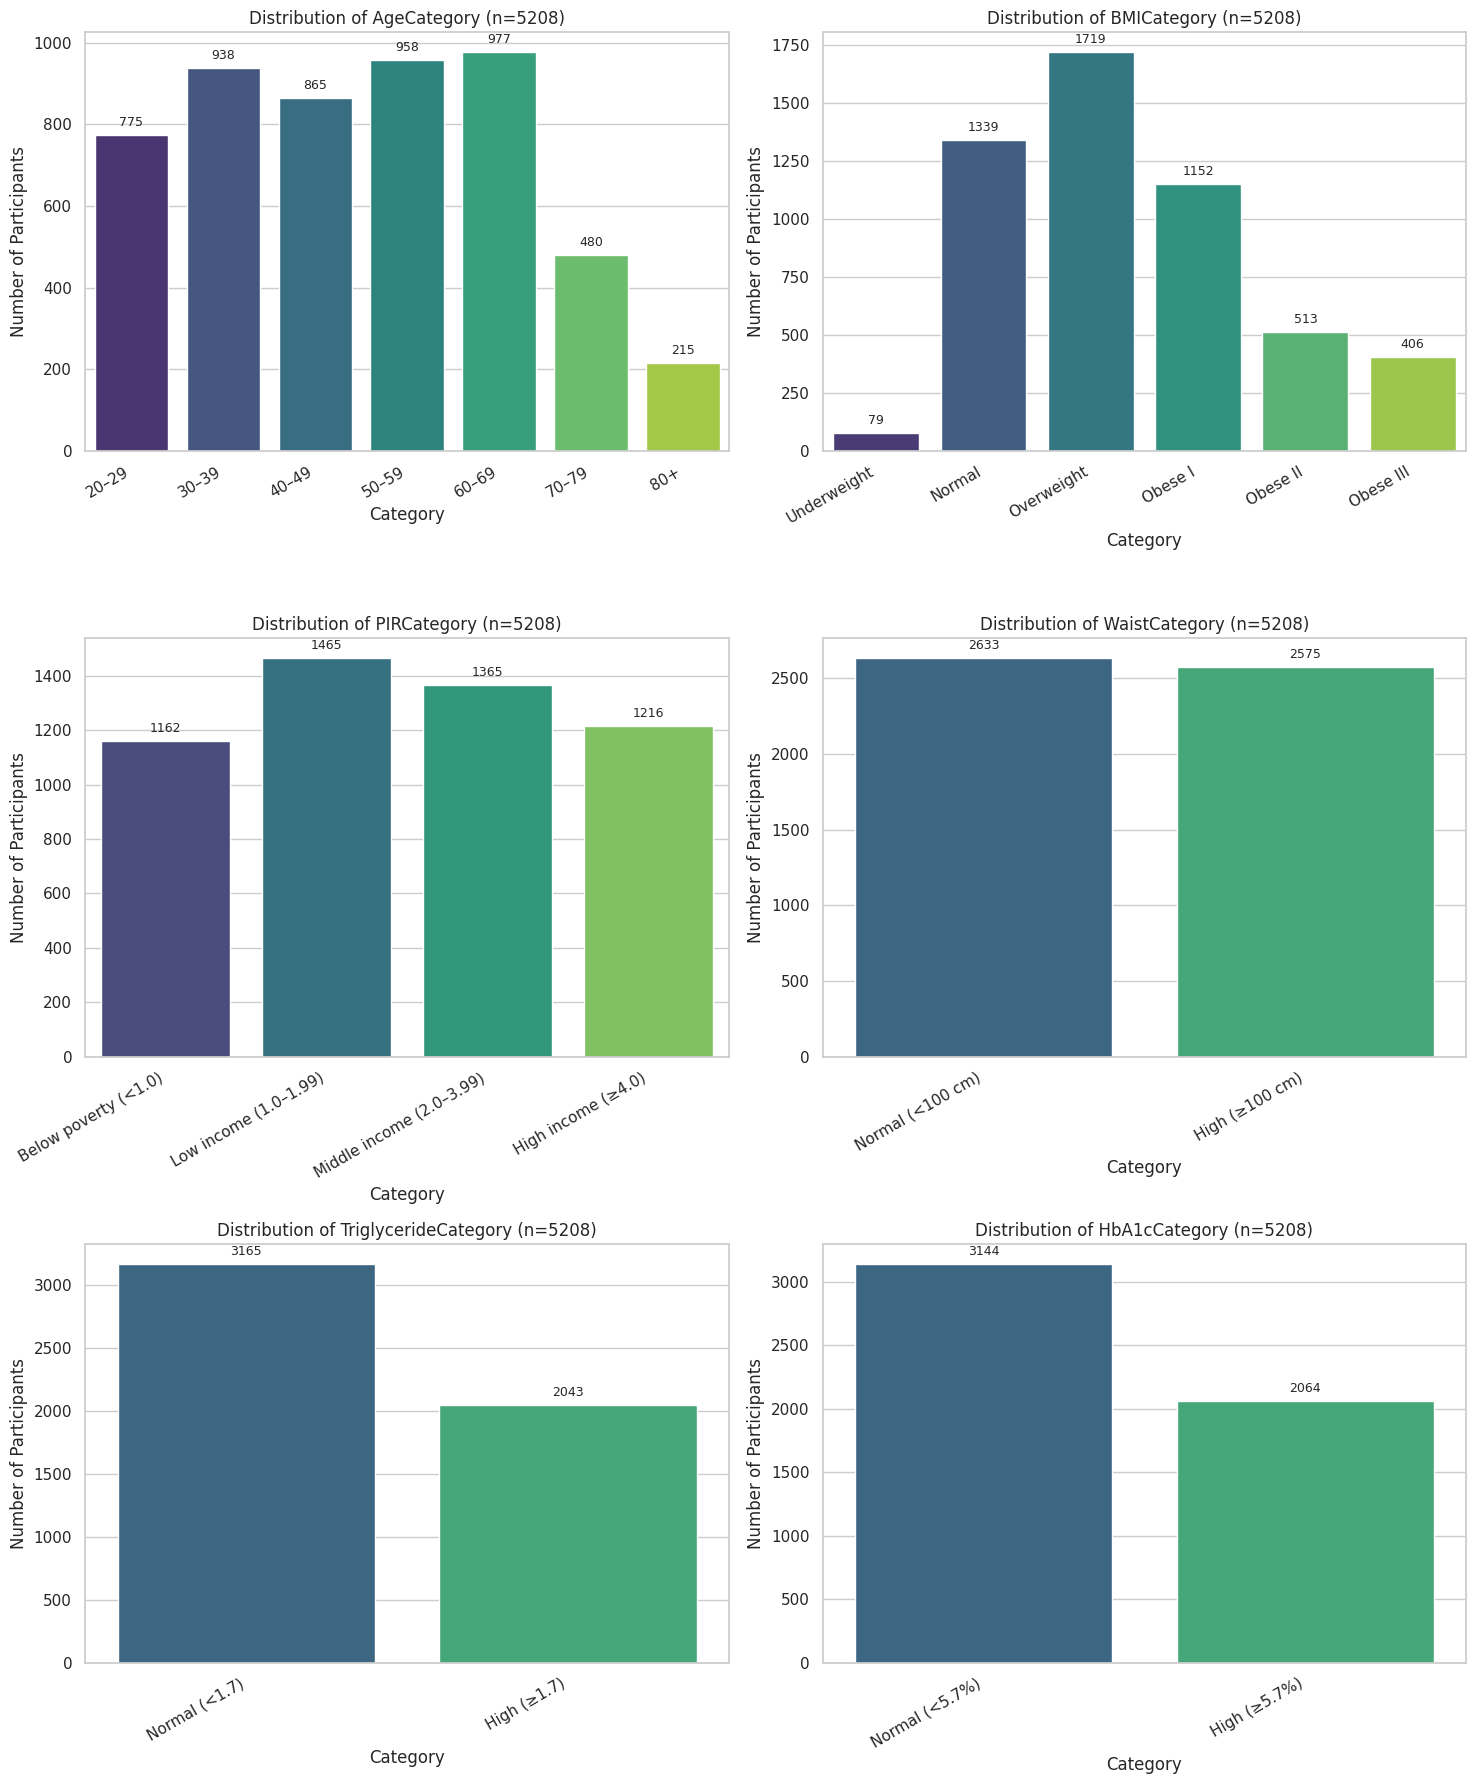

In [ ]:
# @title
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PART 1: BINNING & CATEGORIZATION (Keep as is) ---
age_bins = [20, 30, 40, 50, 60, 70, 80, float("inf")]
age_labels = ["20–29", "30–39", "40–49", "50–59", "60–69", "70–79", "80+"]
df_final['AgeCategory'] = pd.cut(df_final['RIDAGEYR'], bins=age_bins, labels=age_labels, right=False)

bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese I", "Obese II", "Obese III"]
df_final['BMICategory'] = pd.cut(df_final['BMXBMI'], bins=bmi_bins, labels=bmi_labels, right=False)

pir_bins = [-np.inf, 1.0, 2.0, 4.0, np.inf]
pir_labels = ["Below poverty (<1.0)", "Low income (1.0–1.99)", "Middle income (2.0–3.99)", "High income (≥4.0)"]
df_final['PIRCategory'] = pd.cut(df_final['INDFMPIR'], bins=pir_bins, labels=pir_labels, right=False)

waist_bins = [-np.inf, 100, np.inf]
waist_labels = ["Normal (<100 cm)", "High (≥100 cm)"]
df_final['WaistCategory'] = pd.cut(df_final['BMXWAIST'], bins=waist_bins, labels=waist_labels, right=False)

tri_bins = [-np.inf, 1.7, np.inf]
tri_labels = ["Normal (<1.7)", "High (≥1.7)"]
df_final['TriglycerideCategory'] = pd.cut(df_final['LBDSTRSI'], bins=tri_bins, labels=tri_labels, right=False)

hba1c_bins = [-np.inf, 5.7, np.inf]
hba1c_labels = ["Normal (<5.7%)", "High (≥5.7%)"]
df_final['HbA1cCategory'] = pd.cut(df_final['LBXGH'], bins=hba1c_bins, labels=hba1c_labels, right=False)

print("✅ All continuous variables binned and standardised.")

# --- PART 2: VISUALIZATION (GRID EDIT) ---
target_vars = ["AgeCategory", "BMICategory", "PIRCategory", "WaistCategory", "TriglycerideCategory", "HbA1cCategory"]

# Create 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

sns.set_theme(style="whitegrid")

for i, var in enumerate(target_vars):
    # Calculate counts and percentages
    counts = df_final[var].value_counts().sort_index()
    percentages = (df_final[var].value_counts(normalize=True).sort_index() * 100).round(2)

    freq_table = pd.DataFrame({'Category': counts.index, 'Count': counts.values, 'Percentage (%)': percentages.values})

    print(f"\n--- Frequency Table for {var} ---")
    print(freq_table.to_string(index=False))

    # Create the Bar Chart on the grid axis
    ax = sns.barplot(x=freq_table['Category'], y=freq_table['Count'], hue=freq_table['Category'],
                     palette="viridis", legend=False, ax=axes[i])

    # Add absolute count labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=9)

    ax.set_title(f'Distribution of {var} (n={len(df_final)})')
    ax.set_ylabel('Number of Participants')

    # Rotate labels to ensure clarity in grid view
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

## **Distribution of Continuous Variables**

- **Age**
  - Distributed across all age groups, with the largest proportions between 30–69 years
  - A distinct “80+” category was retained to account for NHANES top-coding
- **Body Mass Index (BMI)**
  - The majority of participants were overweight (33.0%) or obese (Classes I–III: ~40%)
  - Normal-weight individuals comprised 25.7%, with underweight participants forming a small minorit
- **Socioeconomic Status (PIR)**
  - Participants were evenly distributed across income categories
  - Approximately half fell below 2.0 FPL, indicating substantial socioeconomic variability
- **Waist Circumference**
  - The cohort was evenly split between normal (<100 cm) and high (≥100 cm) waist circumference
  - This supports its role as a metabolic risk indicator
- **Triglycerides**
  - Most participants had normal levels (<1.7 mmol/L), while 39.2% fell into the high-risk category
- **Glycohemoglobin (HbA1c)**
  - Around 40% of participants had elevated HbA1c (≥5.7%), indicating prediabetic or diabetic risk

# **⚠️ Outcome Variables — Clinical Status of Liver Enzymes**

In this section, we analyze the distribution of participants based on clinical thresholds for liver health. By categorizing the raw continuous enzyme values into "Normal" and "Abnormal" groups, we can visualize the prevalence of potential liver dysfunction within our cohort (n=5,013).

These classifications are based on gender-specific and universal reference ranges:
- ALT (LBXSATSI): ≥33 U/L (Males), ≥25 U/L (Females)
- AST (LBXSASSI): ≥40 U/L (Universal)
- GGT (LBXSGTSI): ≥51 U/L (Males), ≥33 U/L (Females)
- ALP (LBXSAPSI): Outside the range of 30−147 U/L


--- Clinical Status Table for ALT (LBXSATSI) ---
  Status  Count  Percentage (%)
  Normal   3972           76.27
Abnormal   1236           23.73

--- Clinical Status Table for AST (LBXSASSI) ---
  Status  Count  Percentage (%)
  Normal   4815           92.45
Abnormal    393            7.55

--- Clinical Status Table for GGT (LBXSGTSI) ---
  Status  Count  Percentage (%)
  Normal   4312            82.8
Abnormal    896            17.2

--- Clinical Status Table for ALP (LBXSAPSI) ---
  Status  Count  Percentage (%)
  Normal   5140           98.69
Abnormal     68            1.31


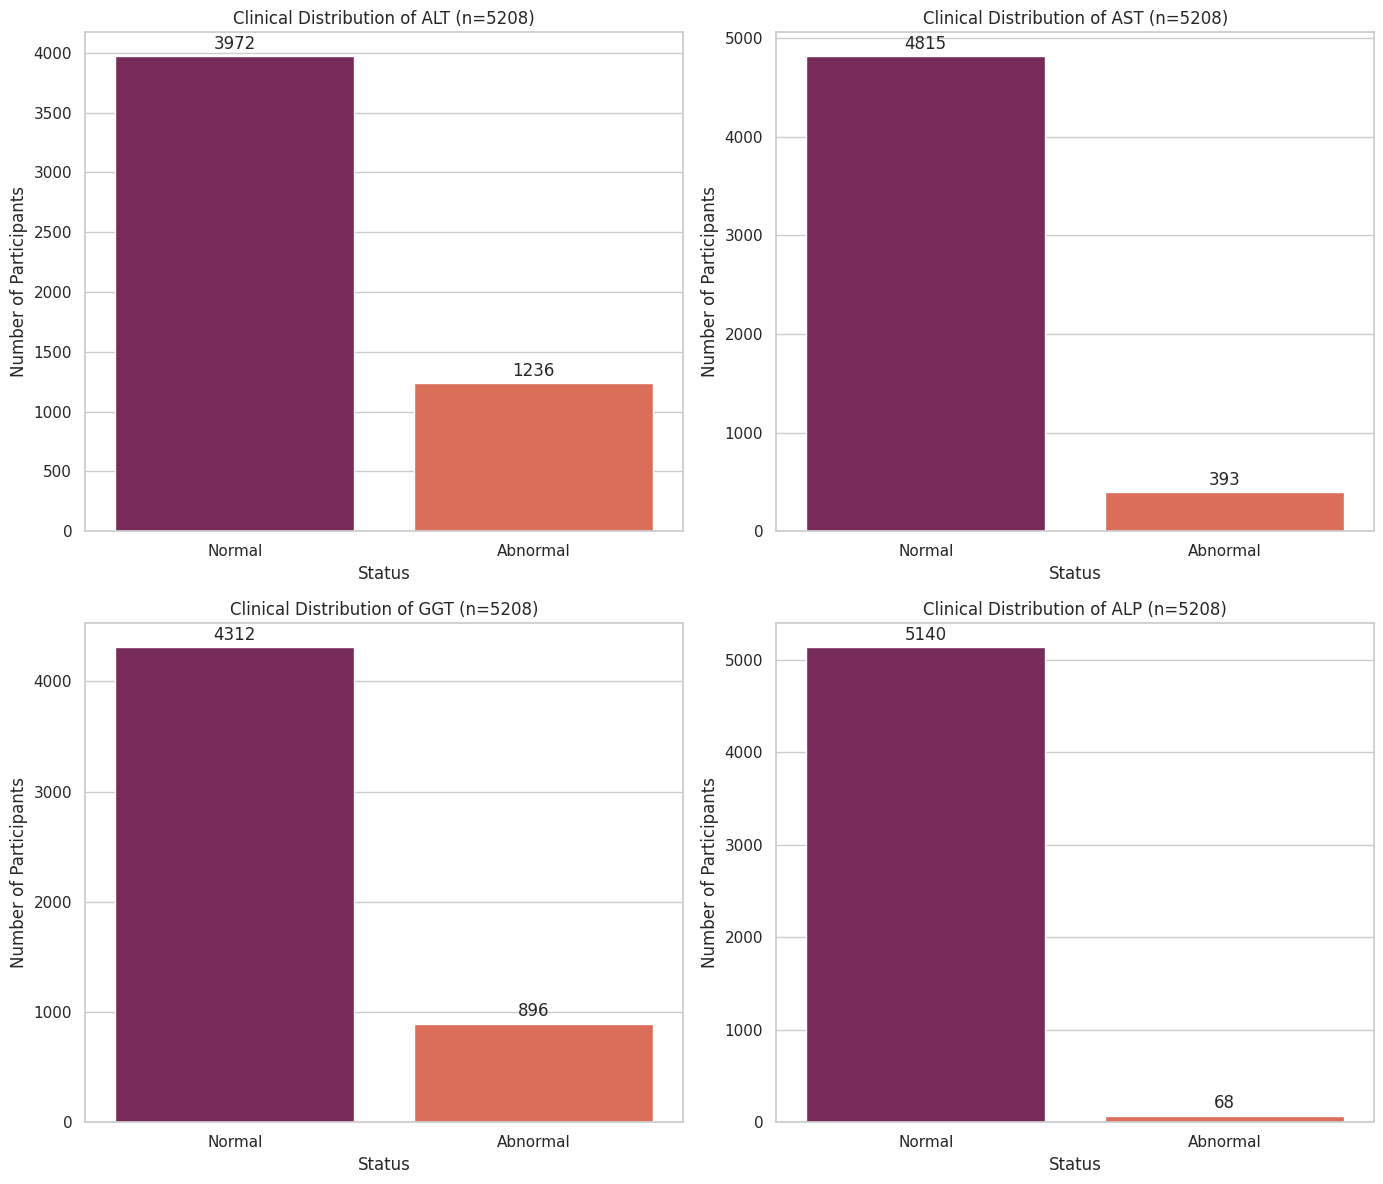

In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to temporarily categorize (Keep as is)
def check_status(row, enzyme):
    gender = row['Gender']
    val = row[enzyme]
    if enzyme == 'LBXSATSI': # ALT
        threshold = 33 if gender == 'Male' else 25
        return "Abnormal" if val >= threshold else "Normal"
    elif enzyme == 'LBXSASSI': # AST
        return "Abnormal" if val >= 40 else "Normal"
    elif enzyme == 'LBXSGTSI': # GGT
        threshold = 51 if gender == 'Male' else 33
        return "Abnormal" if val >= threshold else "Normal"
    elif enzyme == 'LBXSAPSI': # ALP
        return "Abnormal" if (val < 30 or val > 147) else "Normal"

enzymes = ['LBXSATSI', 'LBXSASSI', 'LBXSGTSI', 'LBXSAPSI']
enzyme_names = ['ALT', 'AST', 'GGT', 'ALP']

# GRID EDIT: Create 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

sns.set_theme(style="whitegrid")

for i, (code, name) in enumerate(zip(enzymes, enzyme_names)):
    # Create temporary series
    temp_status = df_final.apply(lambda row: check_status(row, code), axis=1)

    counts = temp_status.value_counts().sort_index(ascending=False)
    percentages = (temp_status.value_counts(normalize=True).sort_index(ascending=False) * 100).round(2)

    freq_table = pd.DataFrame({
        'Status': counts.index,
        'Count': counts.values,
        'Percentage (%)': percentages.values
    })

    print(f"\n--- Clinical Status Table for {name} ({code}) ---")
    print(freq_table.to_string(index=False))

    # Plot on the grid axis
    ax = sns.barplot(x=freq_table['Status'], y=freq_table['Count'],
                     palette="rocket", hue=freq_table['Status'],
                     legend=False, ax=axes[i])

    # Add labels on top
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    ax.set_title(f'Clinical Distribution of {name} (n={len(df_final)})')
    ax.set_ylabel('Number of Participants')

plt.tight_layout()
plt.show()

## **Clinical Distribution of Liver Enzymes**

- **Alanine Aminotransferase (ALT)**
  - 23.7% of participants exhibited abnormal ALT levels
  - This suggests a relatively high prevalence of subclinical hepatocellular stress within the cohort
- **Aspartate Aminotransferase (AST)**
  - Abnormal AST levels were observed in 7.6% of participants
  - The lower prevalence reflects AST’s reduced sensitivity for early or mild liver injury
- **Gamma-Glutamyl Transferase (GGT)**
  - 17.2% of participants had abnormal GGT levels
  - Elevated GGT is commonly associated with metabolic risk and alcohol exposure
- **Alkaline Phosphatase (ALP)**
  - Abnormal ALP levels were rare (1.3%)
  This indicates limited biliary or cholestatic abnormality in the general population sample

## **📊 Comparative Analysis of Liver Biomarker Means**

In this section, we examine how the mean levels of the 4 liver enzymes — ALT, AST, GGT and ALP — vary across different demographic, lifestyle and clinical categories. By visualizing these means together, we can identify which subgroups exhibit higher biological indicators of liver stress.


--- Mean Biomarkers for Gender ---
          ALT    AST    GGT    ALP
Gender                            
Male    29.24  27.51  39.05  70.32
Female  21.51  23.66  28.07  71.07
------------------------------

--- Mean Biomarkers for Ethnicity ---
                      ALT    AST    GGT    ALP
Ethnicity                                     
Mexican American    32.66  28.27  38.49  77.01
Other Hispanic      27.79  26.41  34.90  72.90
Non-Hispanic White  25.43  25.50  31.63  68.70
Non-Hispanic Black  23.13  25.61  39.75  72.84
Non-Hispanic Asian  28.68  26.84  35.38  63.90
Other/Multi-racial  25.09  25.18  34.27  70.21
------------------------------

--- Mean Biomarkers for AlcoholUse ---
                      ALT    AST    GGT    ALP
AlcoholUse                                    
Non-drinker           NaN    NaN    NaN    NaN
Light drinker       23.55  24.26  29.02  70.41
Moderate drinker    28.14  27.36  39.92  70.25
Heavy drinker       30.97  29.10  42.97  70.27
Very heavy drinker  32.71

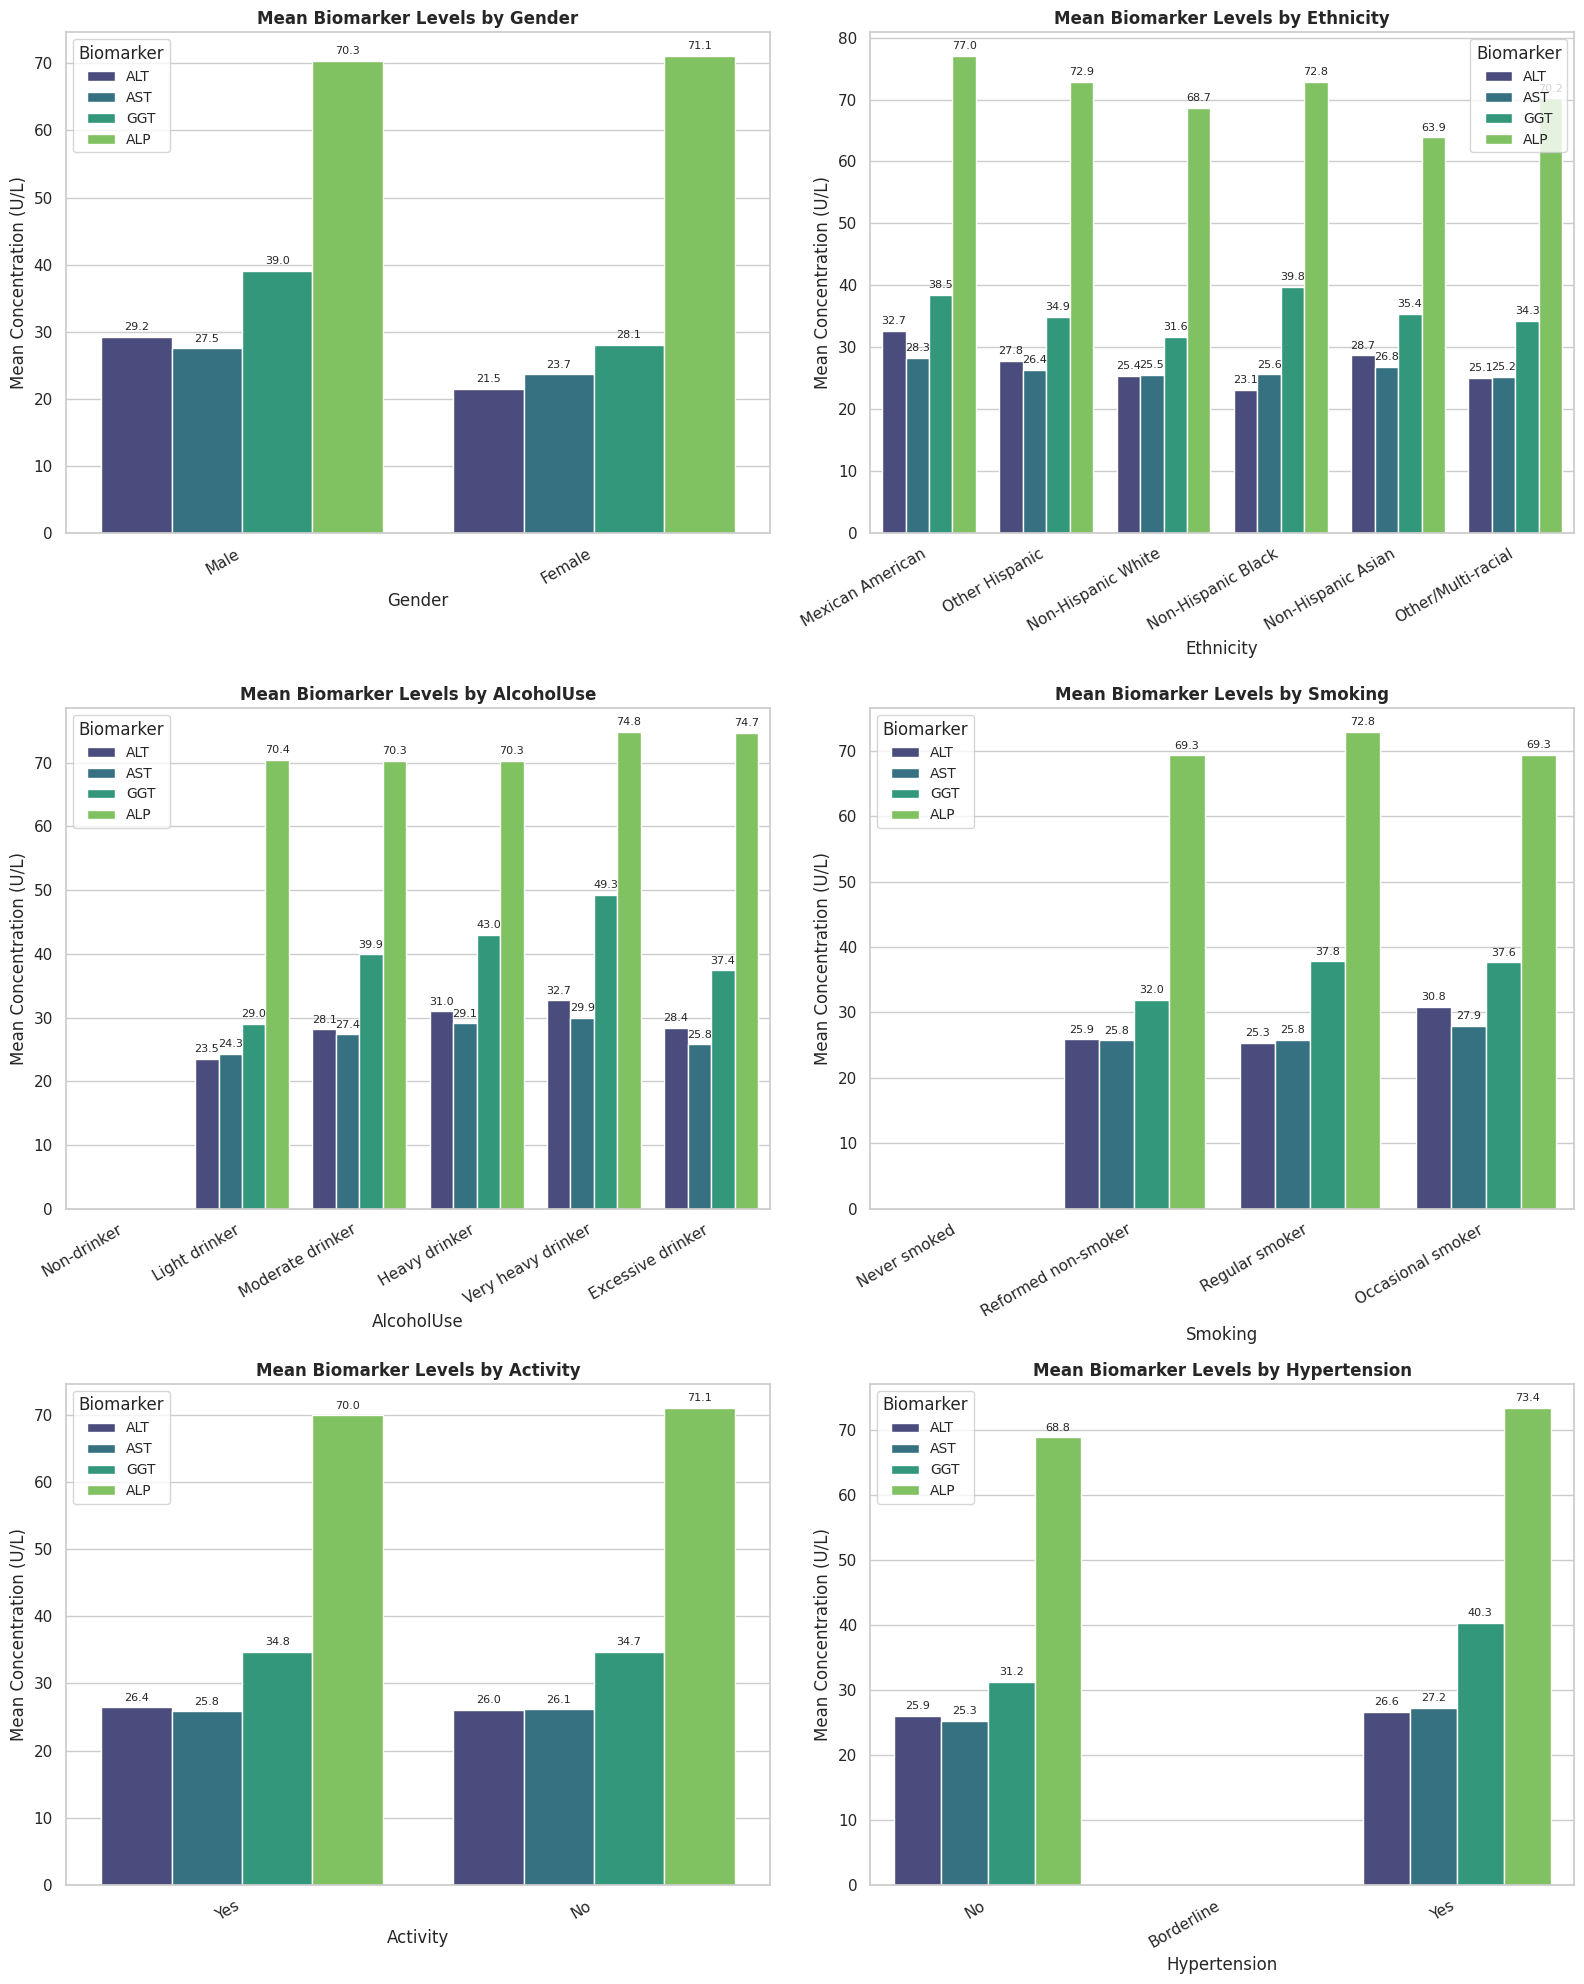

In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

biomarkers = {'LBXSATSI': 'ALT', 'LBXSASSI': 'AST', 'LBXSGTSI': 'GGT', 'LBXSAPSI': 'ALP'}
predictors = [
    "Gender", "Ethnicity", "AlcoholUse", "Smoking", "Activity", "Hypertension",
    "AgeCategory", "BMICategory", "PIRCategory", "WaistCategory", "TriglycerideCategory", "HbA1cCategory"
]

# --- PART 1: PRINT ALL TABLES FIRST ---
for pred in predictors:
    mean_data = df_final.groupby(pred, observed=False)[list(biomarkers.keys())].mean()
    mean_data.columns = [biomarkers[col] for col in mean_data.columns]
    print(f"\n--- Mean Biomarkers for {pred} ---")
    print(mean_data.round(2))
    print("-" * 30)

# --- PART 2: RENDER ALL GRAPHS ---
batches = [predictors[:6], predictors[6:]]
sns.set_theme(style="whitegrid")

for batch_idx, batch in enumerate(batches):
    fig, axes = plt.subplots(3, 2, figsize=(16, 20))
    axes = axes.flatten()

    for i, pred in enumerate(batch):
        # Calculate and reshape data
        mean_data = df_final.groupby(pred, observed=False)[list(biomarkers.keys())].mean()
        mean_data.columns = [biomarkers[col] for col in mean_data.columns]
        plot_data = mean_data.reset_index().melt(id_vars=pred, var_name='Biomarker', value_name='Mean Value')

        # Plot on grid
        ax = sns.barplot(data=plot_data, x=pred, y='Mean Value', hue='Biomarker', palette="viridis", ax=axes[i])

        # Add labels on top of bars
        for p in ax.patches:
            if p.get_height() > 0:
                ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=8)

        ax.set_title(f'Mean Biomarker Levels by {pred}', fontsize=12, fontweight='bold')
        ax.set_ylabel('Mean Concentration (U/L)')
        ax.legend(title='Biomarker', fontsize='small')

        # Consistent label rotation
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    plt.tight_layout()
    plt.show()

### **Interpretation of Mean Liver Biomarker Patterns Across Predictors**

- **Gender**
  - Males exhibited higher mean ALT, AST, and GGT than females
  - Although mean ALT and GGT values for males remained below abnormal thresholds on average, these higher means are consistent with the greater prevalence of abnormal enzyme status observed in males
- **Ethnicity**
  - Mean enzyme levels varied across ethnic groups
  - Mexican Americans showed the highest mean ALT, approaching male-specific abnormal thresholds
  - Non-Hispanic Blacks exhibited relatively higher mean GGT, while Non-Hispanic Asians had lower mean ALP, remaining well within the normal range
- **Alcohol Consumption**
  - Mean ALT, AST, and GGT increased progressively from light to very heavy drinking categories
  - Mean GGT showed the steepest increase and approached abnormal thresholds in higher drinking categories, supporting its sensitivity to alcohol-related liver stress
  - No non-drinker means were available due to categorisation
- **Smoking Status**
  - Occasional smokers exhibited higher mean ALT and AST, while regular smokers had higher mean GGT
  - Although mean values largely remained below abnormal thresholds, these patterns suggest increased risk clustering within smoking-exposed groups
- **Physical Activity**
  - Mean liver enzyme levels were similar between active and inactive participants
  - Differences were small and remained well within normal reference ranges
- **Hypertension**
  - Participants with hypertension showed higher mean AST, GGT, and ALP
  - Mean GGT was notably elevated compared to non-hypertensive participants, though still below abnormal cut-offs on average
- **Age**
  - Mean ALT and GGT peaked in middle age (50–59 years) before declining in older age groups
  - ALP increased with age, consistent with age-related cholestatic and bone-related influences, while remaining largely within the normal range
- **Body Mass Index (BMI)**
  - Mean ALT and GGT increased from normal weight to obese categories
  ALP was highest in Obese Class III, though mean values did not exceed abnormal thresholds
- **Socioeconomic Status (PIR)**
  - Lower income groups exhibited higher mean GGT and ALP, with enzyme levels generally declining with increasing income
- **Waist Circumference**
  - Participants with high waist circumference (≥100 cm) had higher mean ALT, GGT, and ALP
  - Mean ALT and GGT in this group were closer to abnormal thresholds, highlighting central adiposity as a key metabolic risk indicator
- **Triglycerides**
  - Elevated triglycerides (≥1.7 mmol/L) were associated with substantially higher mean values across all four enzymes
  - Mean ALT and GGT in this group approached clinical abnormal thresholds, representing one of the strongest descriptive contrasts observed
- **HbA1c**
  - Participants with elevated HbA1c (≥5.7%) had higher mean ALT, GGT, and ALP
  - Differences in AST were minimal

## **📊 Comparative Analysis of Clinical Status across Predictors**

In this section, we examine the proportion of participants categorized as "Normal" or "Abnormal" for each biomarker across our primary categorical predictors. This visualization helps identify which lifestyle and demographic factors are most strongly associated with clinical enzyme elevation.

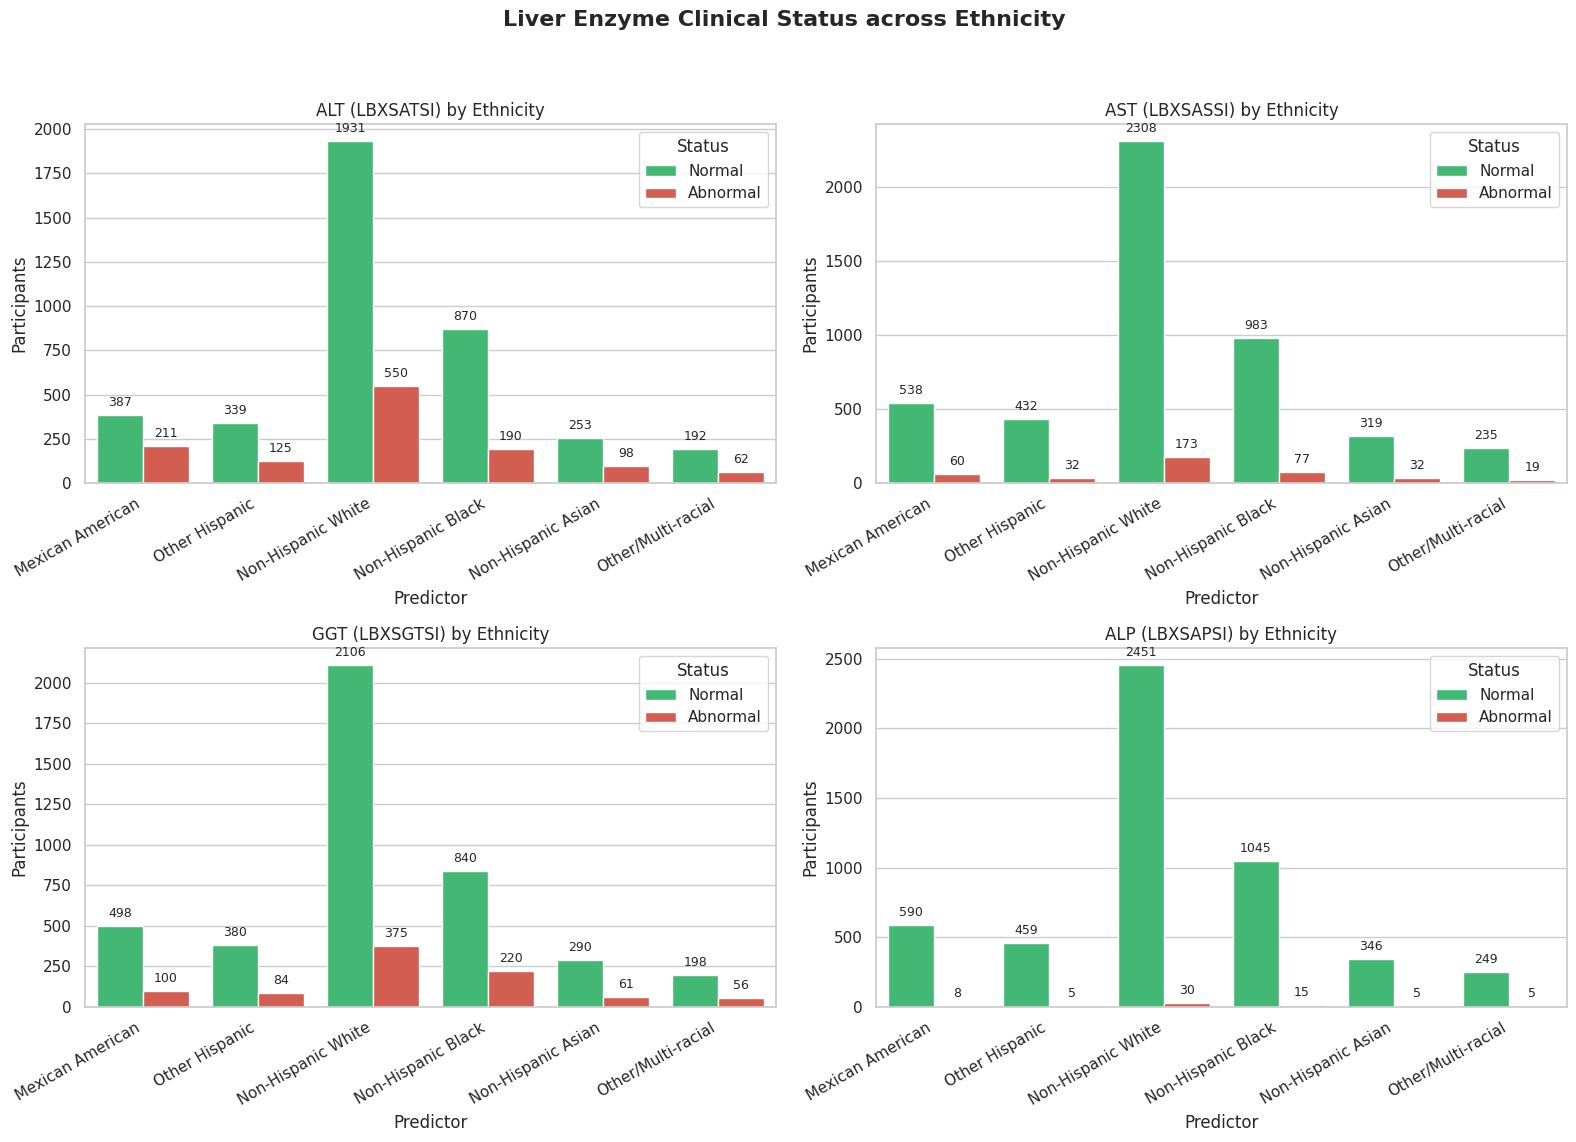

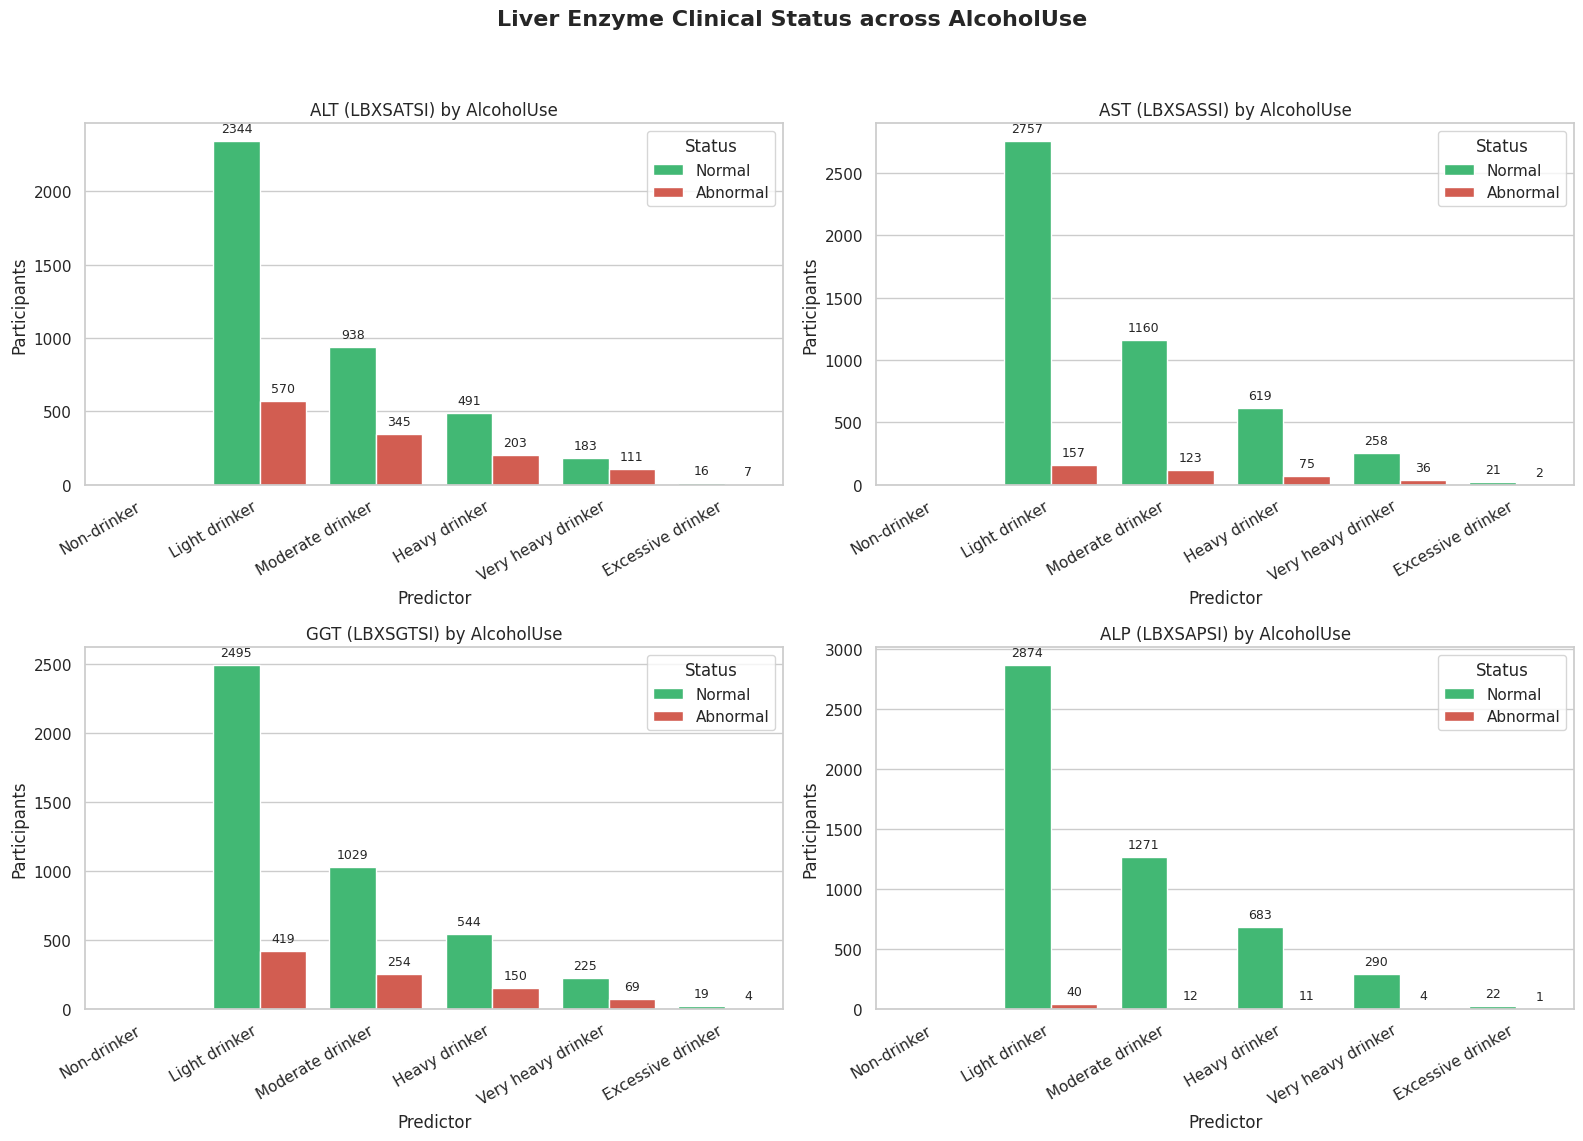

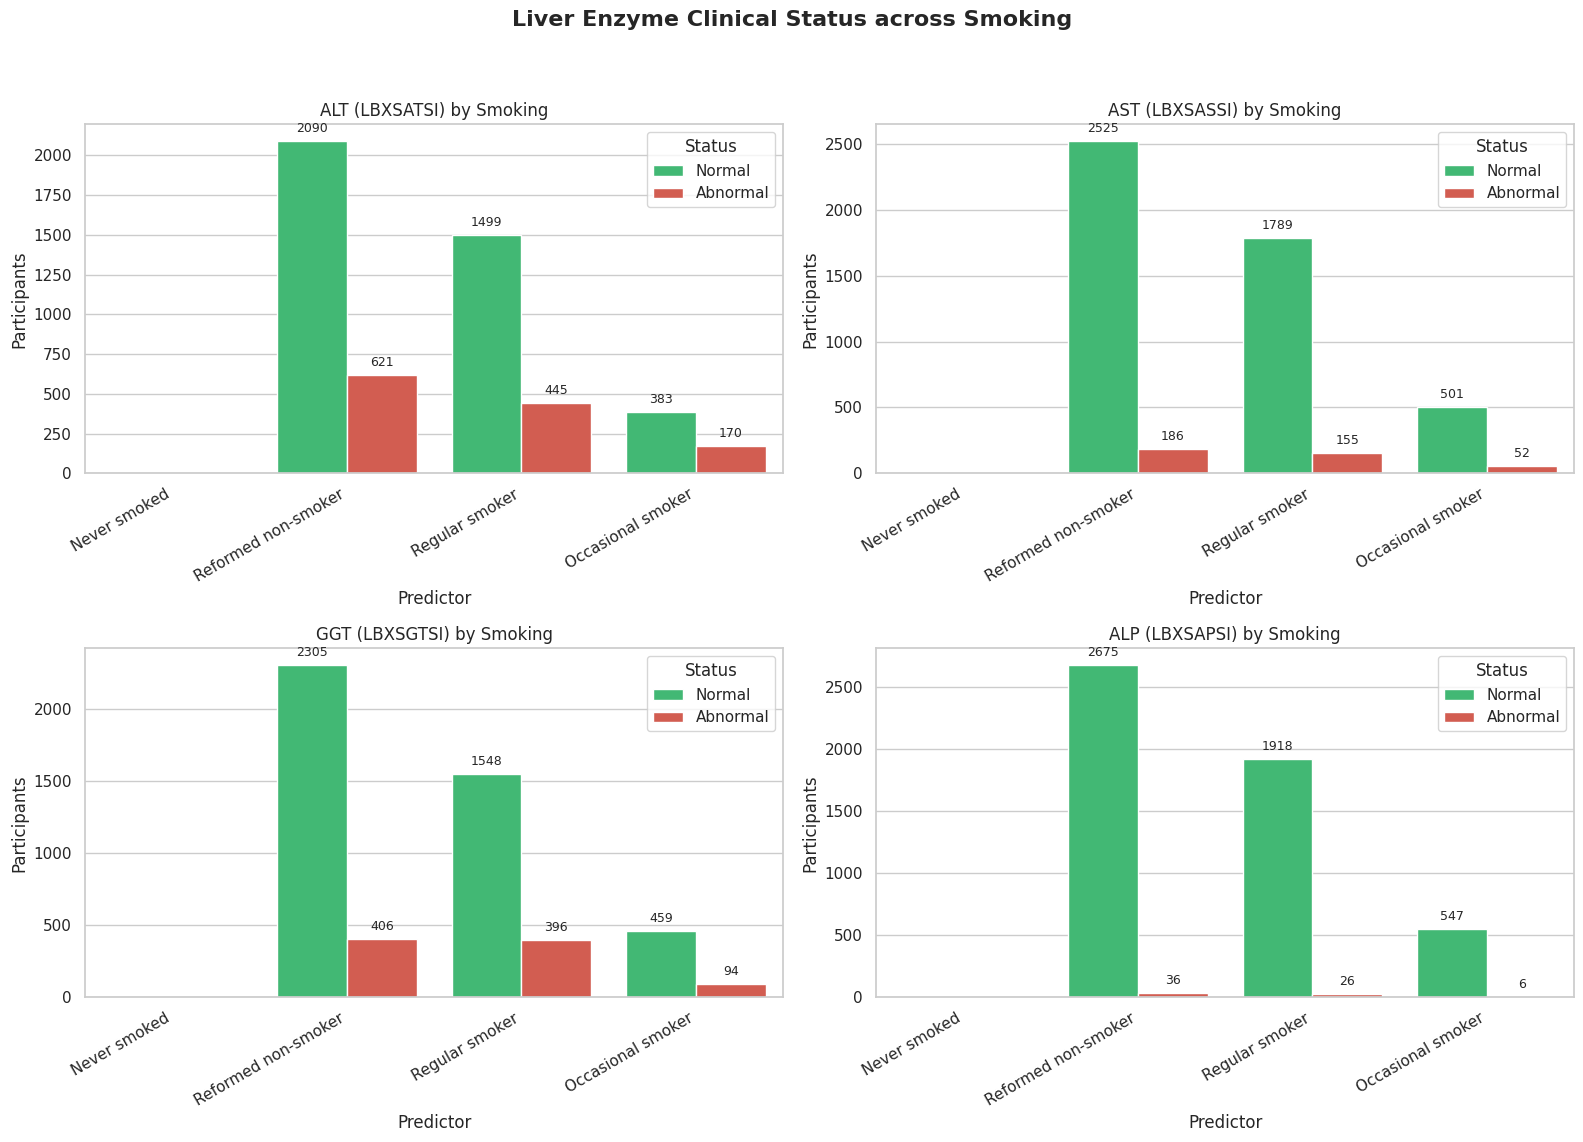

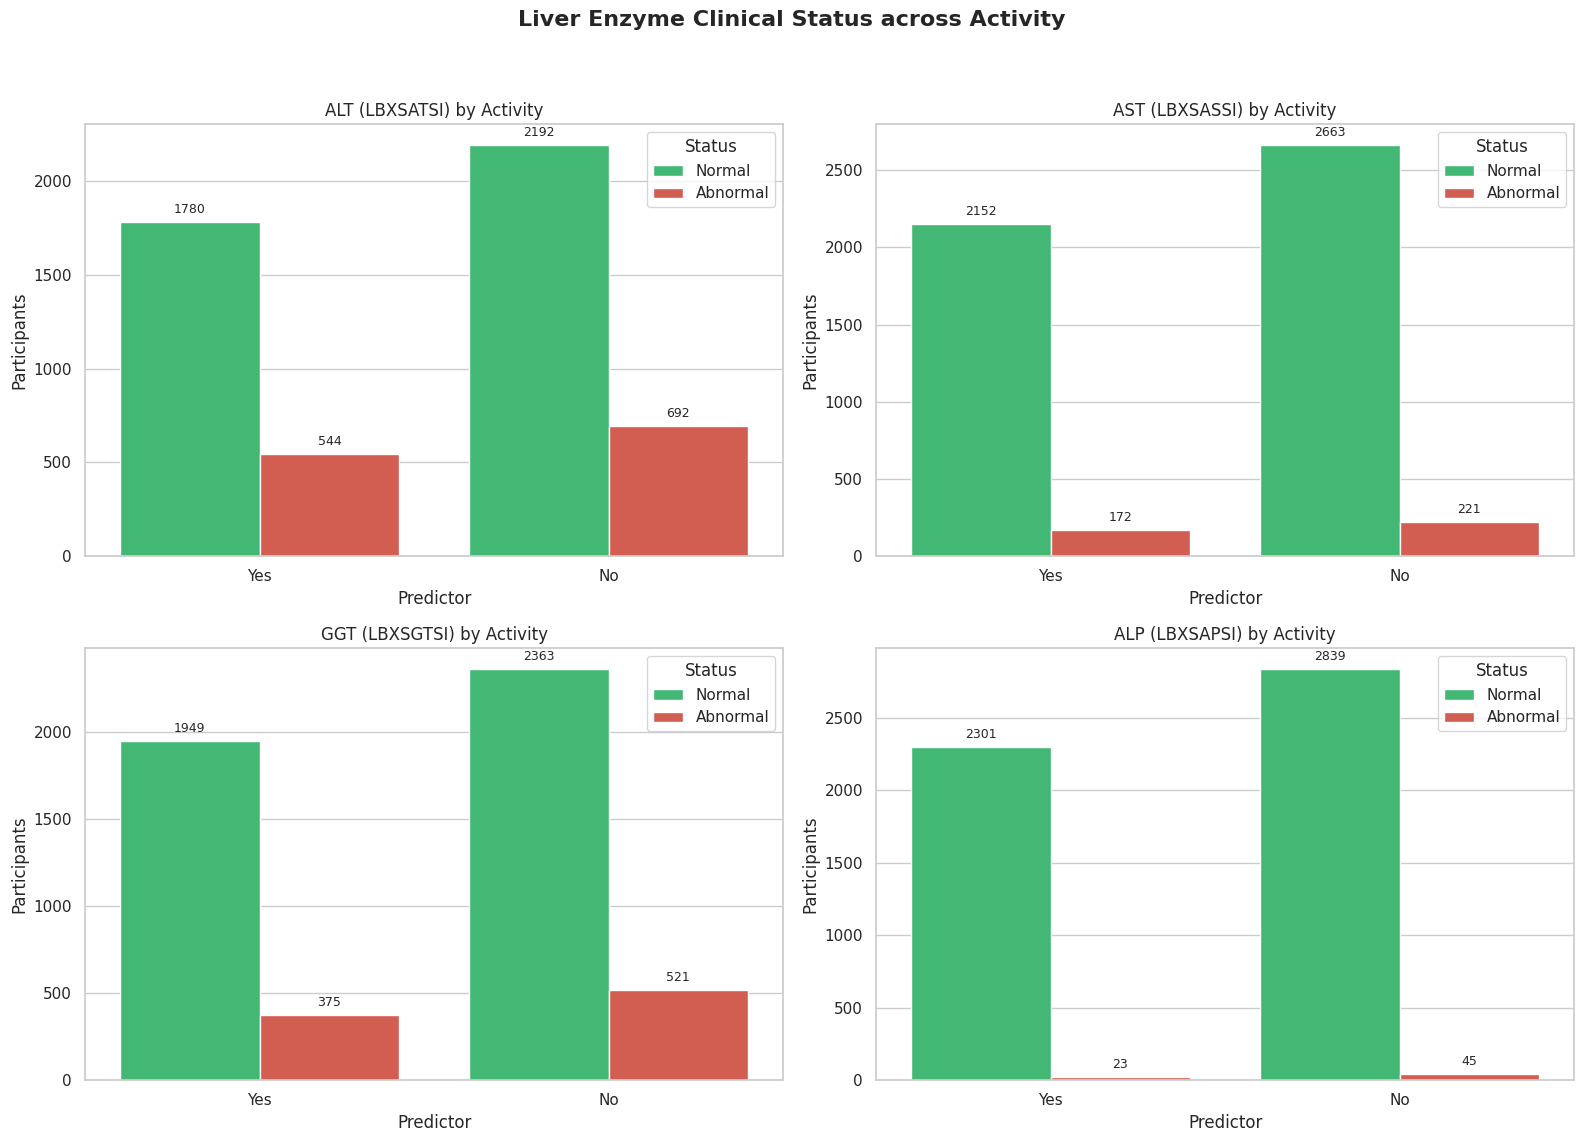

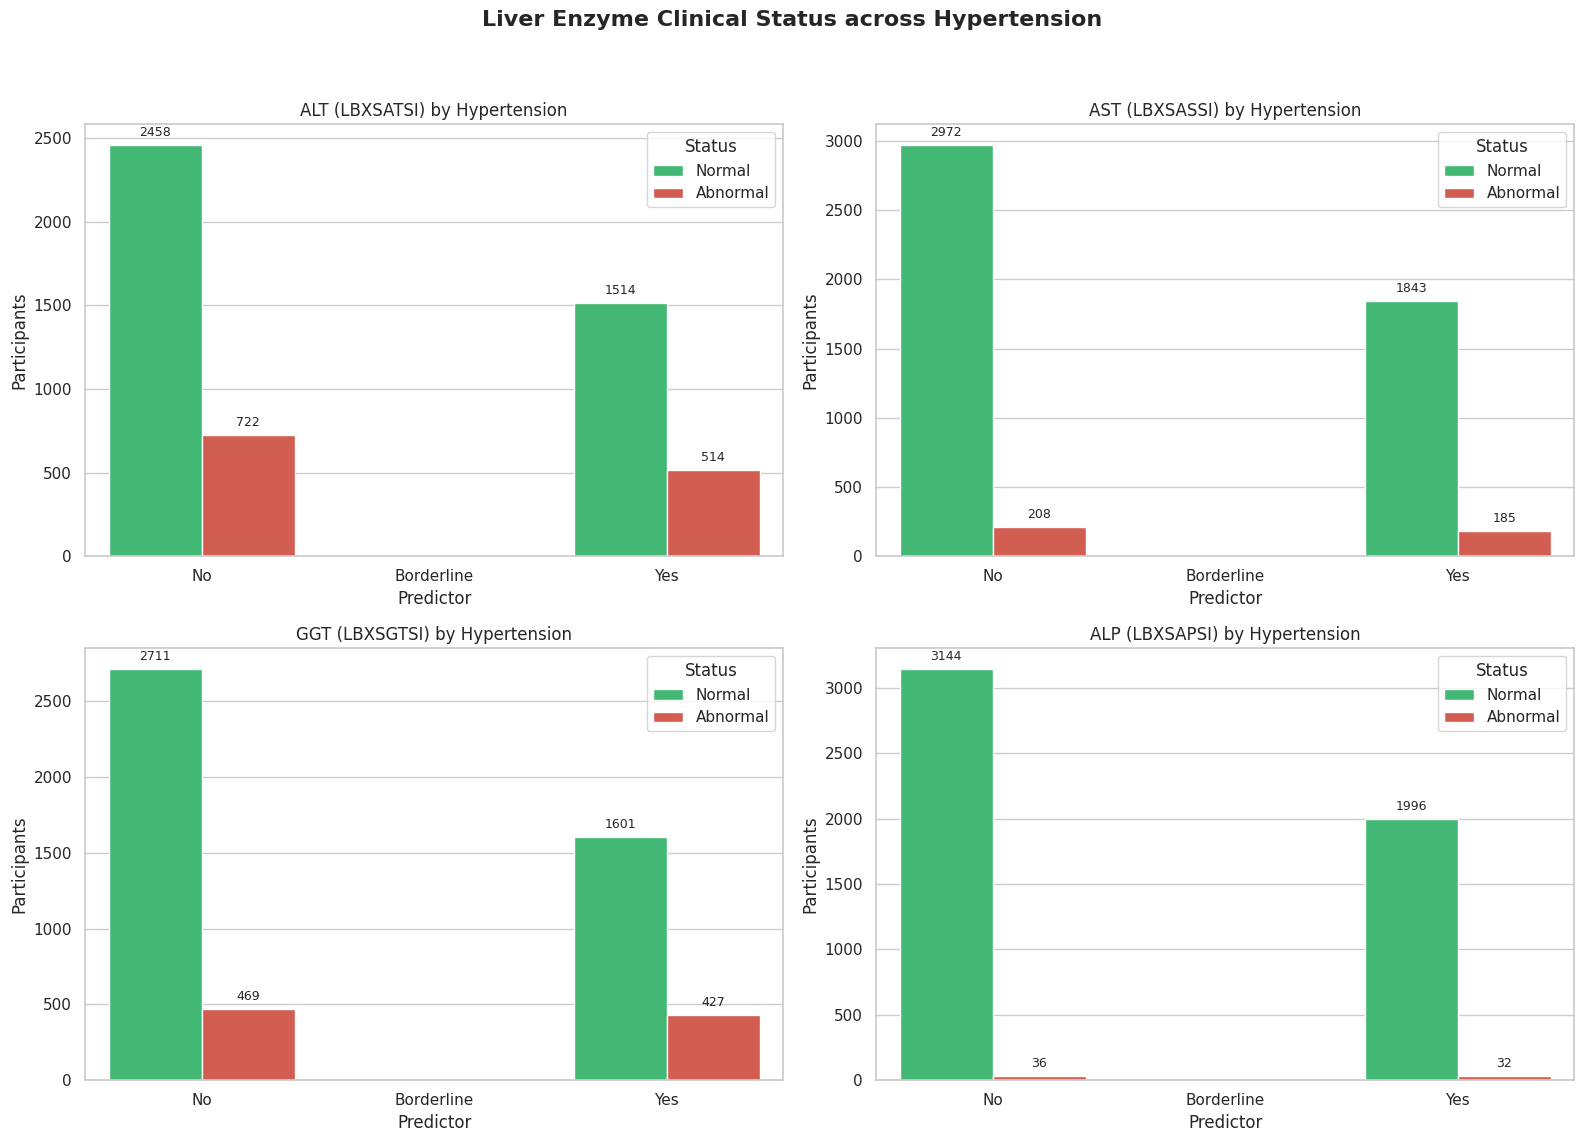

In [ ]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the biomarkers
enzymes = {'LBXSATSI': 'ALT', 'LBXSASSI': 'AST', 'LBXSGTSI': 'GGT', 'LBXSAPSI': 'ALP'}
cat_predictors = ["Gender", "Ethnicity", "AlcoholUse", "Smoking", "Activity", "Hypertension"]

sns.set_theme(style="whitegrid")

for pred in cat_predictors:
    # MINIMAL EDIT: Create a figure with 2 rows and 2 columns for the 4 enzymes per predictor
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for i, (code, name) in enumerate(enzymes.items()):
        if pred not in df_final.columns or code not in df_final.columns:
            continue

        # 3. Clinical Logic (Unchanged)
        if code == 'LBXSATSI':
            is_abnormal = ((df_final['Gender'] == 'Male') & (df_final[code] >= 33)) | \
                          ((df_final['Gender'] == 'Female') & (df_final[code] >= 25))
        elif code == 'LBXSASSI':
            is_abnormal = (df_final[code] >= 40)
        elif code == 'LBXSGTSI':
            is_abnormal = ((df_final['Gender'] == 'Male') & (df_final[code] >= 51)) | \
                          ((df_final['Gender'] == 'Female') & (df_final[code] >= 33))
        elif code == 'LBXSAPSI':
            is_abnormal = (df_final[code] < 30) | (df_final[code] > 147)

        # 4. Create plotting dataframe
        temp_df = pd.DataFrame({
            'Predictor': df_final[pred],
            'Status': np.where(is_abnormal, "Abnormal", "Normal")
        })

        # 5. Group Counts
        chart_data = temp_df.groupby(['Predictor', 'Status'], observed=False).size().reset_index(name='Count')

        # 6. Visualization on specific axis
        ax = sns.barplot(
            data=chart_data, x='Predictor', y='Count', hue='Status',
            palette={'Normal': '#2ecc71', 'Abnormal': '#e74c3c'},
            hue_order=['Normal', 'Abnormal'], ax=axes[i]
        )

        # Annotations
        for p in ax.patches:
            h = p.get_height()
            if h > 0:
                ax.annotate(f'{int(h)}', (p.get_x() + p.get_width() / 2., h),
                            ha='center', va='center', xytext=(0, 9),
                            textcoords='offset points', fontsize=9)

        ax.set_title(f'{name} ({code}) by {pred}')
        ax.set_ylabel('Participants')

        if pred in ["Ethnicity", "AlcoholUse", "Smoking"]:
            plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    plt.suptitle(f'Liver Enzyme Clinical Status across {pred}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### **Interpretation of Clinical Abnormality Patterns Across Predictors**

- **Gender**
  - Males consistently exhibited a higher number of abnormal cases for ALT, AST, and GGT compared to females
  - This aligns with the use of lower female-specific thresholds for ALT and GGT, yet males still showed greater abnormal prevalence
  - Abnormal ALP was rare in both sexes
- **Ethnicity**
  - Abnormal enzyme prevalence varied across ethnic groups
  - Mexican Americans and Non-Hispanic Whites showed higher counts of abnormal ALT and GGT
  - Non-Hispanic Blacks exhibited a relatively higher number of abnormal GGT cases
  - Abnormal ALP remained uncommon across all ethnicities
- **Alcohol Consumption**
  - A clear gradient was observed, with abnormal ALT, AST, and GGT increasing from light to very heavy drinking categories
  - GGT showed the strongest increase in abnormal prevalence with higher alcohol intake, consistent with its clinical sensitivity to alcohol exposure
  - Abnormal ALP remained infrequent across all drinking levels
- **Smoking Status**
  - Regular and reformed smokers exhibited higher counts of abnormal ALT and GGT compared to occasional smokers
  - Differences in AST were less pronounced, while abnormal ALP remained rare
- **Physical Activity**
  - Inactive participants showed higher counts of abnormal ALT, AST, and GGT compared to physically active individuals
  - Differences were modest but consistent across enzymes
- **Hypertension**
  - Participants with hypertension exhibited higher counts of abnormal ALT, AST, and GGT than non-hypertensive participants
  - Abnormal ALP remained uncommon regardless of hypertension status

## **🌡️ Proportion Analysis: Clinical Abnormality across Predictors**

This analysis uses heatmaps to visualize the percentage distribution of clinical abnormality. By normalizing the data by "index" (the predictor rows), we can see the prevalence of liver enzyme elevation within each specific subgroup.

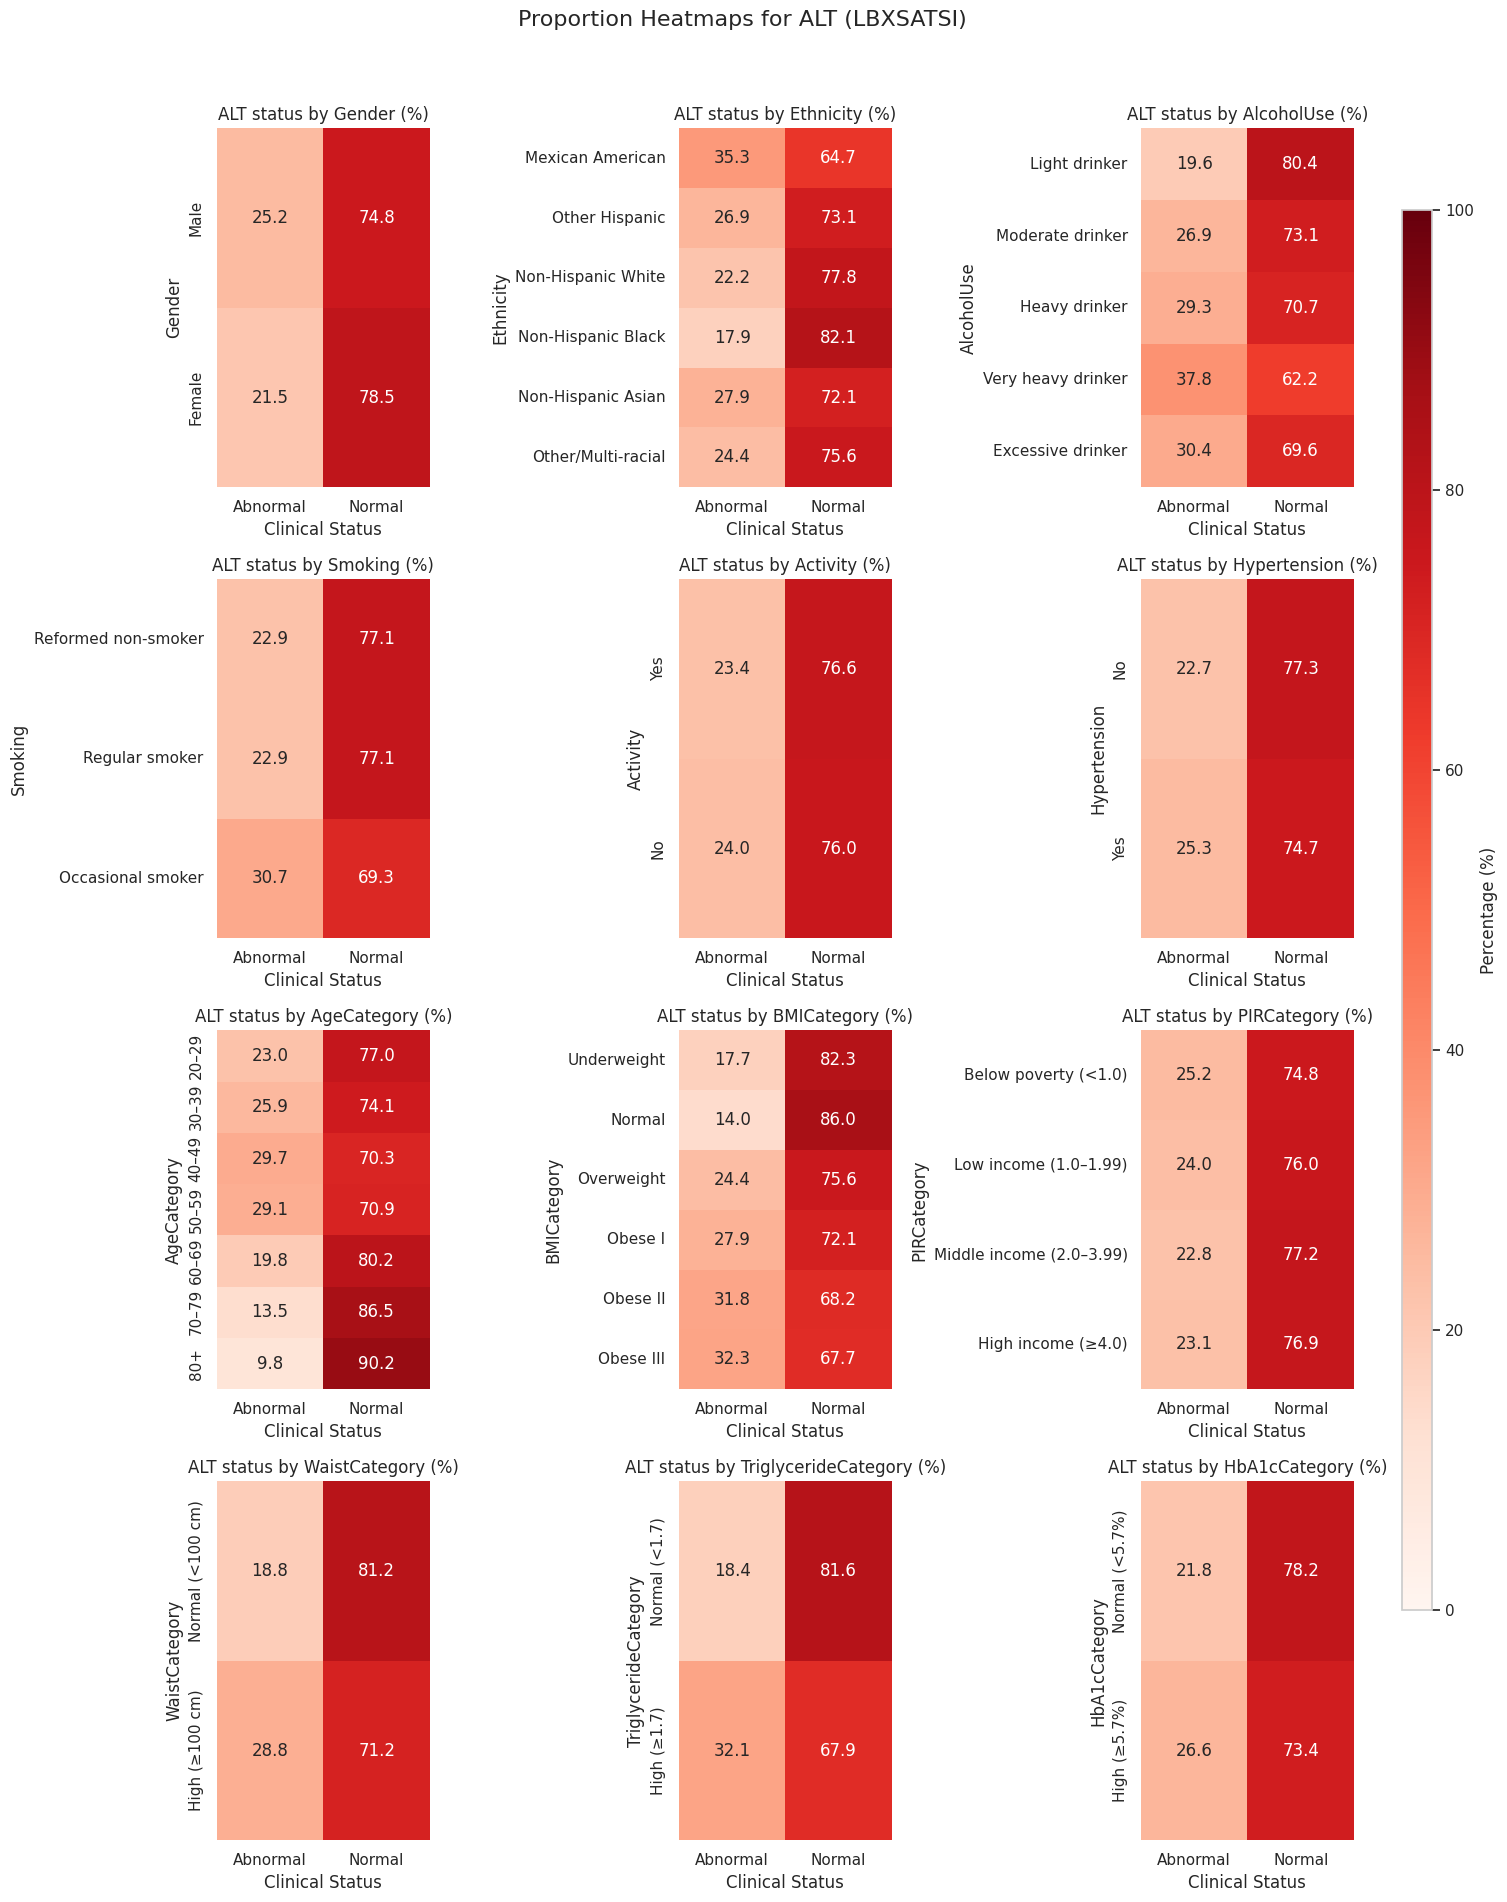

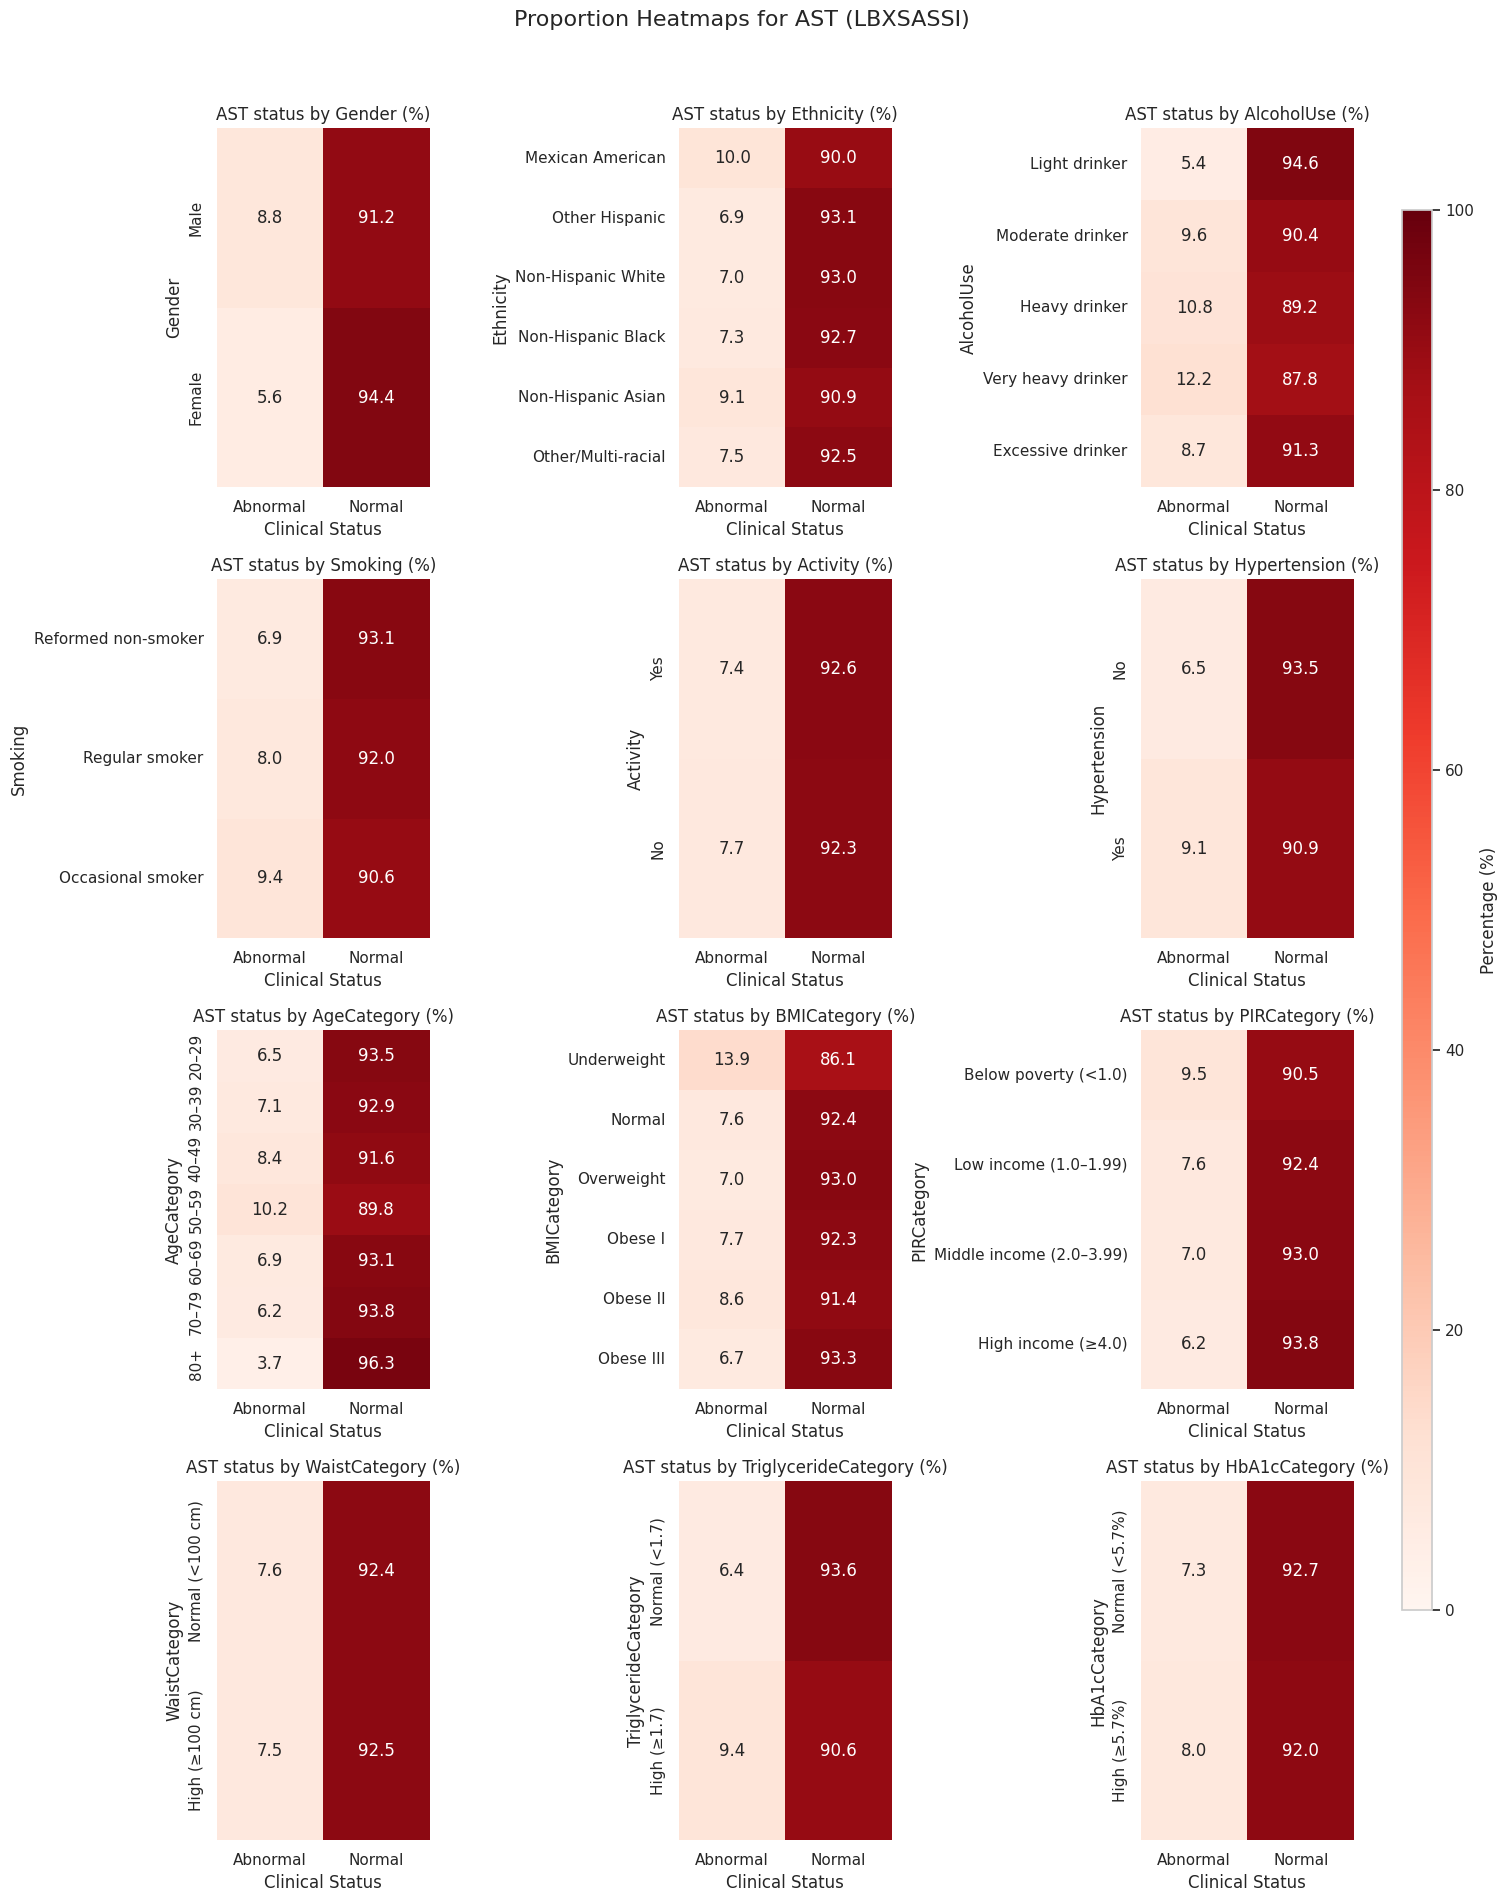

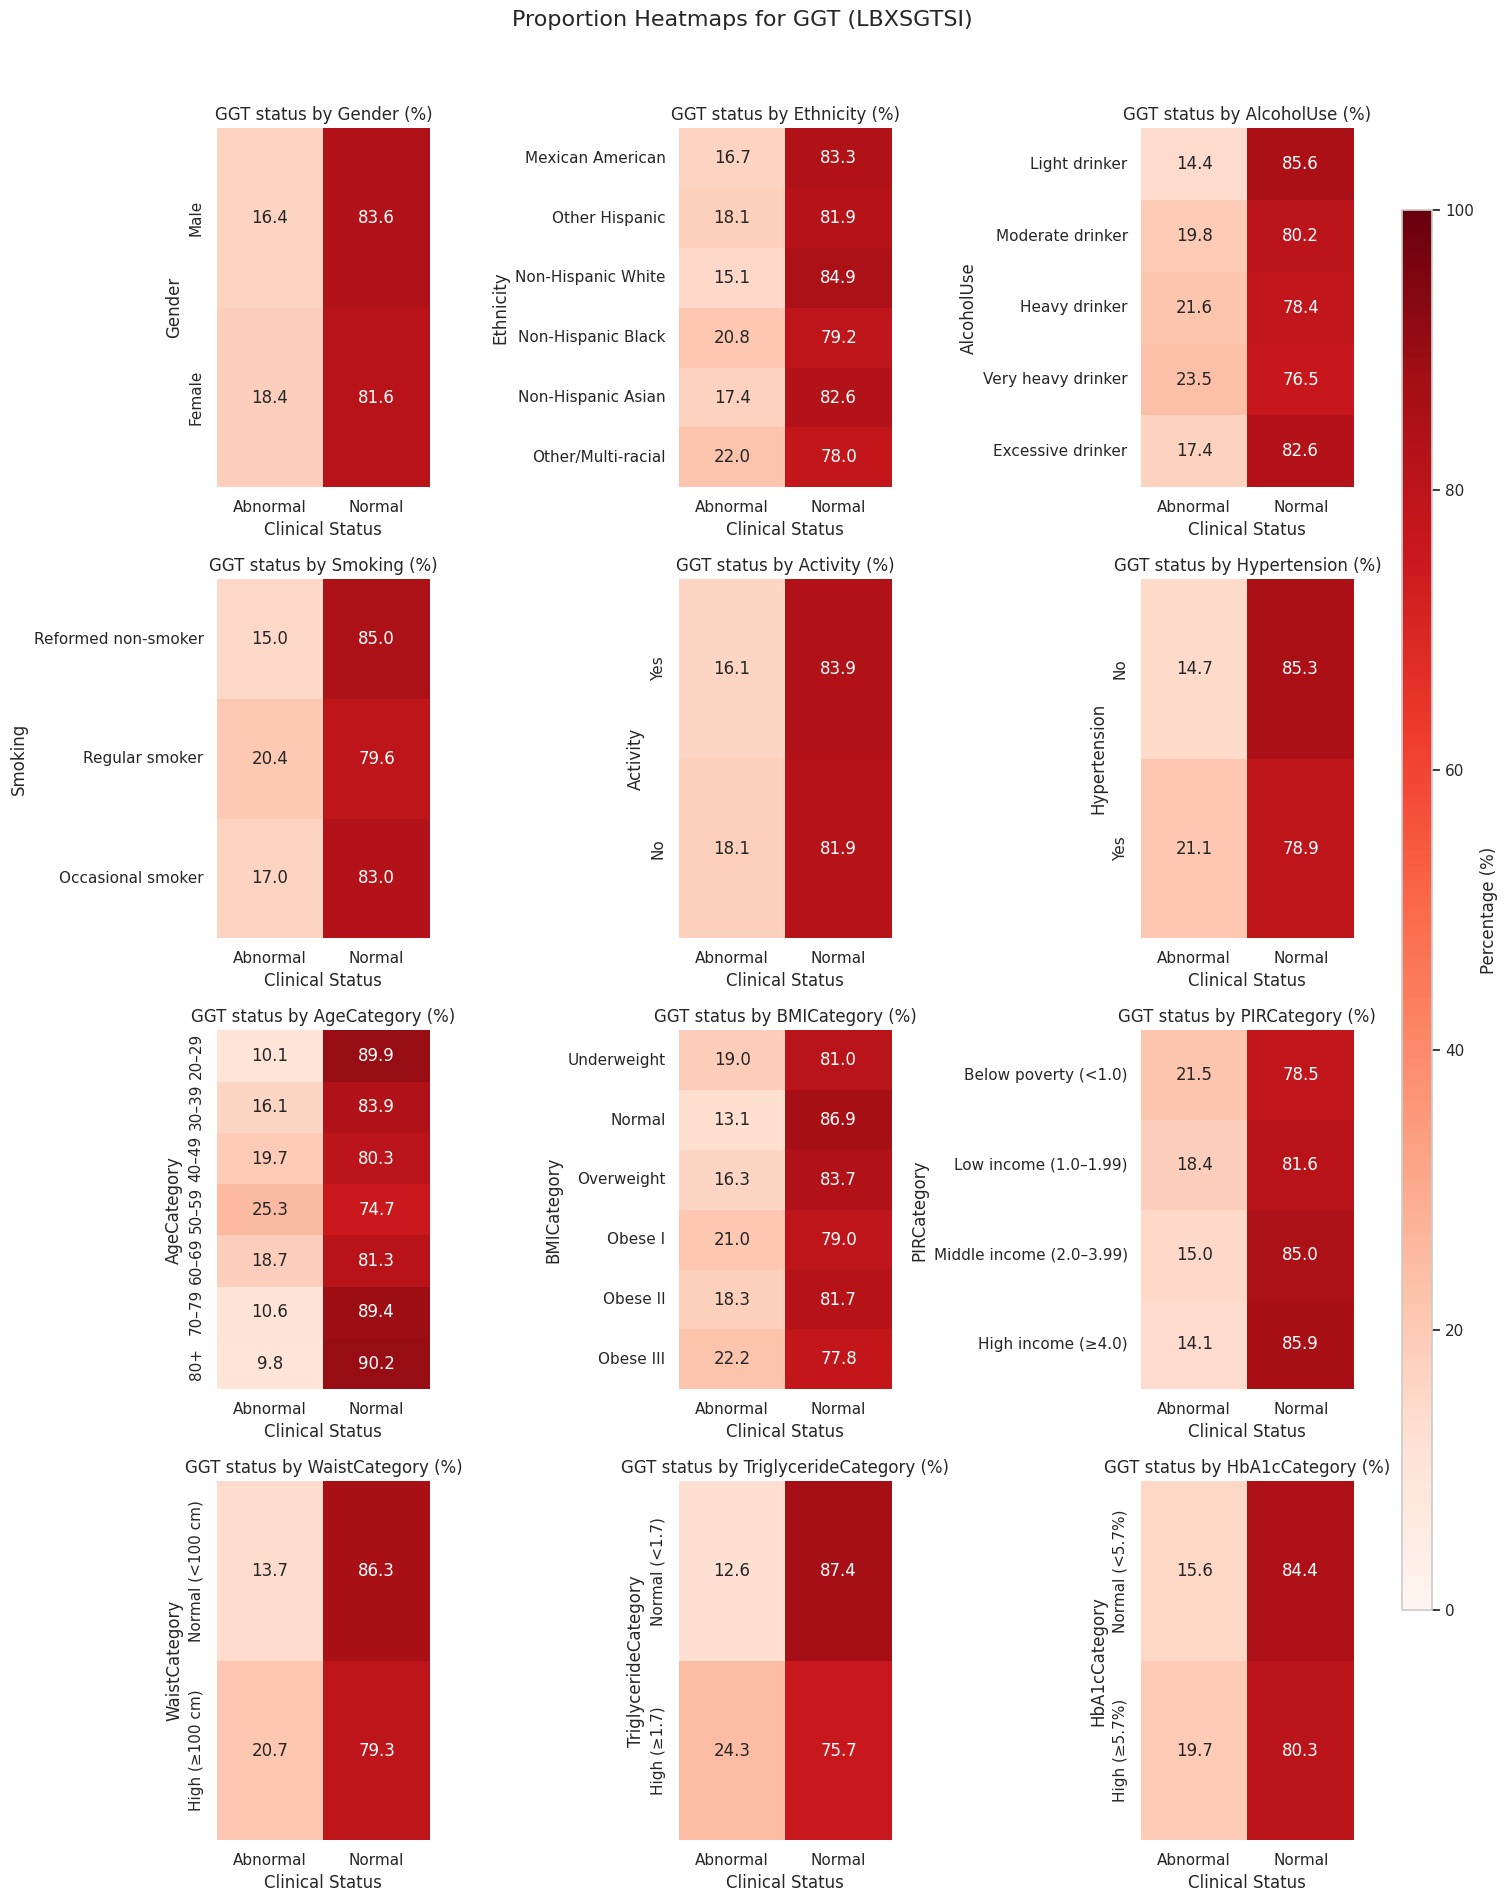

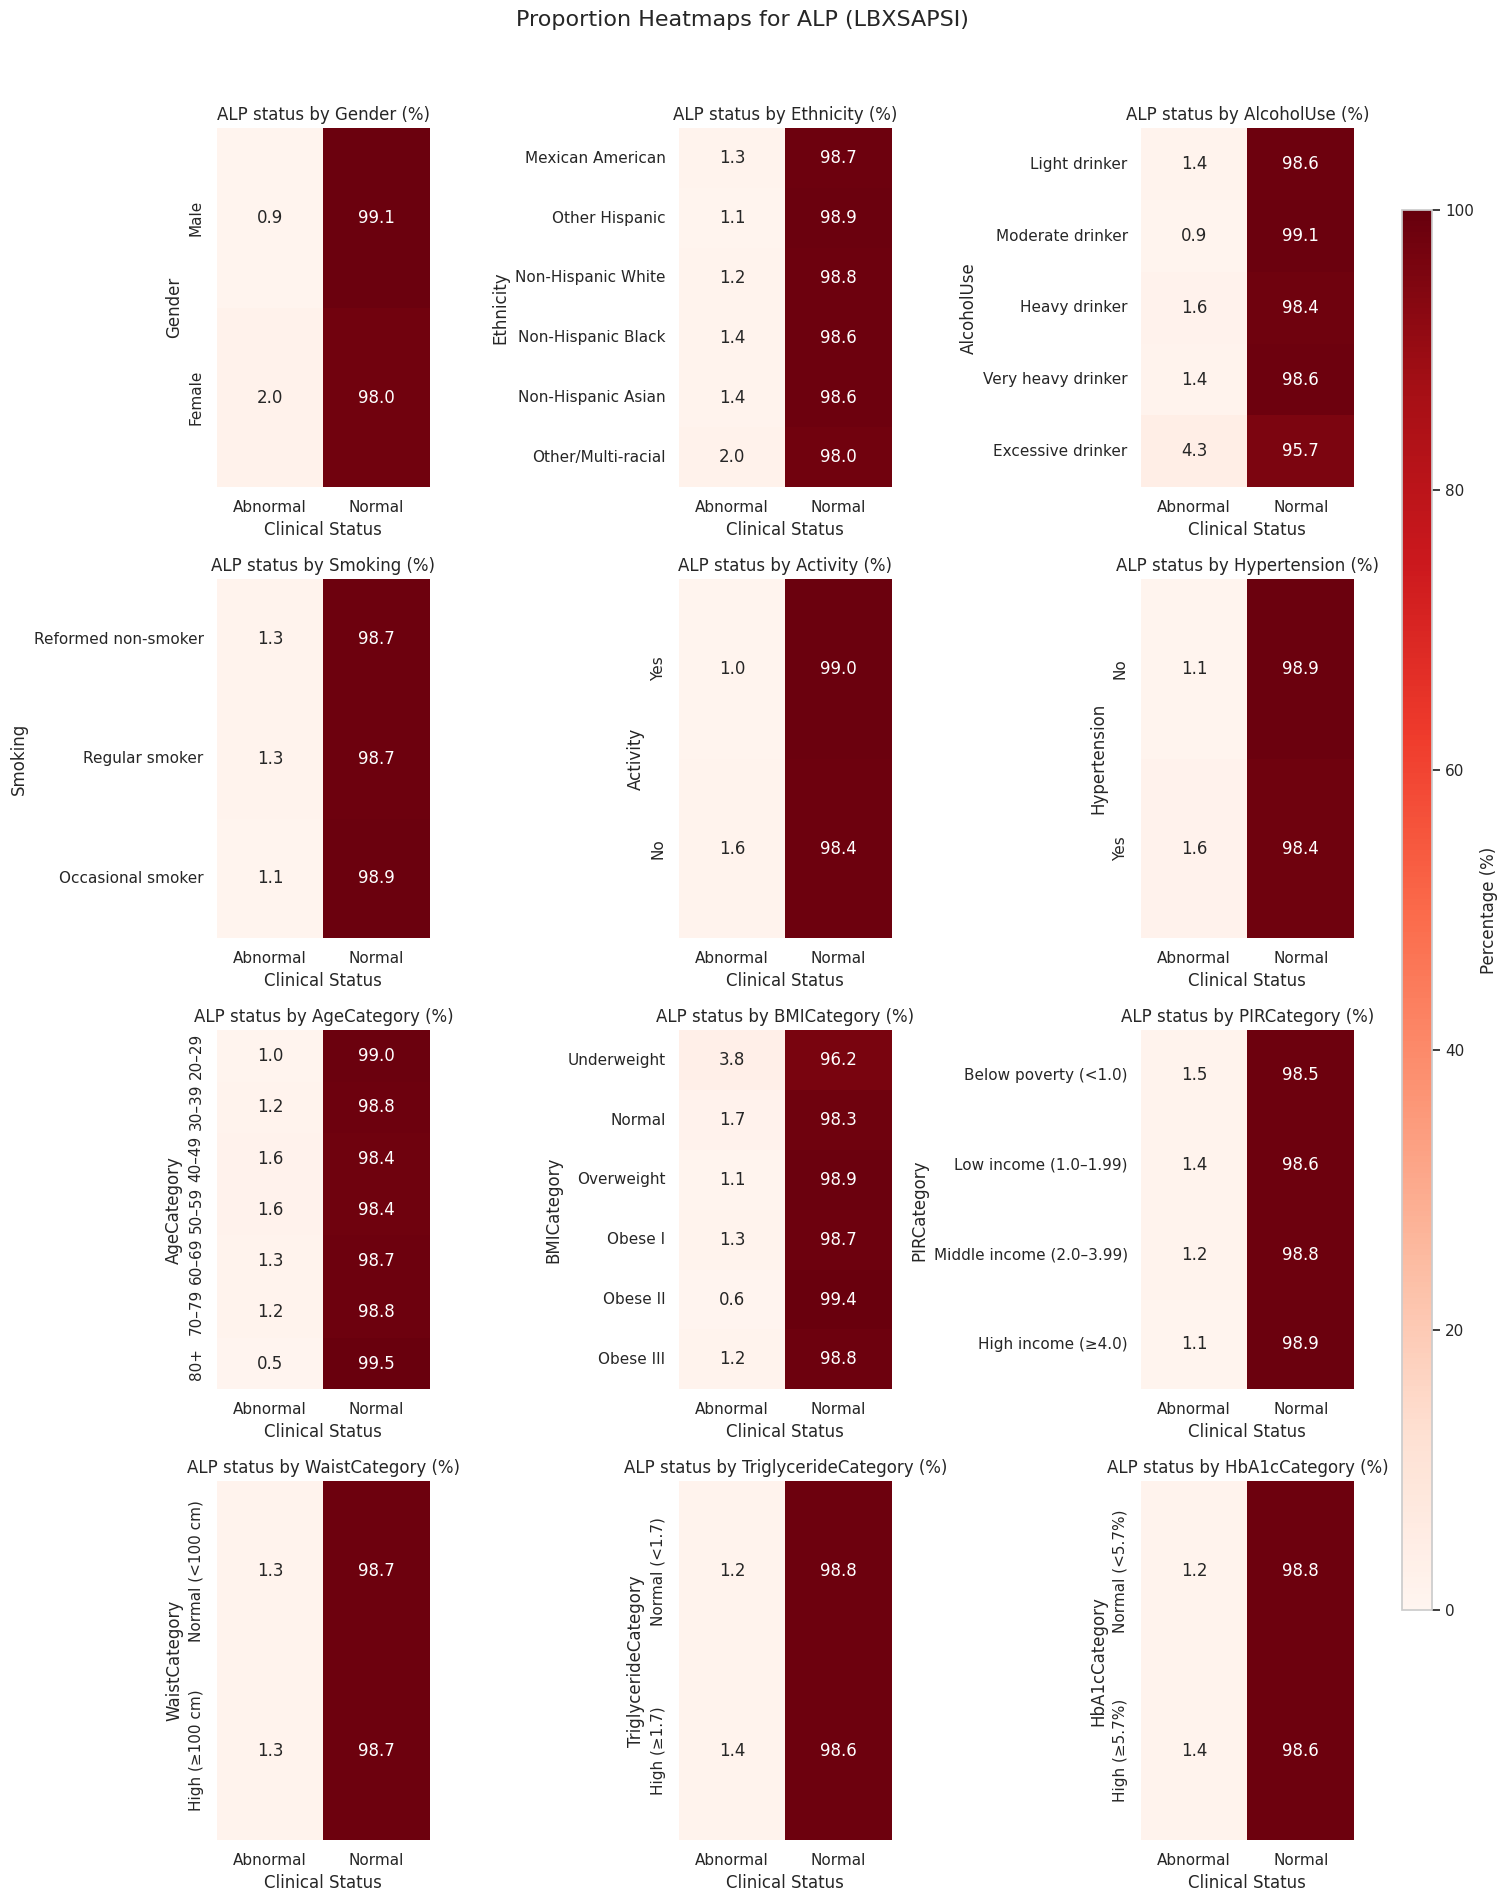

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings # Import the warnings module

def liver_proportion_heatmaps(df, predictors, enzymes, normalize="index"):
    """
    Plots heatmaps showing the % of Normal vs Abnormal status for each biomarker
    across the categorical predictors.
    """
    # 1. We iterate through each biomarker to create its own status
    for code, name in enzymes.items():
        # Increased figsize to (15, 20) again for more space
        fig, axes = plt.subplots(4, 3, figsize=(15, 20))
        axes = axes.ravel()

        for i, pred in enumerate(predictors):
            # A. Determine clinical status for this specific biomarker
            if code == 'LBXSATSI': # ALT
                is_abnormal = ((df['Gender'] == 'Male') & (df[code] >= 33)) | \
                              ((df['Gender'] == 'Female') & (df[code] >= 25))
            elif code == 'LBXSASSI': # AST
                is_abnormal = (df[code] >= 40)
            elif code == 'LBXSGTSI': # GGT
                is_abnormal = ((df['Gender'] == 'Male') & (df[code] >= 51)) | \
                              ((df['Gender'] == 'Female') & (df[code] >= 33))
            elif code == 'LBXSAPSI': # ALP
                is_abnormal = (df[code] < 30) | (df[code] > 147)

            # B. Create a temporary status series
            status = np.where(is_abnormal, "Abnormal", "Normal")

            # C. Create Crosstab in percentages (%)
            # rows = predictor categories, columns = Normal/Abnormal
            prop = pd.crosstab(df[pred], status, normalize=normalize) * 100

            # D. Plot Heatmap
            sns.heatmap(prop, annot=True, fmt=".1f", cmap="Reds",
                        vmin=0, vmax=100, cbar=False, ax=axes[i])

            axes[i].set_title(f"{name} status by {pred} (%)")
            axes[i].set_ylabel(pred)
            axes[i].set_xlabel("Clinical Status")
            axes[i].tick_params(axis="x", rotation=0)

        # E. Add a single colorbar for the whole figure
        sm = plt.cm.ScalarMappable(cmap="Reds")
        sm.set_clim(0, 100)
        cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
        fig.colorbar(sm, cax=cbar_ax, label="Percentage (%)")

        # Adjusted y for suptitle to prevent potential overlap
        fig.suptitle(f"Proportion Heatmaps for {name} ({code})", fontsize=16, y=0.95)
        # Suppress the UserWarning about tight_layout incompatibility
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            # The rect argument might need adjustment if plots are still cramped
            plt.tight_layout(rect=[0, 0, 0.92, 0.93]) # Adjusted rect top slightly
        plt.show()

# --- RUNNING THE CODE ---

# Predictors to use
cat_predictors = ["Gender", "Ethnicity", "AlcoholUse", "Smoking", "Activity", "Hypertension",
    "AgeCategory", "BMICategory", "PIRCategory", "WaistCategory",
    "TriglycerideCategory", "HbA1cCategory"]

# Biomarkers to analyze
enzymes = {
    'LBXSATSI': 'ALT',
    'LBXSASSI': 'AST',
    'LBXSGTSI': 'GGT',
    'LBXSAPSI': 'ALP'
}

# Run the function on your dataframe
liver_proportion_heatmaps(df_final, cat_predictors, enzymes)

### **Proportion Analysis of Liver Enzyme Abnormality Across Predictors**

To maintain clarity and relevance, interpretation focuses on predictors showing the largest gradients or clinically meaningful contrasts, rather than exhaustively describing all subgroups.

**Selected Key Findings**
1. **Alcohol Consumption** (Strongest and Most Consistent Gradient)
  - Abnormal prevalence for ALT, AST, and especially GGT increased progressively
  with higher alcohol intake
  - ALT abnormality rose from ~20% in light drinkers to nearly 38% in very heavy drinkers
  - GGT abnormality showed the clearest dose–response pattern, reaching >23% in very heavy drinkers
  - This aligns with known alcohol-related hepatocellular and enzymatic induction effects and highlights GGT as the most alcohol-sensitive marker
2. **Metabolic Risk Markers** (Triglycerides and Waist Circumference)
  - Participants with high triglycerides (≥1.7 mmol/L) showed markedly higher abnormal prevalence:
    - ALT: ~32% vs ~18% in normal triglyceride levels
    - GGT: ~24% vs ~13%
  - High waist circumference (≥100 cm) was similarly associated with higher abnormal ALT and GGT
  - These findings suggest that central adiposity and dyslipidaemia are strongly linked to subclinical liver stress
  3. **BMI Category** (Non-Linear but Directional Pattern)
  - Abnormal ALT prevalence increased from normal BMI (~14%) to Obese II–III (>30%)
  - GGT showed a similar upward trend across increasing BMI classes
  - This supports BMI as an important, but potentially non-linear, risk factor—justifying the use of XGBoost in later analyses
4. **Age** (Midlife Peak)
  - Abnormal ALT and GGT prevalence peaked in middle-aged groups (40–59 years) and declined thereafter
  - Older age groups showed lower abnormal prevalence despite ageing, suggesting possible survivor bias or reduced exposure to metabolic/alcohol risk factors
5. **Gender** (Modest but Consistent Differences)
  - Males showed higher abnormal prevalence for ALT and AST, consistent with observed mean differences and gender-specific thresholds
  - GGT abnormality was comparable between sexes, indicating broader metabolic and lifestyle influences beyond sex alone
6. **Hypertension** (Moderate Elevation)
  - Participants with hypertension exhibited slightly higher abnormal prevalence for ALT, AST, and GGT
  - Differences were smaller than those observed for metabolic or alcohol-related predictors but remained directionally consistent
7. **ALP** (Minimal Variation Across Predictors)
  - Abnormal ALP prevalence was uniformly low (<2%) across nearly all predictors
  - This suggests limited cholestatic or biliary dysfunction in the general population sample and supports treating ALP as a low-prevalence outcome in modelling

## **📊 Prevalence Analysis and Statistical Significance**

In this section, we calculate the prevalence of abnormal liver enzyme levels for each predictor category. We utilize the Pearson Chi-squared test to test the null hypothesis that there is no association between the predictor (e.g., Alcohol Use) and the clinical outcome (Abnormal enzyme level).

A p-value <0.05 indicates a statistically significant difference in prevalence between the groups.

Generating prevalence analysis for predictor: Gender


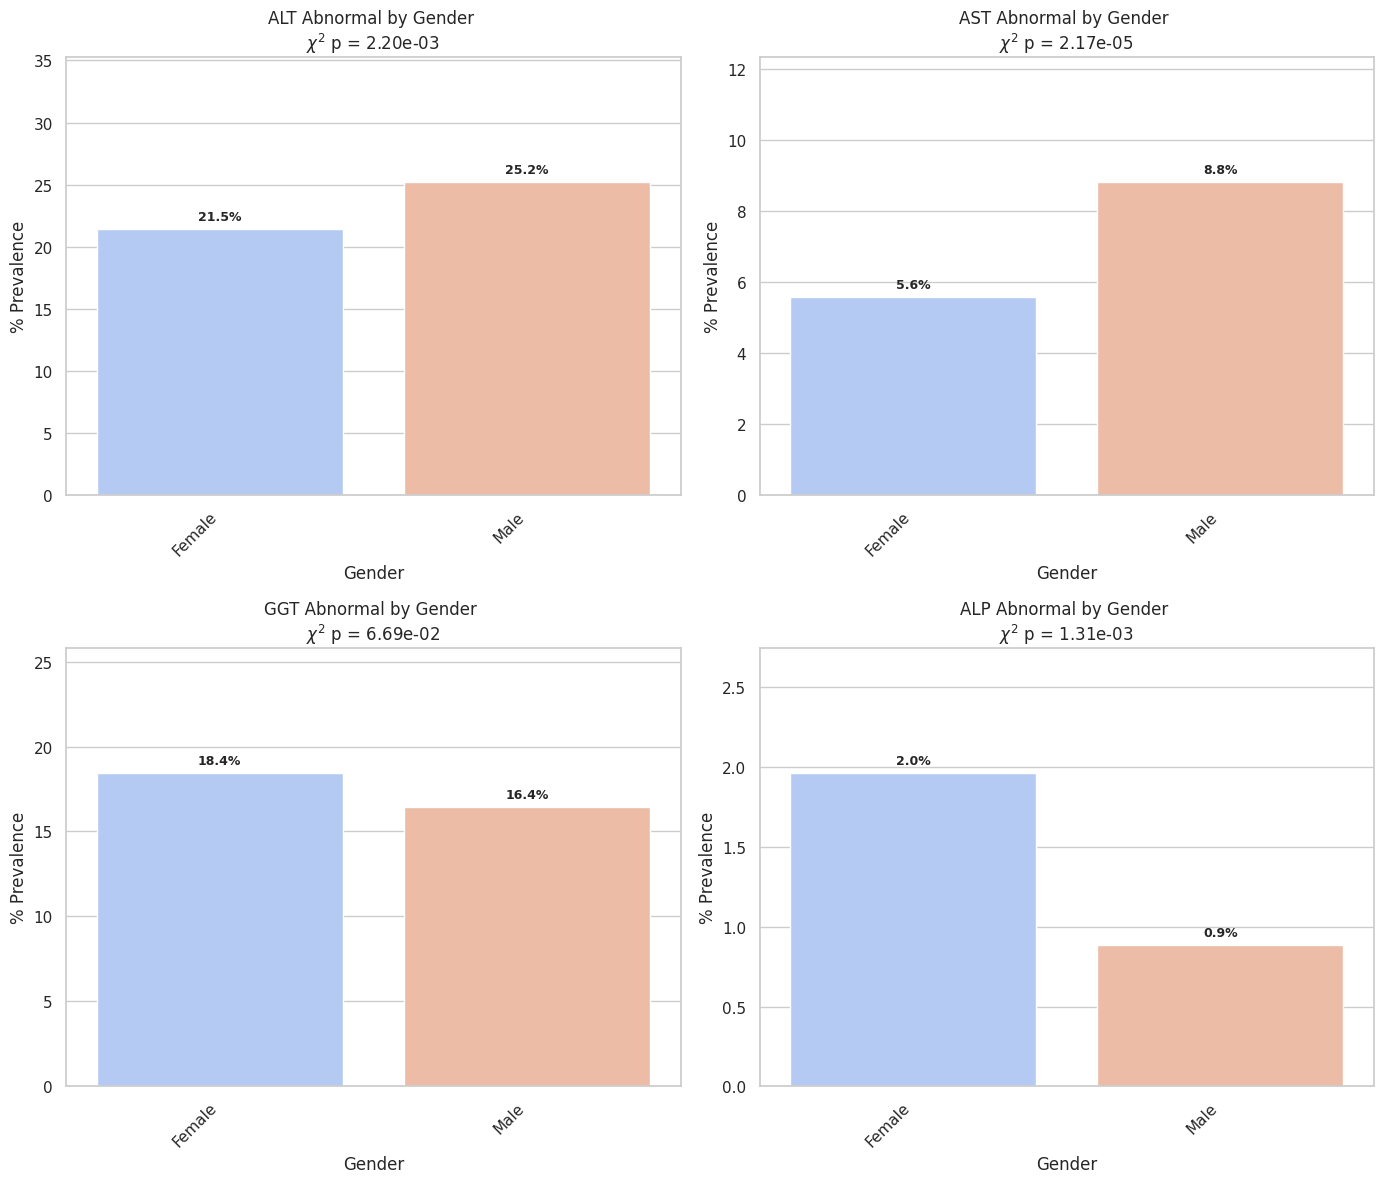

Generating prevalence analysis for predictor: Ethnicity


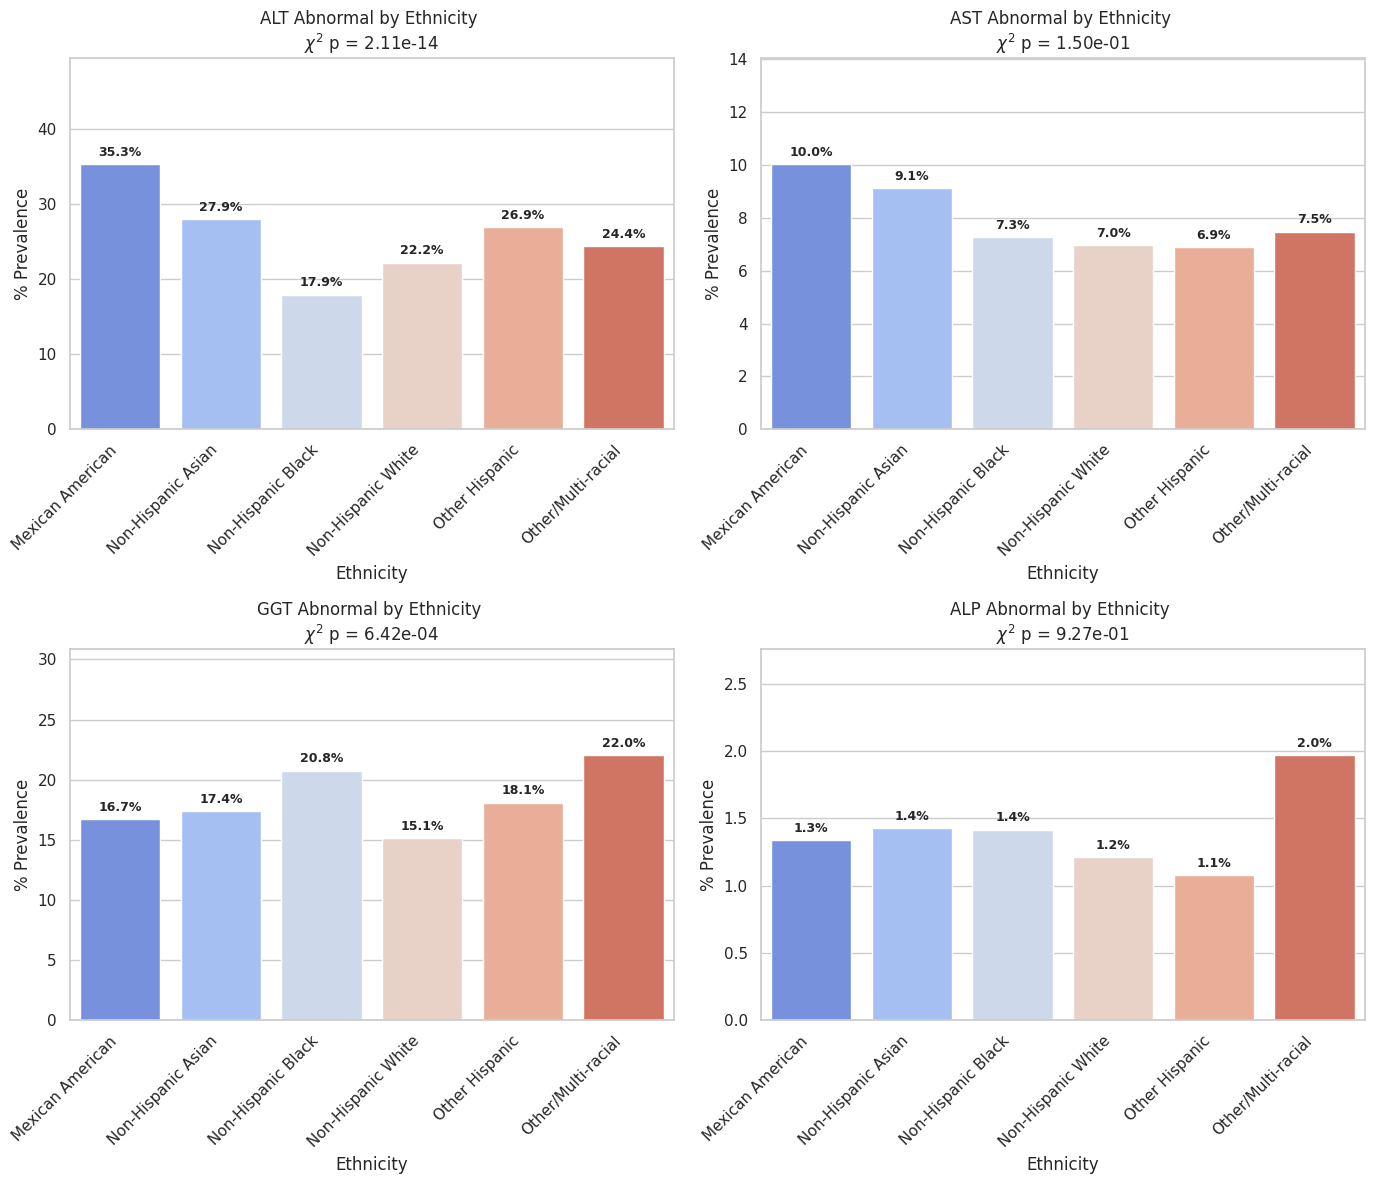

Generating prevalence analysis for predictor: AlcoholUse


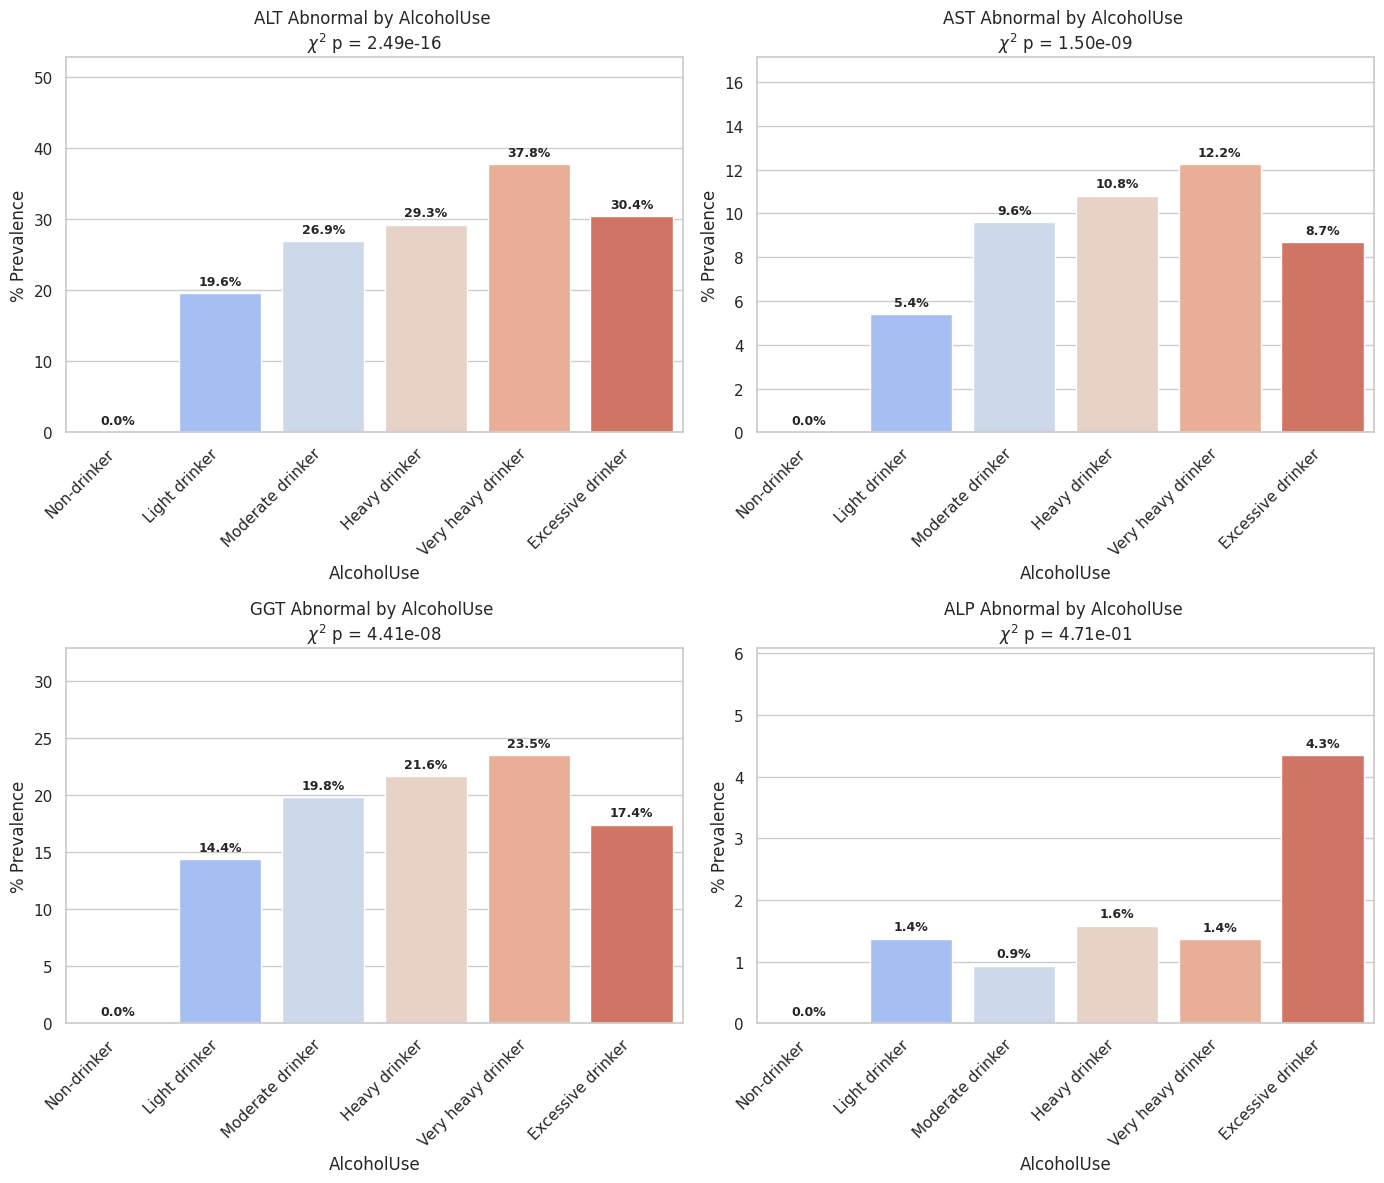

Generating prevalence analysis for predictor: Smoking


Generating prevalence analysis for predictor: Activity


Generating prevalence analysis for predictor: Hypertension


Generating prevalence analysis for predictor: AgeCategory


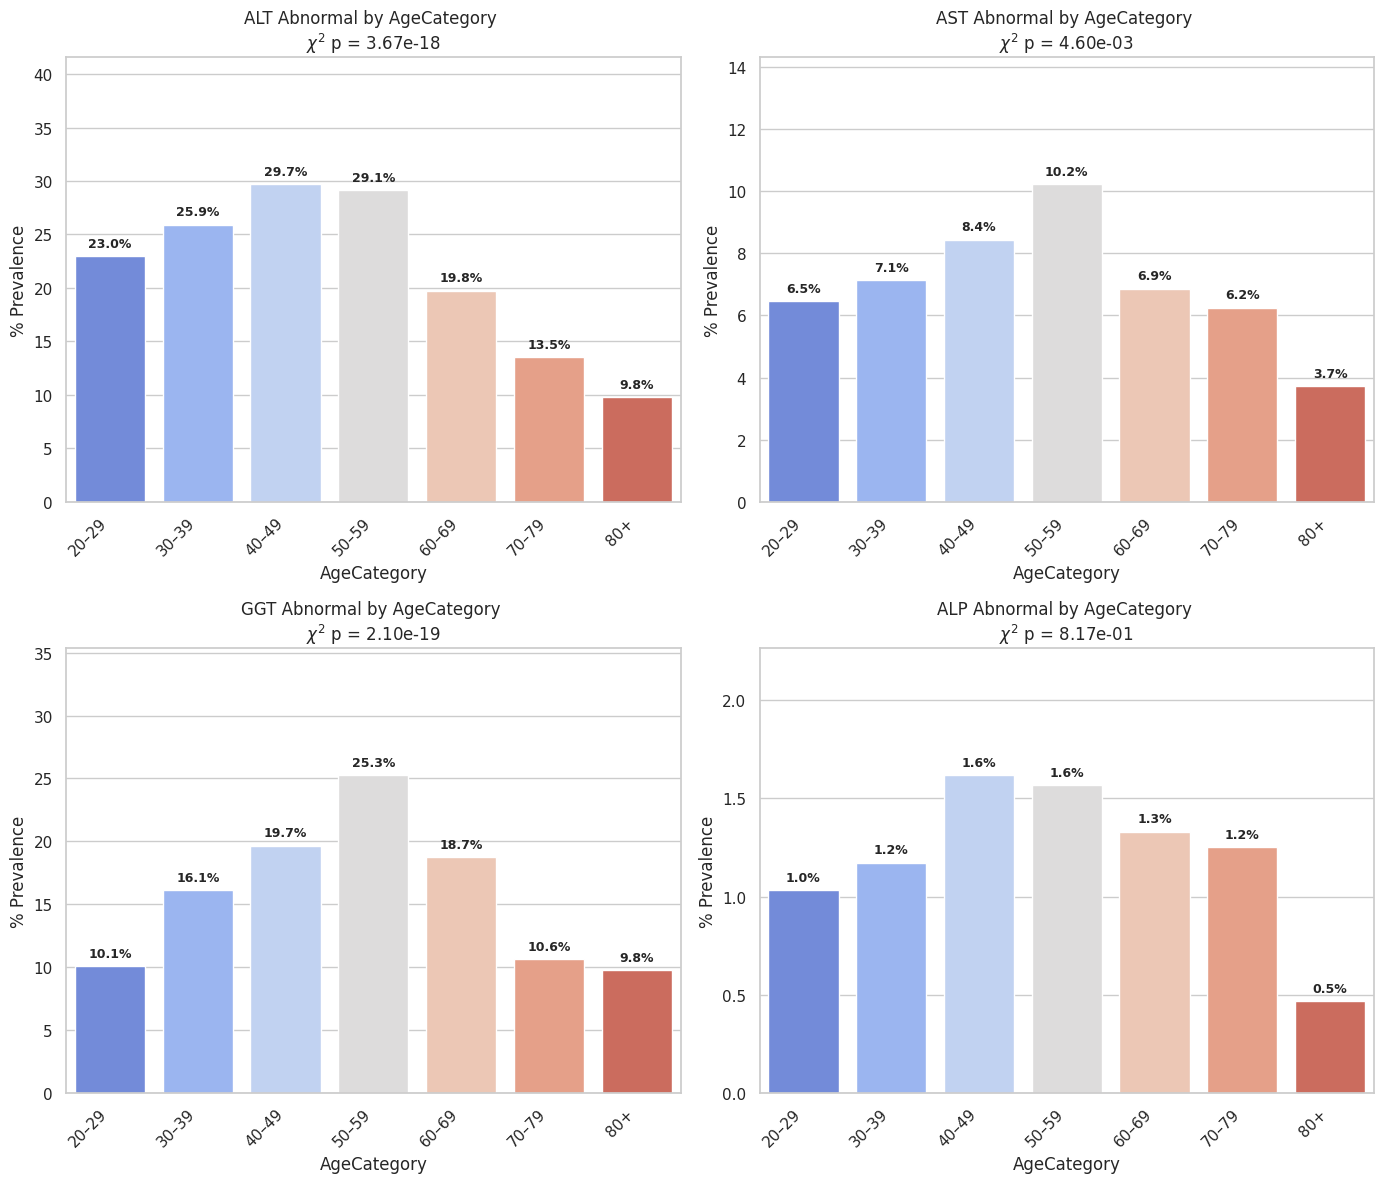

Generating prevalence analysis for predictor: BMICategory


Generating prevalence analysis for predictor: PIRCategory


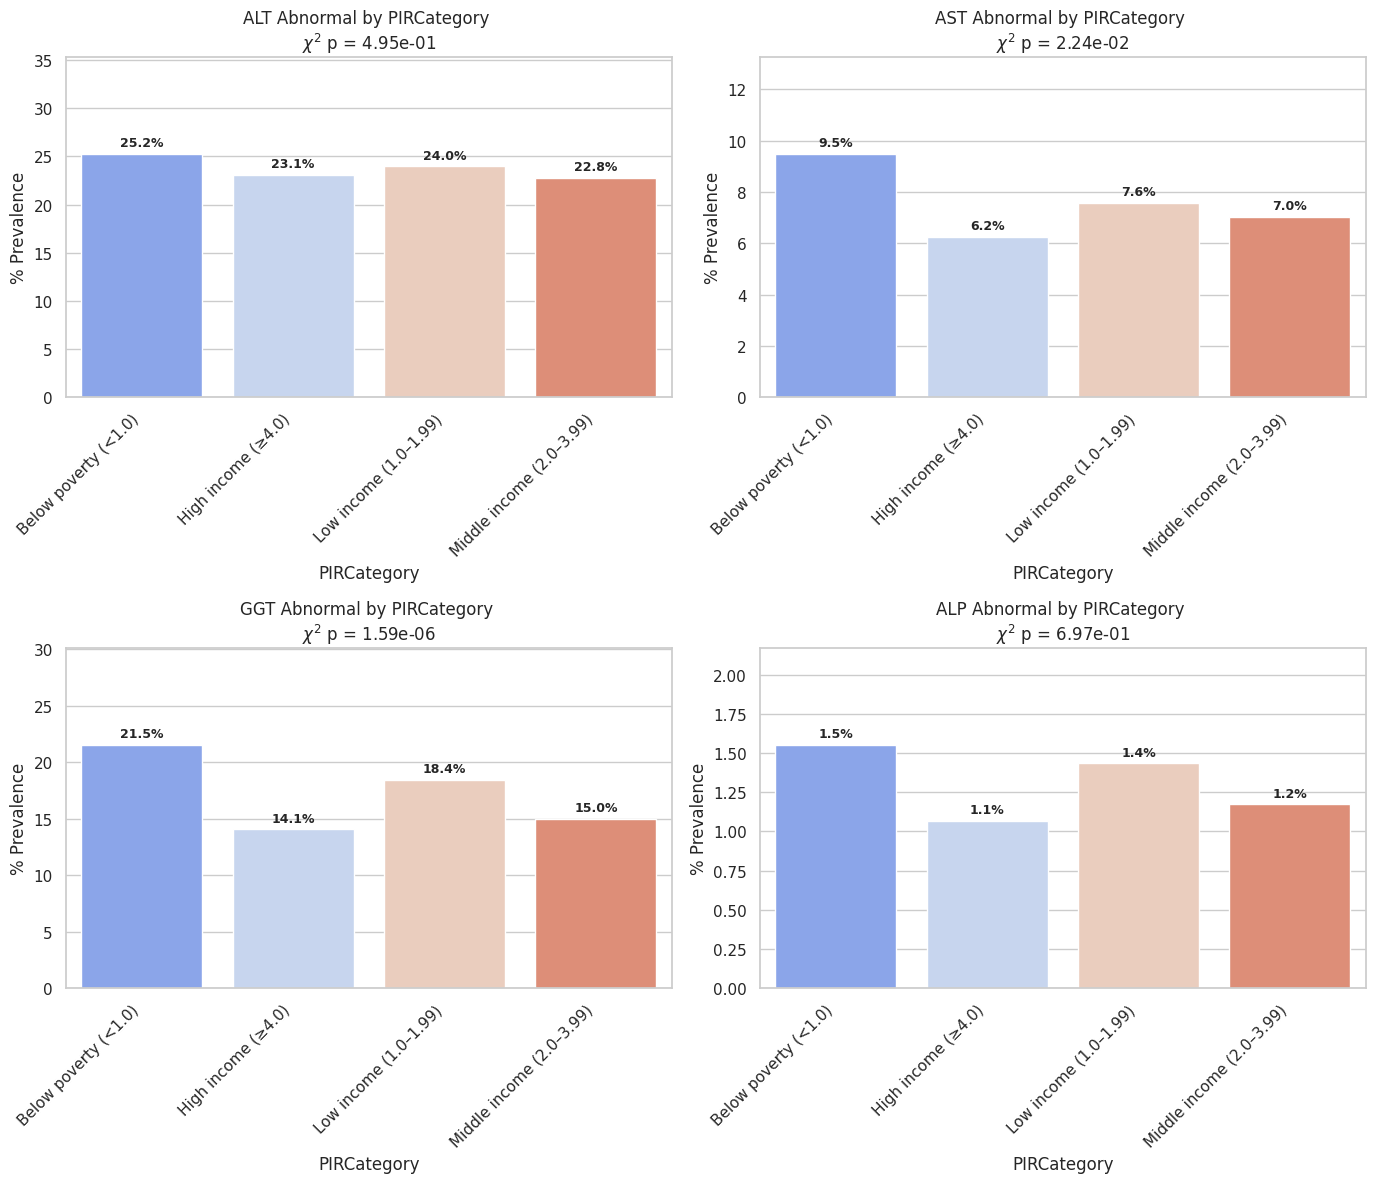

Generating prevalence analysis for predictor: WaistCategory


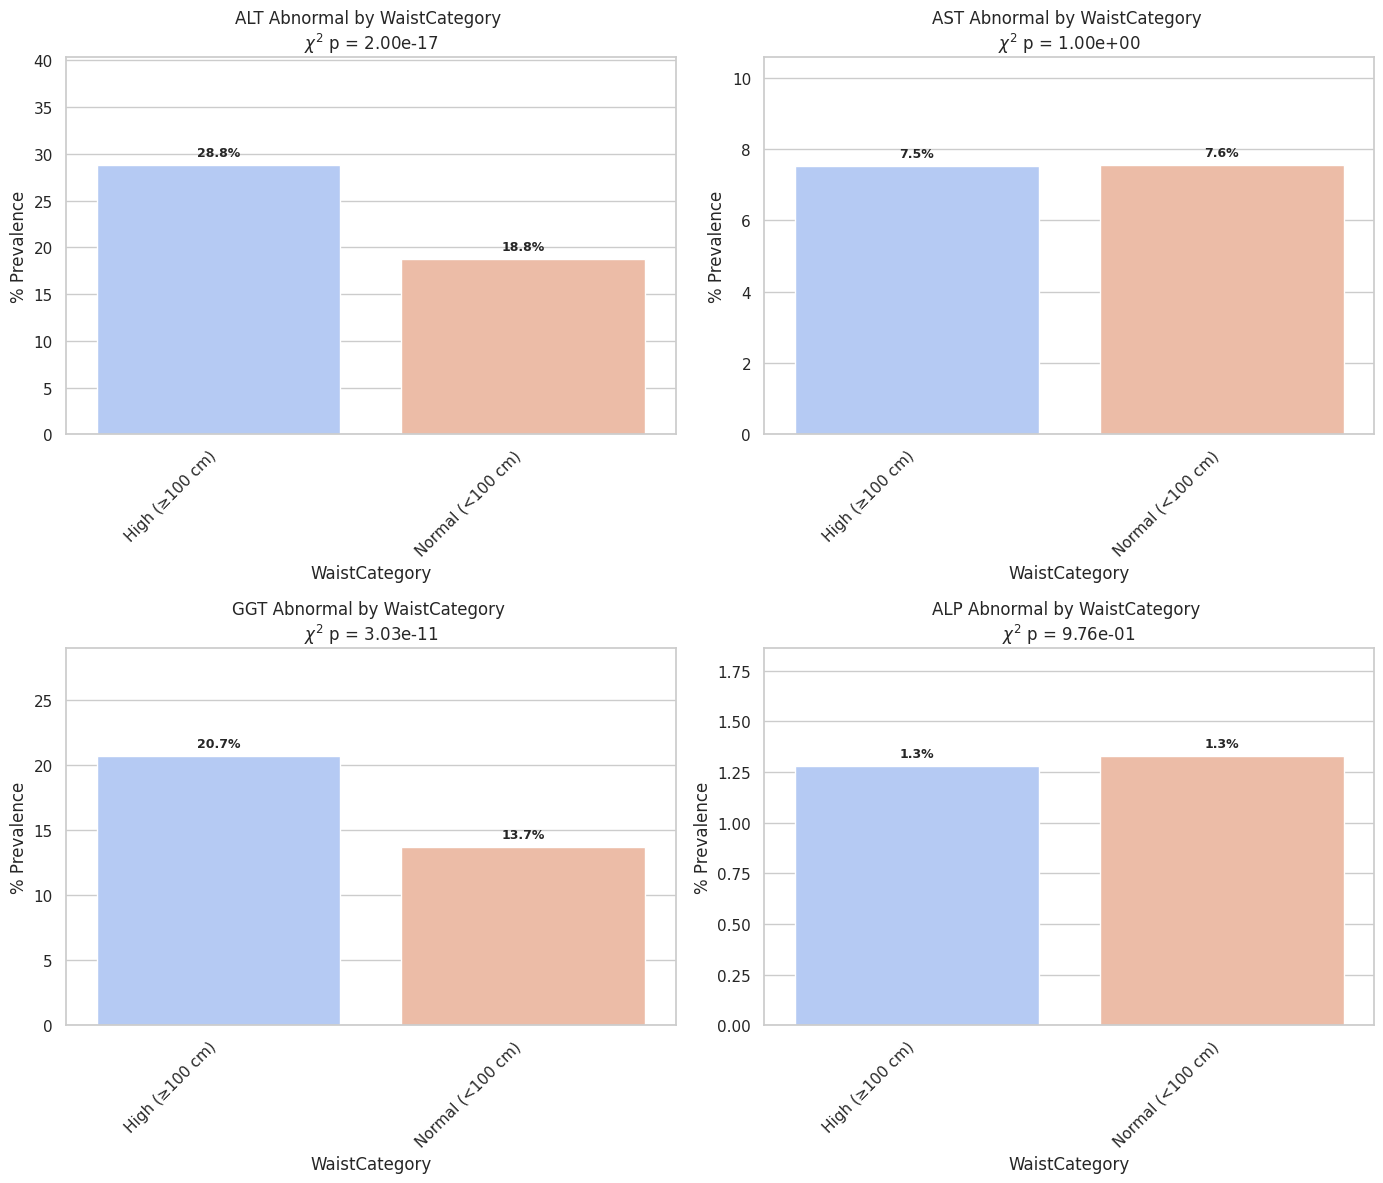

Generating prevalence analysis for predictor: TriglycerideCategory


Generating prevalence analysis for predictor: HbA1cCategory


In [ ]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1) PREPARATION
df_stats = df_final.copy()

enzymes = {
    'LBXSATSI': 'ALT',
    'LBXSASSI': 'AST',
    'LBXSGTSI': 'GGT',
    'LBXSAPSI': 'ALP'
}

for code, name in enzymes.items():
    if code == 'LBXSATSI':
        cond = ((df_stats['Gender'] == 'Male') & (df_stats[code] >= 33)) | \
               ((df_stats['Gender'] == 'Female') & (df_stats[code] >= 25))
    elif code == 'LBXSASSI':
        cond = (df_stats[code] >= 40)
    elif code == 'LBXSGTSI':
        cond = ((df_stats['Gender'] == 'Male') & (df_stats[code] >= 51)) | \
               ((df_stats['Gender'] == 'Female') & (df_stats[code] >= 33))
    elif code == 'LBXSAPSI':
        cond = (df_stats[code] < 30) | (df_stats[code] > 147)

    df_stats[f'{name}_Status'] = np.where(cond, "Abnormal", "Normal")

outcomes = [f"{n}_Status" for n in enzymes.values()]
positives = {f"{n}_Status": "Abnormal" for n in enzymes.values()}

predictors = [
    "Gender", "Ethnicity", "AlcoholUse", "Smoking", "Activity", "Hypertension",
    "AgeCategory", "BMICategory", "PIRCategory", "WaistCategory",
    "TriglycerideCategory", "HbA1cCategory"]

# 2) REFINED PLOTTING FUNCTION
def prevalence_bar_with_chi2(df, outcome_col, positive_label, group_col, ax=None):
    sub = df[[outcome_col, group_col]].dropna().copy()

    # --- MANUAL CATEGORY ENFORCEMENT ---
    # We define the exact order and names for the problematic categories here
    if group_col == "Smoking":
        cats = ["Never smoked", "Occasional smoker", "Reformed non-smoker", "Regular smoker"]
    elif group_col == "Hypertension":
        cats = ["No", "Borderline", "Yes"]
    elif group_col == "AlcoholUse":
        # Updated based on your alcohol_order request
        cats = ["Non-drinker", "Light drinker", "Moderate drinker", "Heavy drinker", "Very heavy drinker", "Excessive drinker"]
    else:
        # Fallback: use unique values found in the data, sorted alphabetically
        cats = sorted(sub[group_col].unique().tolist())

    # Re-cast as a categorical type with the fixed order 'cats'
    sub[group_col] = pd.Categorical(sub[group_col], categories=cats)

    # Calculate percentages (dropna=False preserves categories with zero counts)
    ct = pd.crosstab(sub[group_col], sub[outcome_col], dropna=False)

    # Calculate prevalence proportion (safe handle if positive_label column is missing)
    if positive_label in ct.columns:
        prop = (ct[positive_label] / ct.sum(axis=1) * 100).fillna(0)
    else:
        prop = pd.Series(0.0, index=cats)

    # Chi-Squared Test (only on rows/cols with actual data)
    ct2 = ct.loc[ct.sum(axis=1) > 0, ct.sum(axis=0) > 0]
    if ct2.shape[0] >= 2 and ct2.shape[1] >= 2:
        try:
            _, p, _, _ = chi2_contingency(ct2)
        except ValueError:
            p = np.nan
    else:
        p = np.nan

    # Plotting
    if ax is None: fig, ax = plt.subplots()

    # Using 'order=cats' is the key to showing the empty bars
    sns.barplot(x=prop.index, y=prop.values, ax=ax, palette="coolwarm",
                hue=prop.index, legend=False, order=cats)

    ax.set_title(f"{outcome_col.replace('_Status','')}" " Abnormal by " f"{group_col} \n" + r"$\chi^2$ p = " + f"{p:.2e}" if np.isfinite(p) else f"p = n/a")
    ax.set_ylabel("% Prevalence")

    # Set Y-limit with breathing room for text labels
    y_max = max(prop.values) if (len(prop.values) > 0 and max(prop.values) > 0) else 10
    ax.set_ylim(0, y_max * 1.4)

    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Add the percentage labels
    # Enumerating 'cats' ensures we align with the forced X-axis index
    for i, label in enumerate(cats):
        v = prop.get(label, 0.0)
        ax.text(i, v + (y_max * 0.02), f"{v:.1f}%", ha="center", va="bottom", fontsize=9, fontweight='bold')

def prevalence_grid(df, outcomes, positives, group_col):
    n = len(outcomes)
    cols = 2
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows)) # Slightly wider for alcohol labels
    axes = np.atleast_1d(axes).ravel()

    for ax, out in zip(axes, outcomes):
        prevalence_bar_with_chi2(df, out, positives[out], group_col, ax=ax)

    for ax in axes[len(outcomes):]: fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

# 3) EXECUTION
for gc in predictors:
    print(f"Generating prevalence analysis for predictor: {gc}")
    prevalence_grid(df_stats, outcomes, positives, group_col=gc)

### **Key Findings: Prevalence & Chi-square Analysis (Selected Highlights)**

#### Overall pattern
- **ALT and GGT** show the **strongest and most consistent associations** with lifestyle and metabolic predictors
- **AST** shows weaker or inconsistent associations across most predictors
- **ALP** abnormalities are **rare (<5%)** and largely **not significantly associated** with most predictors

---

#### Gender
- **ALT:** Higher abnormal prevalence in **males (25.2%) vs females (21.5%)**  
  - χ² p = 2.20e-03 (significant)
- **AST:** Higher in **males (8.8%) vs females (5.6%)**  
  - χ² p = 2.17e-05 (significant)
- **GGT:** Slightly higher in females, but **not statistically significant**
- **ALP:** Very low prevalence; difference statistically significant but clinically small

---

#### Ethnicity
- **ALT:** Strong ethnic variation  
  - Highest in **Mexican Americans (35.3%)**, lowest in **Non-Hispanic Black (17.9%)**  
  - χ² p = 2.11e-14 (highly significant)
- **GGT:** Significant differences across ethnic groups  
  - χ² p = 6.42e-04
- **AST & ALP:** No significant ethnic association

---

#### Alcohol Use
- Clear **dose–response relationship** for ALT, AST, and GGT:
  - **ALT:** 19.6% (light) → **37.8% (very heavy)**  
    - χ² p = 2.49e-16
  - **AST:** 5.4% (light) → **12.2% (very heavy)**  
    - χ² p = 1.50e-09
  - **GGT:** 14.4% (light) → **23.5% (very heavy)**  
    - χ² p = 4.41e-08
- **ALP:** No meaningful association with alcohol use

---

#### Smoking
- **ALT:** Highest abnormal prevalence in **occasional smokers (30.7%)**  
  - χ² p = 2.26e-04 (significant)
- **GGT:** Highest in **regular smokers (20.4%)**  
  - χ² p = 9.41e-06 (significant)
- **AST & ALP:** No statistically significant differences

---

#### Physical Activity
- No meaningful differences for **ALT, AST, GGT, or ALP**
- All χ² p-values > 0.05  
→ Physical activity alone does **not strongly differentiate enzyme abnormality prevalence**

---

#### Hypertension
- **ALT:** Higher abnormal prevalence in hypertensive individuals (25.3% vs 22.7%)  
  - χ² p = 3.15e-02
- **AST:** Higher in hypertensive group (9.1% vs 6.5%)  
  - χ² p = 7.11e-04
- **GGT:** Strong association (21.1% vs 14.7%)  
  - χ² p = 5.14e-09
- **ALP:** No significant association

---

#### Age Category
- **ALT & GGT:** Peak abnormal prevalence in **middle age (40–59 years)**  
  - ALT χ² p = 3.67e-18  
  - GGT χ² p = 2.10e-19
- Prevalence declines in older age groups (≥70)
- **AST:** Modest but significant variation
- **ALP:** No significant age trend

---

#### BMI Category
- **ALT:** Strong positive gradient with obesity  
  - Highest in **Obese II–III (~32%)**, lowest in normal BMI (14%)  
  - χ² p = 7.78e-24
- **GGT:** Elevated in obese groups  
  - χ² p = 7.80e-07
- **AST & ALP:** No significant BMI association

---

#### Central Adiposity (Waist Circumference)
- **ALT:** Higher abnormal prevalence with **high waist circumference**  
  - 28.8% vs 18.8%  
  - χ² p = 2.00e-17
- **GGT:** Also significantly higher  
  - χ² p = 3.03e-11
- **AST & ALP:** No association

---

#### Income (PIR)
- **GGT:** Higher abnormal prevalence in **below-poverty group (21.5%)**  
  - χ² p = 1.59e-06
- **ALT & ALP:** No significant income gradient
- **AST:** Mild but significant association

---

#### Triglycerides
- **ALT**: Markedly higher abnormal prevalence with high triglycerides (≥1.7 mmol/L)
  - 32.1% vs 18.4%
  - χ² p = 1.09e-29 (highly significant)
- **AST**: Higher abnormal prevalence in high triglyceride group
  - 9.4% vs 6.4%
  - χ² p = 6.04e-05
- **GGT**: Strong association with elevated triglycerides
  - 24.3% vs 12.6%
  - χ² p = 2.50e-27
- **ALP**: No significant association

---

#### Glycaemic Status (HbA1c)
- **ALT**: Higher abnormal prevalence in individuals with HbA1c ≥5.7%
  - 26.6% vs 21.8%
  - χ² p = 7.11e-05
- **GGT**: Also elevated in high HbA1c group
  - 19.7% vs 15.6%
  - χ² p = 1.14e-04
- **AST & ALP**: No statistically significant association with HbA1c

---

#### Summary Interpretation
- **ALT and GGT** are the most sensitive markers of **metabolic risk and alcohol exposure**
- **AST** shows weaker associations, suggesting lower sensitivity for subclinical liver stress
- **ALP** remains largely stable across demographic and lifestyle factors
- Results support prioritising **ALT and GGT** in downstream multivariable modelling


# **Section 5: Logistic Regression**

## **Logistic Regression for Each Liver Enzyme Status (ALT, AST, GGT, ALP)**

This section performs a separate logistic regression analysis for each of the four liver enzyme status variables (`ALT_Status`, `AST_Status`, `GGT_Status`, `ALP_Status`). For each model, we will use the previously defined categorical and binned continuous variables as predictors. Frequency weights will be applied to address class imbalance for each specific outcome.

In [ ]:
# @title
import pandas as pd
import numpy as np
import statsmodels.api as sm
from IPython.display import display

# 1. CLEAN CATEGORICAL LEVELS
removed_cols = []

# Ensure predictors are treated as categories and clean metadata
for col in predictors:
    df_final[col] = df_final[col].astype('category')
    df_final[col] = df_final[col].cat.remove_unused_categories()

# 2. Prepare X_base and Encoding
X_base = df_final[predictors].copy()
X_model = pd.get_dummies(X_base, drop_first=True, dtype=int)

# 3. TEACHER'S MODIFICATION: Add the constant (Intercept)
X_model = sm.add_constant(X_model)

# 4. THE GHOST HUNTER (Step 5):
# If a category had 0 rows, it will be a column of all 0s here.
# We find those columns and remove them.
zero_variance_cols = [c for c in X_model.columns if c != 'const' and X_model[c].std() == 0]

if zero_variance_cols:
    print(f"✅ Removing empty categories/columns: {zero_variance_cols}")
    X_model = X_model.drop(columns=zero_variance_cols)
else:
    print("No zero-variance columns found. All encoded predictors have data.")

# --- FORMATTED OUTPUT ---
print(f"\nDummy-encoded predictors shape: {X_model.shape}")
print("'First few columns:\\n'")
display(X_model.drop(columns='const').head(5))
print(f"{X_model.shape[0]} rows × {X_model.shape[1] - 1} columns")

No zero-variance columns found. All encoded predictors have data.

Dummy-encoded predictors shape: (5208, 32)
'First few columns:\n'


Gender_Female  Ethnicity_Other Hispanic  Ethnicity_Non-Hispanic White  \
0              1                         0                             0   
1              0                         0                             1   
2              1                         0                             0   
3              1                         0                             1   
4              0                         0                             1   

   Ethnicity_Non-Hispanic Black  Ethnicity_Non-Hispanic Asian  \
0                             1                             0   
1                             0                             0   
2                             1                             0   
3                             0                             0   
4                             0                             0   

   Ethnicity_Other/Multi-racial  AlcoholUse_Moderate drinker  \
0                             0                            1   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   AlcoholUse_Heavy drinker  AlcoholUse_Very heavy drinker  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   AlcoholUse_Excessive drinker  ...  BMICategory_Overweight  \
0                             0  ...                       0   
1                             0  ...                       1   
2                             0  ...                       0   
3                             0  ...                       1   
4                             0  ...                       1   

   BMICategory_Obese I  BMICategory_Obese II  BMICategory_Obese III  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    0                     0                      1   
3                    0                     0                      0   
4                    0                     0                      0   

   PIRCategory_Low income (1.0–1.99)  PIRCategory_Middle income (2.0–3.99)  \
0                                  0                                     1   
1                                  0                                     0   
2                                  0                                     0   
3                                  1                                     0   
4                                  1                                     0   

   PIRCategory_High income (≥4.0)  WaistCategory_High (≥100 cm)  \
0                               0                             1   
1                               1                             1   
2                               1                             1   
3                               0                             0   
4                               0                             1   

   TriglycerideCategory_High (≥1.7)  HbA1cCategory_High (≥5.7%)  
0                                 0                           0  
1                                 1                           0  
2                                 1                           1  
3                                 0                           0  
4                                 1                           1  

[5 rows x 31 columns]

5208 rows × 31 columns


In [ ]:
# @title
print("--- MODEL REFERENCE GROUPS (BASELINES) ---")
print("All Odds Ratios will be compared against these groups:\n")

for col in predictors:
    # 1. Get all unique categories in the raw data (ignoring NaNs)
    original = set(df_final[col].dropna().unique())

    # 2. Get the categories that actually became columns in X_model
    # We look for columns starting with the variable name (e.g., 'Smoking_')
    prefix = f"{col}_"
    current_cols = [c.replace(prefix, "") for c in X_model.columns if c.startswith(prefix)]

    # 3. The Baseline is the category that exists in the data but NOT in the columns
    baseline = original - set(current_cols)

    # Format the output for clarity
    baseline_display = list(baseline)[0] if baseline else "None (Continuous Variable)"

    print(f"Variable: {col:<20} | Baseline: {baseline_display}")

print("\nNote: If 'None' appears, it means the variable is numeric (like Age) and has no baseline.")

--- MODEL REFERENCE GROUPS (BASELINES) ---
All Odds Ratios will be compared against these groups:

Variable: Gender               | Baseline: Male
Variable: Ethnicity            | Baseline: Mexican American
Variable: AlcoholUse           | Baseline: Light drinker
Variable: Smoking              | Baseline: Reformed non-smoker
Variable: Activity             | Baseline: Yes
Variable: Hypertension         | Baseline: No
Variable: AgeCategory          | Baseline: 20–29
Variable: BMICategory          | Baseline: Underweight
Variable: PIRCategory          | Baseline: Below poverty (<1.0)
Variable: WaistCategory        | Baseline: Normal (<100 cm)
Variable: TriglycerideCategory | Baseline: Normal (<1.7)
Variable: HbA1cCategory        | Baseline: Normal (<5.7%)

Note: If 'None' appears, it means the variable is numeric (like Age) and has no baseline.


In [ ]:
# @title
# IMPORTANT: Ensure df_final has been defined by executing all preceding data loading and cleaning cells (Steps 1-7).
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Define the list of liver enzyme status variables to use as targets
liver_enzyme_targets = ['ALT_Status', 'AST_Status', 'GGT_Status', 'ALP_Status']

# Define the predictor variables (X)
predictors = [
    "Gender", "Ethnicity", "AlcoholUse", "Smoking", "Activity", "Hypertension",
    "AgeCategory", "BMICategory", "PIRCategory", "WaistCategory",
    "TriglycerideCategory", "HbA1cCategory"
]

# Prepare the predictor DataFrame X_base (before dummy encoding and adding constant)
# Ensure X_base is taken from df_final, not df_cleaned or df
X_base = df_final[predictors].copy()

# One-hot encode categorical predictors and add a constant
X_model = pd.get_dummies(X_base, drop_first=True, dtype=int)
X_model = sm.add_constant(X_model)

# Ensure all boolean columns in X_model are converted to int
# This loop might be redundant if dtype=int already handled it, but it's safe.
for col in X_model.select_dtypes(include=['bool']).columns:
    X_model[col] = X_model[col].astype(int)

# --- NEW STEP: Remove zero-variance columns to prevent singular matrix error ---
# Exclude the 'const' column from this check as it naturally has zero variance (all 1s)
zero_variance_cols = X_model.drop(columns='const', errors='ignore').columns[X_model.drop(columns='const', errors='ignore').std() == 0]
if not zero_variance_cols.empty:
    print(f"Removing zero-variance columns from X_model: {list(zero_variance_cols)}")
    X_model = X_model.drop(columns=zero_variance_cols)
# -----------------------------------------------------------------------------

# Define clinical outcomes and their positive (Abnormal) label for creating status columns
enzymes = {
    'LBXSATSI': 'ALT',
    'LBXSASSI': 'AST',
    'LBXSGTSI': 'GGT',
    'LBXSAPSI': 'ALP'
}

# Create binary status columns for each liver enzyme directly in df_final
for code, name in enzymes.items():
    if code == 'LBXSATSI': # ALT
        cond = ((df_final['Gender'] == 'Male') & (df_final[code] >= 33)) | \
               ((df_final['Gender'] == 'Female') & (df_final[code] >= 25))
    elif code == 'LBXSASSI': # AST
        cond = (df_final[code] >= 40)
    elif code == 'LBXSGTSI': # GGT
        cond = ((df_final['Gender'] == 'Male') & (df_final[code] >= 51)) | \
               ((df_final['Gender'] == 'Female') & (df_final[code] >= 33))
    elif code == 'LBXSAPSI': # ALP
        cond = (df_final[code] < 30) | (df_final[code] > 147)

    df_final[f'{name}_Status'] = np.where(cond, 1, 0) # 1 for Abnormal, 0 for Normal

# Store results for AME calculation
logit_results = {}

for target_name in liver_enzyme_targets:
    print(f"\n{'='*70}")
    print(f"Performing Logistic Regression for Target: {target_name}")
    print(f"{'='*70}")

    # Define the target variable y for the current enzyme
    y = df_final[target_name]

    # Calculate frequency weights for the current target y
    class_counts = y.value_counts()
    if 0 not in class_counts or 1 not in class_counts:
        print(f"Skipping {target_name}: Only one class present in target variable.")
        continue

    weight_for_0 = len(y) / (2 * class_counts[0])
    weight_for_1 = len(y) / (2 * class_counts[1])
    freq_weights = y.map({0: weight_for_0, 1: weight_for_1}).values

    print(f"Frequency weights calculated: Weight for Normal (0) = {weight_for_0:.2f}, Weight for Abnormal (1) = {weight_for_1:.2f}")

    try:
        # Fit the logistic regression model with frequency weights
        logit_model = sm.Logit(y, X_model, freq_weights=freq_weights)
        result = logit_model.fit(disp=False) # disp=False to suppress iteration messages

        # Store the model result
        logit_results[target_name] = result

        # Display the model summary
        print(f"\nLogistic Regression Model Summary (with frequency weights) for {target_name}:")
        print(result.summary())

        # Get odds ratios and confidence intervals
        odds_ratios = pd.DataFrame({
            'Odds Ratio': np.exp(result.params),
            'P-value': result.pvalues,
            'Conf. 95% Lower': np.exp(result.conf_int())[0],
            'Conf. 95% Upper': np.exp(result.conf_int())[1]
        })

        print(f"\nOdds Ratios for Predictors for {target_name} (sorted by Odds Ratio):")
        display(odds_ratios.sort_values(by='Odds Ratio', ascending=False))

    except Exception as e:
        print(f"Error fitting model for {target_name}: {e}")


Performing Logistic Regression for Target: ALT_Status
Frequency weights calculated: Weight for Normal (0) = 0.66, Weight for Abnormal (1) = 2.11

Logistic Regression Model Summary (with frequency weights) for ALT_Status:
                           Logit Regression Results                           
Dep. Variable:             ALT_Status   No. Observations:                 5208
Model:                          Logit   Df Residuals:                     5176
Method:                           MLE   Df Model:                           31
Date:                Thu, 05 Feb 2026   Pseudo R-squ.:                 0.07141
Time:                        17:35:25   Log-Likelihood:                -2650.1
converged:                       True   LL-Null:                       -2853.9
Covariance Type:            nonrobust   LLR p-value:                 3.024e-67
                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)


Odds Ratio       P-value  \
AlcoholUse_Very heavy drinker           1.890275  7.921929e-06   
TriglycerideCategory_High (≥1.7)        1.595807  7.067714e-11   
AlcoholUse_Excessive drinker            1.571120  3.435146e-01   
BMICategory_Obese II                    1.368565  3.503795e-01   
AlcoholUse_Heavy drinker                1.351260  4.511106e-03   
BMICategory_Obese III                   1.313874  4.246048e-01   
AlcoholUse_Moderate drinker             1.308371  1.520641e-03   
HbA1cCategory_High (≥5.7%)              1.264324  3.144965e-03   
Smoking_Occasional smoker               1.258915  4.143865e-02   
Hypertension_Yes                        1.226416  7.581599e-03   
BMICategory_Obese I                     1.191199  5.889318e-01   
WaistCategory_High (≥100 cm)            1.174451  1.306462e-01   
AgeCategory_40–49                       1.140888  2.818155e-01   
BMICategory_Overweight                  1.104215  7.499389e-01   
Activity_No                             1.100092  1.742317e-01   
AgeCategory_50–59                       1.099918  4.476292e-01   
AgeCategory_30–39                       1.042191  7.294589e-01   
PIRCategory_High income (≥4.0)          1.028437  7.923734e-01   
Ethnicity_Non-Hispanic Asian            0.988724  9.434517e-01   
Smoking_Regular smoker                  0.957668  6.013835e-01   
PIRCategory_Middle income (2.0–3.99)    0.940714  5.392894e-01   
PIRCategory_Low income (1.0–1.99)       0.935340  4.868661e-01   
Gender_Female                           0.898314  1.622805e-01   
Ethnicity_Other Hispanic                0.821707  1.649445e-01   
Ethnicity_Non-Hispanic White            0.710781  1.456599e-03   
Ethnicity_Other/Multi-racial            0.706904  5.144495e-02   
BMICategory_Normal                      0.677776  2.126434e-01   
AgeCategory_60–69                       0.623869  7.387841e-04   
Ethnicity_Non-Hispanic Black            0.525315  4.770153e-07   
AgeCategory_70–79                       0.427298  2.775965e-06   
AgeCategory_80+                         0.317152  1.783816e-05   
const                                   0.249840  5.263391e-05   

                                      Conf. 95% Lower  Conf. 95% Upper  
AlcoholUse_Very heavy drinker                1.429562         2.499463  
TriglycerideCategory_High (≥1.7)             1.386614         1.836561  
AlcoholUse_Excessive drinker                 0.616919         4.001205  
BMICategory_Obese II                         0.708390         2.643980  
AlcoholUse_Heavy drinker                     1.097774         1.663278  
BMICategory_Obese III                        0.672267         2.567825  
AlcoholUse_Moderate drinker                  1.108088         1.544854  
HbA1cCategory_High (≥5.7%)                   1.082076         1.477267  
Smoking_Occasional smoker                    1.008977         1.570766  
Hypertension_Yes                             1.055785         1.424625  
BMICategory_Obese I                          0.631525         2.246871  
WaistCategory_High (≥100 cm)                 0.953418         1.446725  
AgeCategory_40–49                            0.897423         1.450403  
BMICategory_Overweight                       0.600201         2.031469  
Activity_No                                  0.958667         1.262381  
AgeCategory_50–59                            0.860217         1.406414  
AgeCategory_30–39                            0.824588         1.317218  
PIRCategory_High income (≥4.0)               0.834651         1.267215  
Ethnicity_Non-Hispanic Asian                 0.722766         1.352549  
Smoking_Regular smoker                       0.814212         1.126399  
PIRCategory_Middle income (2.0–3.99)         0.773955         1.143404  
PIRCategory_Low income (1.0–1.99)            0.774705         1.129283  
Gender_Female                                0.772876         1.044111  
Ethnicity_Other Hispanic                     0.622797         1.084147  
Ethnicity_Non-Hispanic White      


Performing Logistic Regression for Target: AST_Status
Frequency weights calculated: Weight for Normal (0) = 0.54, Weight for Abnormal (1) = 6.63

Logistic Regression Model Summary (with frequency weights) for AST_Status:


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)


                           Logit Regression Results                           
Dep. Variable:             AST_Status   No. Observations:                 5208
Model:                          Logit   Df Residuals:                     5176
Method:                           MLE   Df Model:                           31
Date:                Thu, 05 Feb 2026   Pseudo R-squ.:                 0.04124
Time:                        17:35:25   Log-Likelihood:                -1335.9
converged:                       True   LL-Null:                       -1393.4
Covariance Type:            nonrobust   LLR p-value:                 1.426e-11
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.0450      0.426     -4.798      0.000      -2.880      -1.210
Gender_Female                           -0.3718      

Odds Ratio   P-value  Conf. 95% Lower  \
AlcoholUse_Very heavy drinker           2.029244  0.000851         1.338912   
AlcoholUse_Heavy drinker                1.869432  0.000097         1.364782   
AlcoholUse_Moderate drinker             1.719246  0.000044         1.325823   
AgeCategory_50–59                       1.646893  0.011747         1.117193   
Hypertension_Yes                        1.552357  0.000194         1.231801   
AlcoholUse_Excessive drinker            1.447459  0.624671         0.329000   
TriglycerideCategory_High (≥1.7)        1.388411  0.004014         1.110273   
AgeCategory_40–49                       1.355652  0.128132         0.916050   
Smoking_Occasional smoker               1.165573  0.380913         0.827371   
AgeCategory_30–39                       1.151758  0.476931         0.780314   
AgeCategory_60–69                       1.073616  0.748447         0.695516   
Activity_No                             1.062519  0.581586         0.856379   
AgeCategory_70–79                       1.052174  0.850591         0.619814   
HbA1cCategory_High (≥5.7%)              1.050730  0.689966         0.823940   
Ethnicity_Non-Hispanic Asian            1.020017  0.935651         0.630455   
Smoking_Regular smoker                  0.943402  0.657142         0.729398   
Ethnicity_Non-Hispanic White            0.848574  0.331293         0.609293   
WaistCategory_High (≥100 cm)            0.828325  0.283849         0.586956   
Ethnicity_Other/Multi-racial            0.826178  0.500830         0.473844   
PIRCategory_Low income (1.0–1.99)       0.811852  0.149062         0.611661   
Ethnicity_Non-Hispanic Black            0.800047  0.253624         0.545479   
PIRCategory_Middle income (2.0–3.99)    0.788337  0.115310         0.586353   
Ethnicity_Other Hispanic                0.731384  0.180181         0.462878   
PIRCategory_High income (≥4.0)          0.720798  0.050964         0.518837   
AgeCategory_80+                         0.701082  0.397671         0.307868   
Gender_Female                           0.689506  0.002949         0.539628   
BMICategory_Obese II                    0.542190  0.140204         0.240383   
BMICategory_Normal                      0.493434  0.043973         0.248165   
BMICategory_Obese I                     0.470636  0.052644         0.219600   
BMICategory_Obese III                   0.420128  0.047635         0.178110   
BMICategory_Overweight                  0.403102  0.011105         0.199923   
const                                   0.129379  0.000002         0.056115   

                                      Conf. 95% Upper  
AlcoholUse_Very heavy drinker                3.075507  
AlcoholUse_Heavy drinker                     2.560685  
AlcoholUse_Moderate drinker                  2.229414  
AgeCategory_50–59                            2.427743  
Hypertension_Yes                             1.956331  
AlcoholUse_Excessive drinker                 6.368197  
TriglycerideCategory_High (≥1.7)             1.736227  
AgeCategory_40–49                            2.006214  
Smoking_Occasional smoker                    1.642021  
AgeCategory_30–39                            1.700016  
AgeCategory_60–69                            1.657263  
Activity_No                                  1.318279  
AgeCategory_70–79                            1.786133  
HbA1cCategory_High (≥5.7%)                   1.339945  
Ethnicity_Non-Hispanic Asian                 1.650293  
Smoking_Regular smoker                       1.220194  
Ethnicity_Non-Hispanic White                 1.181826  
WaistCategory_High (≥100 cm)                 1.168951  
Ethnicity_Other/Multi-racial                 1.440495  
PIRCategory_Low income (1.0–1.99)            1.077564  
Ethnicity_Non-Hispanic Black                 1.173420  
PIRCategory_Middle income (2.0–3.99)         1.059899  
Ethnicity_Other Hispanic                     1.155646  
PIRCategory_High income (≥4.0)               1.001373  
AgeCategory_80+               


Performing Logistic Regression for Target: GGT_Status
Frequency weights calculated: Weight for Normal (0) = 0.60, Weight for Abnormal (1) = 2.91

Logistic Regression Model Summary (with frequency weights) for GGT_Status:


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)


                           Logit Regression Results                           
Dep. Variable:             GGT_Status   No. Observations:                 5208
Model:                          Logit   Df Residuals:                     5176
Method:                           MLE   Df Model:                           31
Date:                Thu, 05 Feb 2026   Pseudo R-squ.:                 0.07222
Time:                        17:35:25   Log-Likelihood:                -2218.4
converged:                       True   LL-Null:                       -2391.0
Covariance Type:            nonrobust   LLR p-value:                 9.121e-55
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.0400      0.367     -8.283      0.000      -3.759      -2.321
Gender_Female                            0.3269      

Odds Ratio       P-value  \
AgeCategory_50–59                       2.567216  8.029907e-10   
TriglycerideCategory_High (≥1.7)        2.070052  4.320128e-19   
AlcoholUse_Very heavy drinker           2.007587  1.807867e-05   
AgeCategory_60–69                       1.935413  7.097816e-05   
AgeCategory_40–49                       1.904218  3.172790e-05   
AlcoholUse_Heavy drinker                1.720921  4.512040e-06   
Ethnicity_Other/Multi-racial            1.679969  8.781886e-03   
Ethnicity_Non-Hispanic Black            1.648527  6.255667e-04   
Ethnicity_Non-Hispanic Asian            1.604046  1.403338e-02   
AgeCategory_30–39                       1.568699  3.415372e-03   
WaistCategory_High (≥100 cm)            1.532260  4.996599e-04   
AlcoholUse_Moderate drinker             1.504881  1.709736e-05   
Gender_Female                           1.386724  1.149382e-04   
Hypertension_Yes                        1.335215  5.527074e-04   
AlcoholUse_Excessive drinker            1.282225  6.636867e-01   
Smoking_Regular smoker                  1.228253  2.563133e-02   
Ethnicity_Other Hispanic                1.227182  2.283512e-01   
AgeCategory_80+                         1.221855  4.828963e-01   
AgeCategory_70–79                       1.118684  5.982587e-01   
Activity_No                             1.100884  2.241512e-01   
Smoking_Occasional smoker               1.097900  4.903120e-01   
Ethnicity_Non-Hispanic White            1.068261  6.195315e-01   
HbA1cCategory_High (≥5.7%)              0.957551  6.203066e-01   
PIRCategory_Low income (1.0–1.99)       0.913141  3.792517e-01   
BMICategory_Obese I                     0.785542  4.657663e-01   
BMICategory_Normal                      0.775508  4.157727e-01   
BMICategory_Overweight                  0.751921  3.652608e-01   
PIRCategory_Middle income (2.0–3.99)    0.737842  5.801672e-03   
PIRCategory_High income (≥4.0)          0.728519  8.584475e-03   
BMICategory_Obese III                   0.719443  3.517681e-01   
BMICategory_Obese II                    0.564931  1.014213e-01   
const                                   0.047833  1.205400e-16   

                                      Conf. 95% Lower  Conf. 95% Upper  
AgeCategory_50–59                            1.900418         3.467972  
TriglycerideCategory_High (≥1.7)             1.764483         2.428539  
AlcoholUse_Very heavy drinker                1.459849         2.760838  
AgeCategory_60–69                            1.397338         2.680685  
AgeCategory_40–49                            1.405891         2.579181  
AlcoholUse_Heavy drinker                     1.364607         2.170272  
Ethnicity_Other/Multi-racial                 1.139688         2.476375  
Ethnicity_Non-Hispanic Black                 1.237915         2.195337  
Ethnicity_Non-Hispanic Asian                 1.100208         2.338616  
AgeCategory_30–39                            1.160466         2.120542  
WaistCategory_High (≥100 cm)                 1.204980         1.948431  
AlcoholUse_Moderate drinker                  1.249083         1.813064  
Gender_Female                                1.174439         1.637379  
Hypertension_Yes                             1.133193         1.573253  
AlcoholUse_Excessive drinker                 0.418141         3.931933  
Smoking_Regular smoker                       1.025354         1.471304  
Ethnicity_Other Hispanic                     0.879529         1.712252  
AgeCategory_80+                              0.698140         2.138441  
AgeCategory_70–79                            0.737101         1.697806  
Activity_No                                  0.942840         1.285421  
Smoking_Occasional smoker                    0.841999         1.431575  
Ethnicity_Non-Hispanic White                 0.823142         1.386372  
HbA1cCategory_High (≥5.7%)                   0.806556         1.136814  
PIRCategory_Low income (1.0–1.99)            0.745718         1.118153  
BMICategory_Obese I               


Performing Logistic Regression for Target: ALP_Status
Frequency weights calculated: Weight for Normal (0) = 0.51, Weight for Abnormal (1) = 38.29

Logistic Regression Model Summary (with frequency weights) for ALP_Status:
                           Logit Regression Results                           
Dep. Variable:             ALP_Status   No. Observations:                 5208
Model:                          Logit   Df Residuals:                     5176
Method:                           MLE   Df Model:                           31
Date:                Thu, 05 Feb 2026   Pseudo R-squ.:                 0.05896
Time:                        17:35:25   Log-Likelihood:                -341.19
converged:                       True   LL-Null:                       -362.57
Covariance Type:            nonrobust   LLR p-value:                   0.07788
                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)




Odds Ratios for Predictors for ALP_Status (sorted by Odds Ratio):


Odds Ratio   P-value  Conf. 95% Lower  \
AlcoholUse_Excessive drinker            3.906345  0.215222         0.452799   
Gender_Female                           2.789786  0.000189         1.628062   
WaistCategory_High (≥100 cm)            2.625881  0.022640         1.144899   
Hypertension_Yes                        1.570599  0.105036         0.909890   
AlcoholUse_Heavy drinker                1.525920  0.259957         0.731489   
Activity_No                             1.486823  0.135798         0.882905   
AlcoholUse_Very heavy drinker           1.401372  0.549391         0.464258   
AgeCategory_40–49                       1.367925  0.504469         0.545169   
Ethnicity_Other/Multi-racial            1.281693  0.676992         0.398713   
HbA1cCategory_High (≥5.7%)              1.229314  0.478874         0.694207   
TriglycerideCategory_High (≥1.7)        1.223544  0.453491         0.721980   
AgeCategory_50–59                       1.151783  0.769822         0.446987   
AgeCategory_30–39                       1.070879  0.886094         0.419589   
PIRCategory_Low income (1.0–1.99)       1.023032  0.945376         0.533331   
Ethnicity_Non-Hispanic Asian            0.988485  0.984664         0.303446   
Ethnicity_Non-Hispanic Black            0.978859  0.963687         0.390133   
AgeCategory_60–69                       0.898108  0.837434         0.321736   
PIRCategory_Middle income (2.0–3.99)    0.838160  0.624566         0.413292   
Ethnicity_Non-Hispanic White            0.832758  0.666083         0.362680   
AlcoholUse_Moderate drinker             0.764245  0.435641         0.388743   
Ethnicity_Other Hispanic                0.738896  0.602860         0.236336   
AgeCategory_70–79                       0.737275  0.623949         0.217991   
PIRCategory_High income (≥4.0)          0.687907  0.351780         0.313001   
Smoking_Occasional smoker               0.687828  0.420884         0.276523   
Smoking_Regular smoker                  0.677742  0.199176         0.374259   
BMICategory_Normal                      0.510441  0.298019         0.143850   
AgeCategory_80+                         0.243746  0.209814         0.026841   
BMICategory_Overweight                  0.199252  0.021195         0.050530   
BMICategory_Obese I                     0.137192  0.010705         0.029842   
BMICategory_Obese III                   0.072505  0.003209         0.012660   
BMICategory_Obese II                    0.041951  0.000883         0.006472   
const                                   0.018347  0.000006         0.003254   

                                      Conf. 95% Upper  
AlcoholUse_Excessive drinker                33.700446  
Gender_Female                                4.780475  
WaistCategory_High (≥100 cm)                 6.022585  
Hypertension_Yes                             2.711078  
AlcoholUse_Heavy drinker                     3.183138  
Activity_No                                  2.503829  
AlcoholUse_Very heavy drinker                4.230068  
AgeCategory_40–49                            3.432367  
Ethnicity_Other/Multi-racial                 4.120094  
HbA1cCategory_High (≥5.7%)                   2.176891  
TriglycerideCategory_High (≥1.7)             2.073547  
AgeCategory_50–59                            2.967881  
AgeCategory_30–39                            2.733108  
PIRCategory_Low income (1.0–1.99)            1.962370  
Ethnicity_Non-Hispanic Asian                 3.220025  
Ethnicity_Non-Hispanic Black                 2.455995  
AgeCategory_60–69                            2.507023  
PIRCategory_Middle income (2.0–3.99)         1.699795  
Ethnicity_Non-Hispanic White                 1.912116  
AlcoholUse_Moderate drinker                  1.502459  
Ethnicity_Other Hispanic                     2.310130  
AgeCategory_70–79                            2.493562  
PIRCategory_High income (≥4.0)               1.511869  
Smoking_Occasional smoker                    1.710915  
Smoking_Regular smoker        

### **Model Overview**

-------

#### **Odds Ratio (OR) Interpretation**

Odds ratios (ORs) from the logistic regression models represent the *adjusted association* between each predictor and the probability of having an **abnormal liver enzyme status**, while holding all other covariates constant.

- **OR = 1.0** → No association relative to the reference category  
- **OR > 1.0** → Higher odds of abnormal enzyme status  
- **OR < 1.0** → Lower odds (protective association)  
- Statistical significance is inferred when the **95% confidence interval (CI) does not include 1.0** and/or **p < 0.05**

**Weighting note:**  
To address outcome imbalance, **outcome-specific class weights** were calculated (e.g., higher weight assigned to the rarer “abnormal” class) and supplied during model fitting. **NHANES survey sampling weights were not applied**, so findings are interpreted as unweighted associations within the analysed cohort unless survey-weighted modelling is implemented separately.

---

#### **ALT**

| **Metric**               | **Value**   |
|--------------------------|-------------|
| **Pseudo R-squared**     | 0.07141     |
| **Log-Likelihood**       | -2650.1     |
| **LLR p-value**          | 3.024e-67   |
| **Converged**            | True        |

*Interpretation:*  
The ALT model shows a **highly significant improvement** over the null model (**LLR p < 0.001**).  
The pseudo R-squared indicates a **modest model fit**, which is expected for population-level, cross-sectional analyses of multifactorial health outcomes.

**Top 5 Predictors Associated with Abnormal ALT (Highest OR):**  
*(Ranked by OR magnitude; interpret alongside p-values and 95% CIs.)*
- AlcoholUse_Very heavy drinker (OR ≈ 1.89; p < 0.001)
- TriglycerideCategory_High (≥1.7) (OR ≈ 1.60; p < 0.001)
- AlcoholUse_Excessive drinker (OR ≈ 1.57; not statistically significant)
- BMICategory_Obese II (OR ≈ 1.37; not statistically significant)
- AlcoholUse_Heavy drinker (OR ≈ 1.35; p < 0.01)

---

#### **AST**

| **Metric**               | **Value**   |
|--------------------------|-------------|
| **Pseudo R-squared**     | 0.04124     |
| **Log-Likelihood**       | -1335.9     |
| **LLR p-value**          | 1.426e-11   |
| **Converged**            | True        |

*Interpretation:*  
The AST model is **statistically significant overall**, indicating that the included predictors jointly contribute to explaining AST abnormality status.  
However, the lower pseudo R-squared suggests a **weaker explanatory power** compared to the ALT model.

**Top 5 Predictors Associated with Abnormal AST (Highest OR):**  
*(Ranked by OR magnitude; interpret alongside p-values and 95% CIs.)*
- AlcoholUse_Very heavy drinker (OR ≈ 2.03; p < 0.001)
- AlcoholUse_Heavy drinker (OR ≈ 1.87; p < 0.001)
- AlcoholUse_Moderate drinker (OR ≈ 1.72; p < 0.001)
- AgeCategory_50–59 (OR ≈ 1.65; p < 0.05)
- Hypertension_Yes (OR ≈ 1.55; p < 0.001)

---

#### **GGT**

| **Metric**               | **Value**   |
|--------------------------|-------------|
| **Pseudo R-squared**     | 0.07222     |
| **Log-Likelihood**       | -2218.4     |
| **LLR p-value**          | 9.121e-55   |
| **Converged**            | True        |

*Interpretation:*  
The GGT model demonstrates a **highly significant improvement** over the null model (**LLR p < 0.001**) and shows the **strongest model fit** among the enzymes analysed (highest pseudo R-squared).  
This suggests that GGT abnormality status is comparatively more sensitive to the included demographic, metabolic, and lifestyle predictors.

**Top 5 Predictors Associated with Abnormal GGT (Highest OR):**  
*(Ranked by OR magnitude; interpret alongside p-values and 95% CIs.)*
- AgeCategory_50–59 (OR ≈ 2.57; p < 0.001)
- TriglycerideCategory_High (≥1.7) (OR ≈ 2.07; p < 0.001)
- AlcoholUse_Very heavy drinker (OR ≈ 2.01; p < 0.001)
- AgeCategory_60–69 (OR ≈ 1.94; p < 0.001)
- AgeCategory_40–49 (OR ≈ 1.90; p < 0.001)

---

#### **ALP**

| **Metric**               | **Value**   |
|--------------------------|-------------|
| **Pseudo R-squared**     | 0.05896     |
| **Log-Likelihood**       | -341.19     |
| **LLR p-value**          | 0.07788     |
| **Converged**            | True        |

*Interpretation:*  
The ALP model does **not reach statistical significance** at the 0.05 level, although it is **marginally significant** (**p < 0.10**).  
Overall, this indicates **limited model-level evidence** that the included predictors jointly explain ALP abnormality status in this dataset, and estimates may be **less stable** due to the low prevalence of ALP abnormalities.

**Top 5 Predictors Associated with Abnormal ALP (Highest OR):**  
*(Ranked by OR magnitude; interpret alongside p-values and 95% CIs.)*
- AlcoholUse_Excessive drinker (OR ≈ 3.91; not statistically significant)
- Gender_Female (OR ≈ 2.79; p < 0.001)
- WaistCategory_High (≥100 cm) (OR ≈ 2.63; p < 0.05)
- Hypertension_Yes (OR ≈ 1.57; not statistically significant)
- AlcoholUse_Heavy drinker (OR ≈ 1.53; not statistically significant)

---

#### **Overall Summary**

- All logistic regression models **converged successfully**
- **ALT, AST, and GGT** models demonstrate **strong overall statistical significance** (LLR p < 0.05)
- **ALP** shows **weaker model-level evidence** (LLR p ≈ 0.078), likely influenced by the **rarity of ALP abnormalities**
- Pseudo R-squared values are **modest**, which is common in cross-sectional population datasets with multifactorial outcomes
- Results represent **associations**, not causal relationships

## **Comprehensive Regression Analysis: Logistic Regression Coefficients, P-Value, Odds Ratios and Average Marginal Effects (AME)**

This section performs multivariable logistic modelling for liver enzyme status outcomes (ALT_Status, AST_Status, GGT_Status, ALP_Status) using a **Generalized Linear Model (GLM)** with a **Binomial family** and **logit link**. This framework supports the inclusion of outcome-specific weighting to address class imbalance during model fitting.

In addition to regression coefficients and **Odds Ratios (ORs)**, we attempted to compute **Average Marginal Effects (AMEs)**:
- **ORs** quantify the *relative change in odds* of abnormal enzyme status compared with the reference group, adjusted for other covariates
- **AMEs** aim to quantify the *average absolute change in predicted probability* of abnormal enzyme status, which is often more intuitive clinically

**Important implementation notes (based on the model output):**
- In the current run, **AME extraction was not successful** (AME calculation failed due to missing CI columns)
- The marginal effects routine also issued a warning that **weights are not incorporated into `margeff`**, meaning any AMEs (if obtained) may not reflect the weighting approach used during model fitting

Therefore, interpretations in this section should be based primarily on **ORs with p-values and 95% CIs**, while AMEs should only be discussed after the AME pipeline is successfully generated and its handling of weights is confirmed.

All findings are interpreted as **associations** in a cross-sectional dataset, not causal effects.

In [ ]:
# @title
import pandas as pd
import numpy as np
import statsmodels.api as sm
from IPython.display import display

# 1. DEFINE VARIABLES
liver_enzyme_targets = ['ALT_Status', 'AST_Status', 'GGT_Status', 'ALP_Status']
predictors = [
    "Gender", "Ethnicity", "AlcoholUse", "Smoking", "Activity", "Hypertension",
    "AgeCategory", "BMICategory", "PIRCategory", "WaistCategory",
    "TriglycerideCategory", "HbA1cCategory"
]

# 2. PREPARE X (Predictors)
X_base = df_final[predictors].copy()
X_model = pd.get_dummies(X_base, drop_first=True, dtype=int)
X_model = sm.add_constant(X_model)

# Diagnostic: Remove zero-variance columns
zero_variance_cols = X_model.drop(columns='const', errors='ignore').columns[X_model.drop(columns='const', errors='ignore').std() == 0]
if not zero_variance_cols.empty:
    print(f"Removing zero-variance columns: {list(zero_variance_cols)}")
    X_model = X_model.drop(columns=zero_variance_cols)

# 3. DEFINE TARGETS (y)
enzymes = {'LBXSATSI': 'ALT', 'LBXSASSI': 'AST', 'LBXSGTSI': 'GGT', 'LBXSAPSI': 'ALP'}
for code, name in enzymes.items():
    if code == 'LBXSATSI':
        cond = ((df_final['Gender'] == 'Male') & (df_final[code] >= 33)) | \
               ((df_final['Gender'] == 'Female') & (df_final[code] >= 25))
    elif code == 'LBXSASSI':
        cond = (df_final[code] >= 40)
    elif code == 'LBXSGTSI':
        cond = ((df_final['Gender'] == 'Male') & (df_final[code] >= 51)) | \
               ((df_final['Gender'] == 'Female') & (df_final[code] >= 33))
    elif code == 'LBXSAPSI':
        cond = (df_final[code] < 30) | (df_final[code] > 147)
    df_final[f'{name}_Status'] = np.where(cond, 1, 0)

# 4. RUN REGRESSION MODELS
logit_results = {}

for target_name in liver_enzyme_targets:
    print(f"\n{'='*70}\nProcessing: {target_name}\n{'='*70}")
    y = df_final[target_name]
    class_counts = y.value_counts()

    if len(class_counts) < 2:
        print(f"Skipping {target_name}: Missing one class.")
        continue

    # Calculate Weights
    w0 = len(y) / (2 * class_counts[0])
    w1 = len(y) / (2 * class_counts[1])
    freq_weights = y.map({0: w0, 1: w1}).values

    try:
        # --- THE EDIT: USE GLM TO PROPERLY HANDLE WEIGHTS ---
        model = sm.GLM(y, X_model, family=sm.families.Binomial(), freq_weights=freq_weights)
        result = model.fit()
        logit_results[target_name] = result
        print(f"Model converged successfully for {target_name}.")
    except Exception as e:
        print(f"Error fitting {target_name}: {e}")

# 5. CALCULATE COEF, OR, AND AME FOR SUMMARY TABLES
for target_name, result in logit_results.items():
    print(f"\nFINAL MASTER TABLE: {target_name}")

    # Coefficients and Odds Ratios
    coef_df = pd.DataFrame({
        "coef": result.params,
        "p_value": result.pvalues,
        "OR": np.exp(result.params),
        "OR_CI_lower": np.exp(result.conf_int()[0]),
        "OR_CI_upper": np.exp(result.conf_int()[1])
    })

    # Average Marginal Effects (AME)
    try:
        marg = result.get_margeff(at="overall", method="dydx", dummy=True)
        ame_df = marg.summary_frame()

        # Mapping standard GLM margeff names to your table names
        rename_map = {"dy/dx": "AME", "Std. Err.": "AME_SE", "Pr(>|z|)": "AME_p_value",
                      "Conf. Int. Low": "AME_CI_lower", "Conf. Int. High": "AME_CI_upper"}
        ame_df = ame_df.rename(columns=rename_map)

        # Combine everything
        combined = coef_df.join(ame_df[['AME', 'AME_p_value', 'AME_CI_lower', 'AME_CI_upper']], how="left")
    except Exception as e:
        print(f"AME calculation failed for {target_name}: {e}")
        combined = coef_df

    combined.index.name = "Variable"
    display(combined.round(3))


Processing: ALT_Status
Model converged successfully for ALT_Status.

Processing: AST_Status
Model converged successfully for AST_Status.

Processing: GGT_Status
Model converged successfully for GGT_Status.

Processing: ALP_Status
Model converged successfully for ALP_Status.

FINAL MASTER TABLE: ALT_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


AME calculation failed for ALT_Status: "['AME_CI_upper'] not in index"


coef  p_value     OR  OR_CI_lower  \
Variable                                                                   
const                                -0.301    0.295  0.740        0.421   
Gender_Female                        -0.088    0.175  0.915        0.806   
Ethnicity_Other Hispanic             -0.196    0.122  0.822        0.641   
Ethnicity_Non-Hispanic White         -0.386    0.000  0.680        0.562   
Ethnicity_Non-Hispanic Black         -0.659    0.000  0.517        0.415   
Ethnicity_Non-Hispanic Asian         -0.066    0.645  0.936        0.708   
Ethnicity_Other/Multi-racial         -0.367    0.019  0.693        0.510   
AlcoholUse_Moderate drinker           0.285    0.000  1.329        1.151   
AlcoholUse_Heavy drinker              0.318    0.001  1.375        1.145   
AlcoholUse_Very heavy drinker         0.693    0.000  2.000        1.549   
AlcoholUse_Excessive drinker          0.418    0.329  1.518        0.657   
Smoking_Regular smoker               -0.039    0.590  0.962        0.836   
Smoking_Occasional smoker             0.229    0.023  1.257        1.032   
Activity_No                           0.088    0.150  1.092        0.969   
Hypertension_Yes                      0.251    0.000  1.286        1.129   
AgeCategory_30–39                     0.063    0.539  1.065        0.871   
AgeCategory_40–49                     0.184    0.084  1.202        0.975   
AgeCategory_50–59                     0.184    0.089  1.202        0.973   
AgeCategory_60–69                    -0.378    0.001  0.685        0.543   
AgeCategory_70–79                    -0.755    0.000  0.470        0.351   
AgeCategory_80+                      -1.086    0.000  0.338        0.223   
BMICategory_Normal                   -0.349    0.173  0.705        0.427   
BMICategory_Overweight                0.127    0.622  1.135        0.686   
BMICategory_Obese I                   0.222    0.410  1.248        0.736   
BMICategory_Obese II                  0.359    0.202  1.432        0.825   
BMICategory_Obese III                 0.317    0.270  1.372        0.782   
PIRCategory_Low income (1.0–1.99)    -0.053    0.523  0.948        0.805   
PIRCategory_Middle income (2.0–3.99) -0.063    0.468  0.939        0.793   
PIRCategory_High income (≥4.0)        0.015    0.869  1.015        0.848   
WaistCategory_High (≥100 cm)          0.111    0.232  1.118        0.931   
TriglycerideCategory_High (≥1.7)      0.480    0.000  1.616        1.431   
HbA1cCategory_High (≥5.7%)            0.240    0.000  1.271        1.111   

                                      OR_CI_upper  
Variable                                           
const                                       1.300  
Gender_Female                               1.040  
Ethnicity_Other Hispanic                    1.054  
Ethnicity_Non-Hispanic White                0.822  
Ethnicity_Non-Hispanic Black                0.645  
Ethnicity_Non-Hispanic Asian                1.238  
Ethnicity_Other/Multi-racial                0.942  
AlcoholUse_Moderate drinker                 1.536  
AlcoholUse_Heavy drinker                    1.651  
AlcoholUse_Very heavy drinker               2.583  
AlcoholUse_Excessive drinker                3.511  
Smoking_Regular smoker                      1.107  
Smoking_Occasional smoker                   1.533  
Activity_No                                 1.230  
Hypertension_Yes                            1.465  
AgeCategory_30–39                           1.303  
AgeCategory_40–49                           1.481  
AgeCategory_50–59                           1.486  
AgeCategory_60–69                           0.863  
AgeCategory_70–79                           0.630  
AgeCategory_80+                             0.511  
BMICategory_Normal                          1.166  
BMICategory_Overweight                      1.879  
BMICategory_Obese I                         2.116  
BMICategory_Obese II                        2.485  
BMICategory_Obese III                       2.409 


FINAL MASTER TABLE: AST_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


AME calculation failed for AST_Status: "['AME_CI_upper'] not in index"


coef  p_value     OR  OR_CI_lower  \
Variable                                                                   
const                                 0.265    0.309  1.304        0.782   
Gender_Female                        -0.383    0.000  0.682        0.599   
Ethnicity_Other Hispanic             -0.248    0.056  0.781        0.605   
Ethnicity_Non-Hispanic White         -0.158    0.103  0.853        0.705   
Ethnicity_Non-Hispanic Black         -0.265    0.016  0.767        0.619   
Ethnicity_Non-Hispanic Asian          0.038    0.787  1.039        0.789   
Ethnicity_Other/Multi-racial         -0.163    0.299  0.850        0.625   
AlcoholUse_Moderate drinker           0.546    0.000  1.727        1.501   
AlcoholUse_Heavy drinker              0.640    0.000  1.896        1.591   
AlcoholUse_Very heavy drinker         0.711    0.000  2.037        1.596   
AlcoholUse_Excessive drinker          0.397    0.343  1.487        0.654   
Smoking_Regular smoker               -0.038    0.587  0.962        0.838   
Smoking_Occasional smoker             0.224    0.025  1.251        1.029   
Activity_No                           0.080    0.183  1.084        0.963   
Hypertension_Yes                      0.459    0.000  1.583        1.394   
AgeCategory_30–39                     0.189    0.074  1.209        0.981   
AgeCategory_40–49                     0.387    0.000  1.473        1.191   
AgeCategory_50–59                     0.529    0.000  1.698        1.372   
AgeCategory_60–69                     0.104    0.378  1.109        0.881   
AgeCategory_70–79                     0.101    0.480  1.107        0.835   
AgeCategory_80+                      -0.304    0.135  0.738        0.495   
BMICategory_Normal                   -0.615    0.005  0.541        0.351   
BMICategory_Overweight               -0.802    0.000  0.448        0.289   
BMICategory_Obese I                  -0.612    0.010  0.542        0.340   
BMICategory_Obese II                 -0.524    0.038  0.592        0.361   
BMICategory_Obese III                -0.717    0.006  0.488        0.292   
PIRCategory_Low income (1.0–1.99)    -0.188    0.020  0.829        0.707   
PIRCategory_Middle income (2.0–3.99) -0.228    0.007  0.796        0.675   
PIRCategory_High income (≥4.0)       -0.350    0.000  0.705        0.589   
WaistCategory_High (≥100 cm)         -0.218    0.023  0.804        0.667   
TriglycerideCategory_High (≥1.7)      0.344    0.000  1.410        1.248   
HbA1cCategory_High (≥5.7%)            0.076    0.261  1.079        0.945   

                                      OR_CI_upper  
Variable                                           
const                                       2.173  
Gender_Female                               0.776  
Ethnicity_Other Hispanic                    1.007  
Ethnicity_Non-Hispanic White                1.033  
Ethnicity_Non-Hispanic Black                0.952  
Ethnicity_Non-Hispanic Asian                1.366  
Ethnicity_Other/Multi-racial                1.155  
AlcoholUse_Moderate drinker                 1.987  
AlcoholUse_Heavy drinker                    2.259  
AlcoholUse_Very heavy drinker               2.599  
AlcoholUse_Excessive drinker                3.381  
Smoking_Regular smoker                      1.105  
Smoking_Occasional smoker                   1.522  
Activity_No                                 1.219  
Hypertension_Yes                            1.797  
AgeCategory_30–39                           1.488  
AgeCategory_40–49                           1.821  
AgeCategory_50–59                           2.099  
AgeCategory_60–69                           1.397  
AgeCategory_70–79                           1.467  
AgeCategory_80+                             1.100  
BMICategory_Normal                          0.832  
BMICategory_Overweight                      0.695  
BMICategory_Obese I                         0.865  
BMICategory_Obese II                        0.972  
BMICategory_Obese III                       0.816 


FINAL MASTER TABLE: GGT_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


AME calculation failed for GGT_Status: "['AME_CI_upper'] not in index"


coef  p_value     OR  OR_CI_lower  \
Variable                                                                   
const                                -1.613    0.000  0.199        0.114   
Gender_Female                         0.316    0.000  1.371        1.206   
Ethnicity_Other Hispanic              0.198    0.133  1.219        0.941   
Ethnicity_Non-Hispanic White          0.036    0.726  1.036        0.849   
Ethnicity_Non-Hispanic Black          0.448    0.000  1.565        1.253   
Ethnicity_Non-Hispanic Asian          0.408    0.005  1.504        1.128   
Ethnicity_Other/Multi-racial          0.503    0.001  1.654        1.217   
AlcoholUse_Moderate drinker           0.405    0.000  1.499        1.295   
AlcoholUse_Heavy drinker              0.571    0.000  1.770        1.472   
AlcoholUse_Very heavy drinker         0.739    0.000  2.094        1.617   
AlcoholUse_Excessive drinker          0.243    0.577  1.275        0.542   
Smoking_Regular smoker                0.182    0.011  1.199        1.043   
Smoking_Occasional smoker             0.118    0.262  1.125        0.916   
Activity_No                           0.105    0.086  1.110        0.985   
Hypertension_Yes                      0.310    0.000  1.363        1.199   
AgeCategory_30–39                     0.439    0.000  1.552        1.246   
AgeCategory_40–49                     0.653    0.000  1.922        1.538   
AgeCategory_50–59                     0.955    0.000  2.598        2.077   
AgeCategory_60–69                     0.682    0.000  1.977        1.557   
AgeCategory_70–79                     0.114    0.455  1.121        0.830   
AgeCategory_80+                       0.169    0.403  1.184        0.797   
BMICategory_Normal                   -0.141    0.567  0.869        0.536   
BMICategory_Overweight               -0.121    0.628  0.886        0.544   
BMICategory_Obese I                  -0.088    0.737  0.916        0.548   
BMICategory_Obese II                 -0.373    0.175  0.689        0.402   
BMICategory_Obese III                -0.166    0.556  0.847        0.489   
PIRCategory_Low income (1.0–1.99)    -0.069    0.402  0.934        0.795   
PIRCategory_Middle income (2.0–3.99) -0.299    0.001  0.742        0.627   
PIRCategory_High income (≥4.0)       -0.304    0.001  0.738        0.615   
WaistCategory_High (≥100 cm)          0.406    0.000  1.501        1.245   
TriglycerideCategory_High (≥1.7)      0.734    0.000  2.084        1.843   
HbA1cCategory_High (≥5.7%)           -0.023    0.740  0.978        0.856   

                                      OR_CI_upper  
Variable                                           
const                                       0.349  
Gender_Female                               1.559  
Ethnicity_Other Hispanic                    1.577  
Ethnicity_Non-Hispanic White                1.266  
Ethnicity_Non-Hispanic Black                1.955  
Ethnicity_Non-Hispanic Asian                2.004  
Ethnicity_Other/Multi-racial                2.248  
AlcoholUse_Moderate drinker                 1.735  
AlcoholUse_Heavy drinker                    2.129  
AlcoholUse_Very heavy drinker               2.711  
AlcoholUse_Excessive drinker                3.000  
Smoking_Regular smoker                      1.379  
Smoking_Occasional smoker                   1.381  
Activity_No                                 1.251  
Hypertension_Yes                            1.550  
AgeCategory_30–39                           1.932  
AgeCategory_40–49                           2.402  
AgeCategory_50–59                           3.251  
AgeCategory_60–69                           2.510  
AgeCategory_70–79                           1.513  
AgeCategory_80+                             1.759  
BMICategory_Normal                          1.408  
BMICategory_Overweight                      1.443  
BMICategory_Obese I                         1.530  
BMICategory_Obese II                        1.181  
BMICategory_Obese III                       1.470 


FINAL MASTER TABLE: ALP_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


AME calculation failed for ALP_Status: "['AME_CI_upper'] not in index"


coef  p_value     OR  OR_CI_lower  \
Variable                                                                   
const                                 0.272    0.324  1.312        0.765   
Gender_Female                         1.129    0.000  3.093        2.689   
Ethnicity_Other Hispanic             -0.519    0.000  0.595        0.451   
Ethnicity_Non-Hispanic White         -0.152    0.144  0.859        0.700   
Ethnicity_Non-Hispanic Black          0.128    0.264  1.136        0.908   
Ethnicity_Non-Hispanic Asian         -0.319    0.041  0.727        0.536   
Ethnicity_Other/Multi-racial          0.508    0.002  1.661        1.205   
AlcoholUse_Moderate drinker          -0.385    0.000  0.681        0.574   
AlcoholUse_Heavy drinker              0.618    0.000  1.855        1.528   
AlcoholUse_Very heavy drinker         0.548    0.000  1.730        1.304   
AlcoholUse_Excessive drinker          1.681    0.000  5.370        2.592   
Smoking_Regular smoker               -0.385    0.000  0.680        0.587   
Smoking_Occasional smoker            -0.638    0.000  0.528        0.422   
Activity_No                           0.281    0.000  1.325        1.155   
Hypertension_Yes                      0.433    0.000  1.542        1.340   
AgeCategory_30–39                     0.452    0.000  1.572        1.247   
AgeCategory_40–49                     0.592    0.000  1.807        1.434   
AgeCategory_50–59                     0.230    0.047  1.259        1.003   
AgeCategory_60–69                    -0.015    0.905  0.985        0.766   
AgeCategory_70–79                    -0.412    0.007  0.663        0.491   
AgeCategory_80+                      -1.286    0.000  0.276        0.174   
BMICategory_Normal                   -0.965    0.000  0.381        0.243   
BMICategory_Overweight               -1.816    0.000  0.163        0.103   
BMICategory_Obese I                  -2.265    0.000  0.104        0.063   
BMICategory_Obese II                 -3.465    0.000  0.031        0.018   
BMICategory_Obese III                -2.786    0.000  0.062        0.036   
PIRCategory_Low income (1.0–1.99)    -0.069    0.426  0.933        0.787   
PIRCategory_Middle income (2.0–3.99)  0.088    0.336  1.092        0.913   
PIRCategory_High income (≥4.0)       -0.137    0.160  0.872        0.720   
WaistCategory_High (≥100 cm)          0.957    0.000  2.604        2.107   
TriglycerideCategory_High (≥1.7)      0.154    0.025  1.167        1.020   
HbA1cCategory_High (≥5.7%)            0.406    0.000  1.501        1.296   

                                      OR_CI_upper  
Variable                                           
const                                       2.250  
Gender_Female                               3.558  
Ethnicity_Other Hispanic                    0.786  
Ethnicity_Non-Hispanic White                1.053  
Ethnicity_Non-Hispanic Black                1.422  
Ethnicity_Non-Hispanic Asian                0.987  
Ethnicity_Other/Multi-racial                2.290  
AlcoholUse_Moderate drinker                 0.807  
AlcoholUse_Heavy drinker                    2.251  
AlcoholUse_Very heavy drinker               2.296  
AlcoholUse_Excessive drinker               11.128  
Smoking_Regular smoker                      0.789  
Smoking_Occasional smoker                   0.661  
Activity_No                                 1.518  
Hypertension_Yes                            1.774  
AgeCategory_30–39                           1.981  
AgeCategory_40–49                           2.278  
AgeCategory_50–59                           1.580  
AgeCategory_60–69                           1.266  
AgeCategory_70–79                           0.894  
AgeCategory_80+                             0.438  
BMICategory_Normal                          0.599  
BMICategory_Overweight                      0.258  
BMICategory_Obese I                         0.171  
BMICategory_Obese II                        0.054  
BMICategory_Obese III                       0.107 

### **Model Overview**

-------

### **OR and AME Interpretation (Logistic Regression)**

- **Odds Ratio (OR)** describes the *adjusted change in odds* of having an **abnormal liver enzyme status** for a given category **relative to the reference group**, holding other covariates constant.  
  - **OR = 1.0** → no difference vs reference  
  - **OR > 1.0** → higher odds  
  - **OR < 1.0** → lower odds (protective)  

- **Average Marginal Effect (AME)** describes the *average absolute change in predicted probability* of abnormal enzyme status associated with that predictor.  
  - Example: **AME = 0.080** ≈ **+8.0 percentage points** in probability (on average)

**Important note for your output:**  
- In the current run, **AME estimation did not successfully produce a usable AME column** (the script reports: `AME calculation failed ... ['AME_CI_upper'] not in index`).  
- The marginal effects routine also warns that **weights are not taken into account by `margeff`**, meaning any AMEs (if produced) would not reflect your weighting approach.

➡️ Therefore, the interpretations below should be framed **primarily using ORs (with p-values and OR CIs)**. If you want AME-based interpretation, you’ll need to resolve the AME pipeline and confirm whether weights are handled appropriately.

- Results are interpreted as **associations** (cross-sectional), not causation.

---

### **ALT (OR-based interpretation)**

| **Predictor** | **Coef** | **OR** | **Interpretation** |
|---|---:|---:|---|
| **AlcoholUse_Very heavy drinker** | 0.693 | 2.000 | Compared with the reference alcohol group, **very heavy drinking** is associated with **2.00× higher odds** of abnormal ALT (statistically significant). |
| **TriglycerideCategory_High (≥1.7)** | 0.480 | 1.616 | **High triglycerides** are associated with **1.62× higher odds** of abnormal ALT (statistically significant). |
| **AlcoholUse_Heavy drinker** | 0.318 | 1.375 | **Heavy drinking** is associated with **1.38× higher odds** of abnormal ALT (statistically significant). |
| **AlcoholUse_Moderate drinker** | 0.285 | 1.329 | **Moderate drinking** is associated with **1.33× higher odds** of abnormal ALT (statistically significant). |
| **HbA1cCategory_High (≥5.7%)** | 0.240 | 1.271 | **High HbA1c** is associated with **1.27× higher odds** of abnormal ALT (statistically significant). |

#### **Summary (ALT)**
- The strongest positive associations (by **OR**) are seen for **very heavy alcohol use** and **high triglycerides**.
- **Gender_Female** shows a slightly lower OR (0.915) but is **not statistically significant** (p = 0.175), so it should not be emphasised.

---

### **AST (OR-based interpretation)**

| **Predictor** | **Coef** | **OR** | **Interpretation** |
|---|---:|---:|---|
| **AlcoholUse_Very heavy drinker** | 0.711 | 2.037 | **Very heavy drinking** is associated with **2.04× higher odds** of abnormal AST (statistically significant). |
| **AlcoholUse_Heavy drinker** | 0.640 | 1.896 | **Heavy drinking** is associated with **1.90× higher odds** of abnormal AST (statistically significant). |
| **AlcoholUse_Moderate drinker** | 0.546 | 1.727 | **Moderate drinking** is associated with **1.73× higher odds** of abnormal AST (statistically significant). |
| **AgeCategory_50–59** | 0.529 | 1.698 | Being aged **50–59** is associated with **1.70× higher odds** of abnormal AST (statistically significant). |
| **Hypertension_Yes** | 0.459 | 1.583 | **Hypertension** is associated with **1.58× higher odds** of abnormal AST (statistically significant). |

#### **Summary (AST)**
- Alcohol exposure shows a clear dose-related pattern (moderate → heavy → very heavy) in **ORs**.
- **Gender_Female** is associated with **lower odds** (OR = 0.682, p < 0.001), meaning females have lower adjusted odds of abnormal AST than males in this model.

---

### **GGT (OR-based interpretation)**

| **Predictor** | **Coef** | **OR** | **Interpretation** |
|---|---:|---:|---|
| **AgeCategory_50–59** | 0.955 | 2.598 | Being aged **50–59** is associated with **2.60× higher odds** of abnormal GGT (statistically significant). |
| **TriglycerideCategory_High (≥1.7)** | 0.734 | 2.084 | **High triglycerides** are associated with **2.08× higher odds** of abnormal GGT (statistically significant). |
| **AlcoholUse_Very heavy drinker** | 0.739 | 2.094 | **Very heavy drinking** is associated with **2.09× higher odds** of abnormal GGT (statistically significant). |
| **AgeCategory_60–69** | 0.682 | 1.977 | Being aged **60–69** is associated with **1.98× higher odds** of abnormal GGT (statistically significant). |
| **AgeCategory_40–49** | 0.653 | 1.922 | Being aged **40–49** is associated with **1.92× higher odds** of abnormal GGT (statistically significant). |

#### **Summary (GGT)**
- **Age** and **triglycerides** show the largest ORs, supporting a strong association with predicted GGT abnormality.
- **Gender_Female** is associated with higher odds (OR = 1.371, p < 0.001), meaning females have higher adjusted odds of abnormal GGT than males in this model.

---

### **ALP (OR-based interpretation)**

> Note: Your ALP results look **materially different** across two outputs.  
> - In the earlier *Logit summary* you shared, ALP had **LLR p = 0.07788** (weak model-level evidence).  
> - In this “FINAL MASTER TABLE”, many predictors are **highly significant** (p ≈ 0.000 for many variables) and ORs are very different (e.g., AlcoholUse_Excessive drinker OR ≈ 5.37).  
>
> So, interpret ALP cautiously unless you confirm both outputs come from the **same model specification and same weighting approach**.

| **Predictor** | **Coef** | **OR** | **Interpretation** |
|---|---:|---:|---|
| **AlcoholUse_Excessive drinker** | 1.681 | 5.370 | **Excessive drinking** is associated with **5.37× higher odds** of abnormal ALP (statistically significant in this table). |
| **Gender_Female** | 1.129 | 3.093 | **Females** have **3.09× higher odds** of abnormal ALP compared with males (statistically significant). |
| **WaistCategory_High (≥100 cm)** | 0.957 | 2.604 | **High waist circumference** is associated with **2.60× higher odds** of abnormal ALP (statistically significant). |
| **Hypertension_Yes** | 0.433 | 1.542 | **Hypertension** is associated with **1.54× higher odds** of abnormal ALP (statistically significant). |
| **AlcoholUse_Heavy drinker** | 0.618 | 1.855 | **Heavy drinking** is associated with **1.86× higher odds** of abnormal ALP (statistically significant). |

#### **Summary (ALP)**
- In *this* output table, ALP shows multiple statistically significant associations (gender, waist, alcohol, hypertension).
- However, because this conflicts with your earlier ALP model-level summary, you should **verify consistency** (same dataset, same coding, and same model setup) before writing a strong conclusion.

---

### **Overall Statistical Takeaways (OR-focused)**
- **OR** provides a clear, model-adjusted measure of association and is fully supported by your current output tables (OR + CI + p-value).
- **AME**-based interpretation should be **omitted or clearly caveated** for this run, since:
  - AME output did not generate properly, and  
  - the marginal effects routine indicates weights are not incorporated.

## **Forest Plot of AMEs**

A forest plot is a visual summary of estimated effects (here, your Average Marginal Effects, or AMEs) together with their confidence intervals.


Generating Forest Plot for: ALT_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


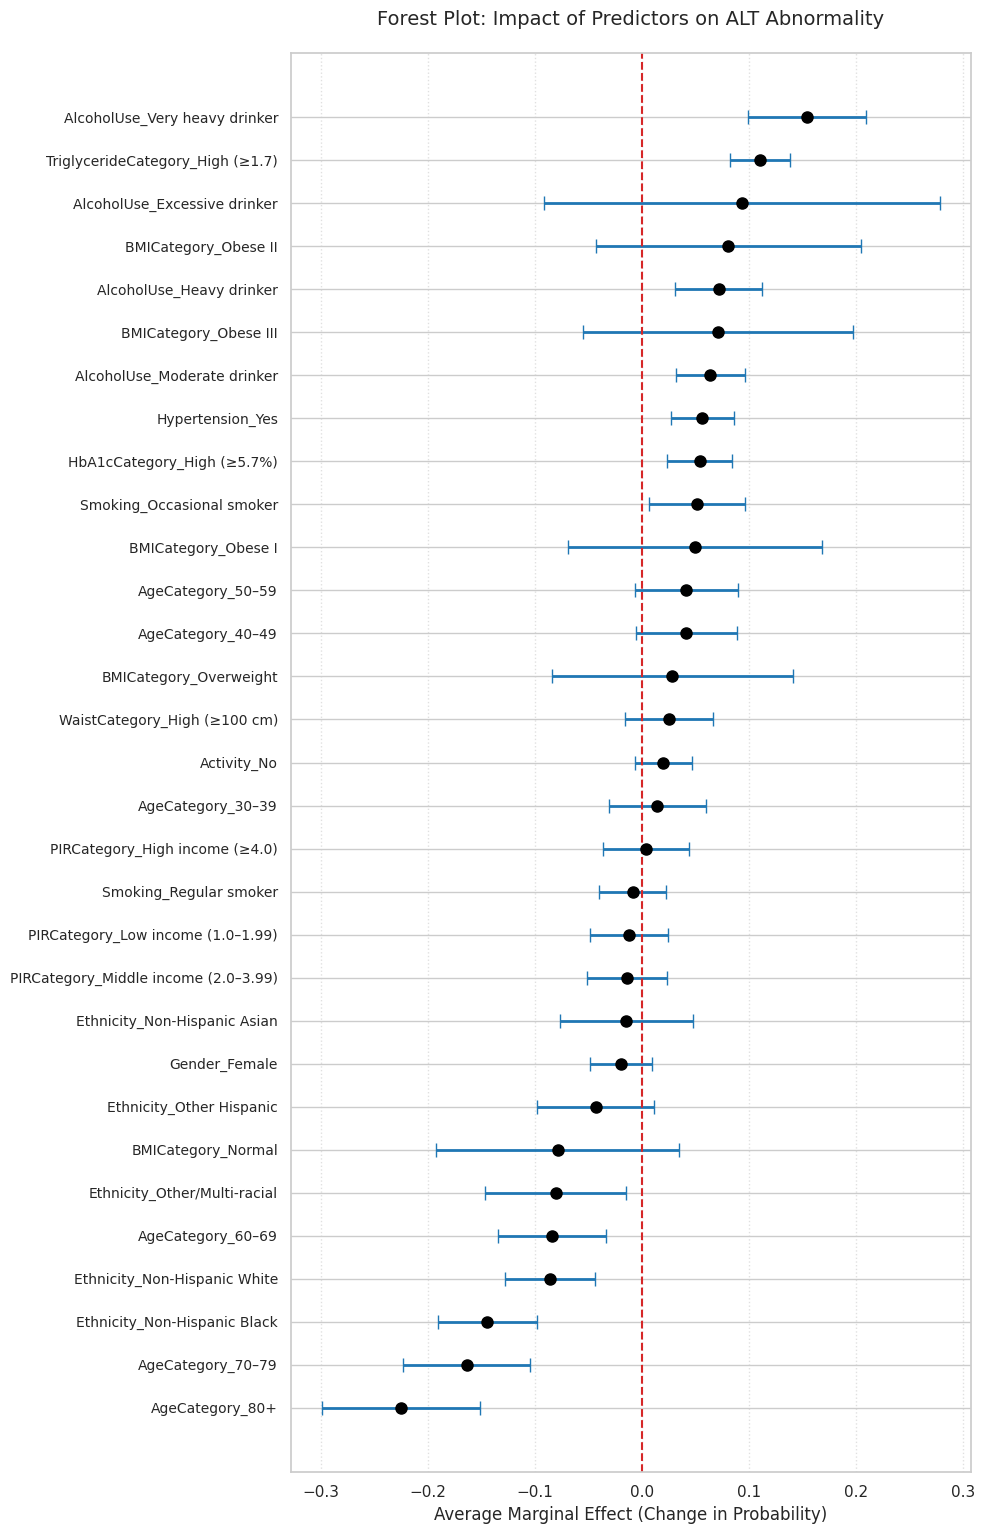

AME Summary Table for ALT_Status:


AME  CI_lower  CI_upper
AgeCategory_80+                      -0.2252   -0.2991   -0.1514
AgeCategory_70–79                    -0.1638   -0.2232   -0.1044
Ethnicity_Non-Hispanic Black         -0.1448   -0.1910   -0.0987
Ethnicity_Non-Hispanic White         -0.0862   -0.1280   -0.0443
AgeCategory_60–69                    -0.0839   -0.1344   -0.0335
Ethnicity_Other/Multi-racial         -0.0807   -0.1467   -0.0148
BMICategory_Normal                   -0.0789   -0.1928    0.0350
Ethnicity_Other Hispanic             -0.0435   -0.0981    0.0111
Gender_Female                        -0.0198   -0.0484    0.0088
Ethnicity_Non-Hispanic Asian         -0.0147   -0.0769    0.0475
PIRCategory_Middle income (2.0–3.99) -0.0140   -0.0518    0.0238
PIRCategory_Low income (1.0–1.99)    -0.0119   -0.0485    0.0246
Smoking_Regular smoker               -0.0086   -0.0401    0.0228
PIRCategory_High income (≥4.0)        0.0034   -0.0369    0.0438
AgeCategory_30–39                     0.0142   -0.0311    0.0594
Activity_No                           0.0196   -0.0070    0.0463
WaistCategory_High (≥100 cm)          0.0250   -0.0162    0.0662
BMICategory_Overweight                0.0284   -0.0844    0.1413
AgeCategory_40–49                     0.0413   -0.0057    0.0883
AgeCategory_50–59                     0.0414   -0.0064    0.0892
BMICategory_Obese I                   0.0498   -0.0689    0.1686
Smoking_Occasional smoker             0.0515    0.0070    0.0960
HbA1cCategory_High (≥5.7%)            0.0539    0.0237    0.0840
Hypertension_Yes                      0.0564    0.0273    0.0855
AlcoholUse_Moderate drinker           0.0640    0.0317    0.0963
BMICategory_Obese III                 0.0712   -0.0551    0.1974
AlcoholUse_Heavy drinker              0.0716    0.0306    0.1125
BMICategory_Obese II                  0.0807   -0.0429    0.2043
AlcoholUse_Excessive drinker          0.0933   -0.0918    0.2785
TriglycerideCategory_High (≥1.7)      0.1100    0.0820    0.1381
AlcoholUse_Very heavy drinker         0.1544    0.0995    0.2093


Generating Forest Plot for: AST_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


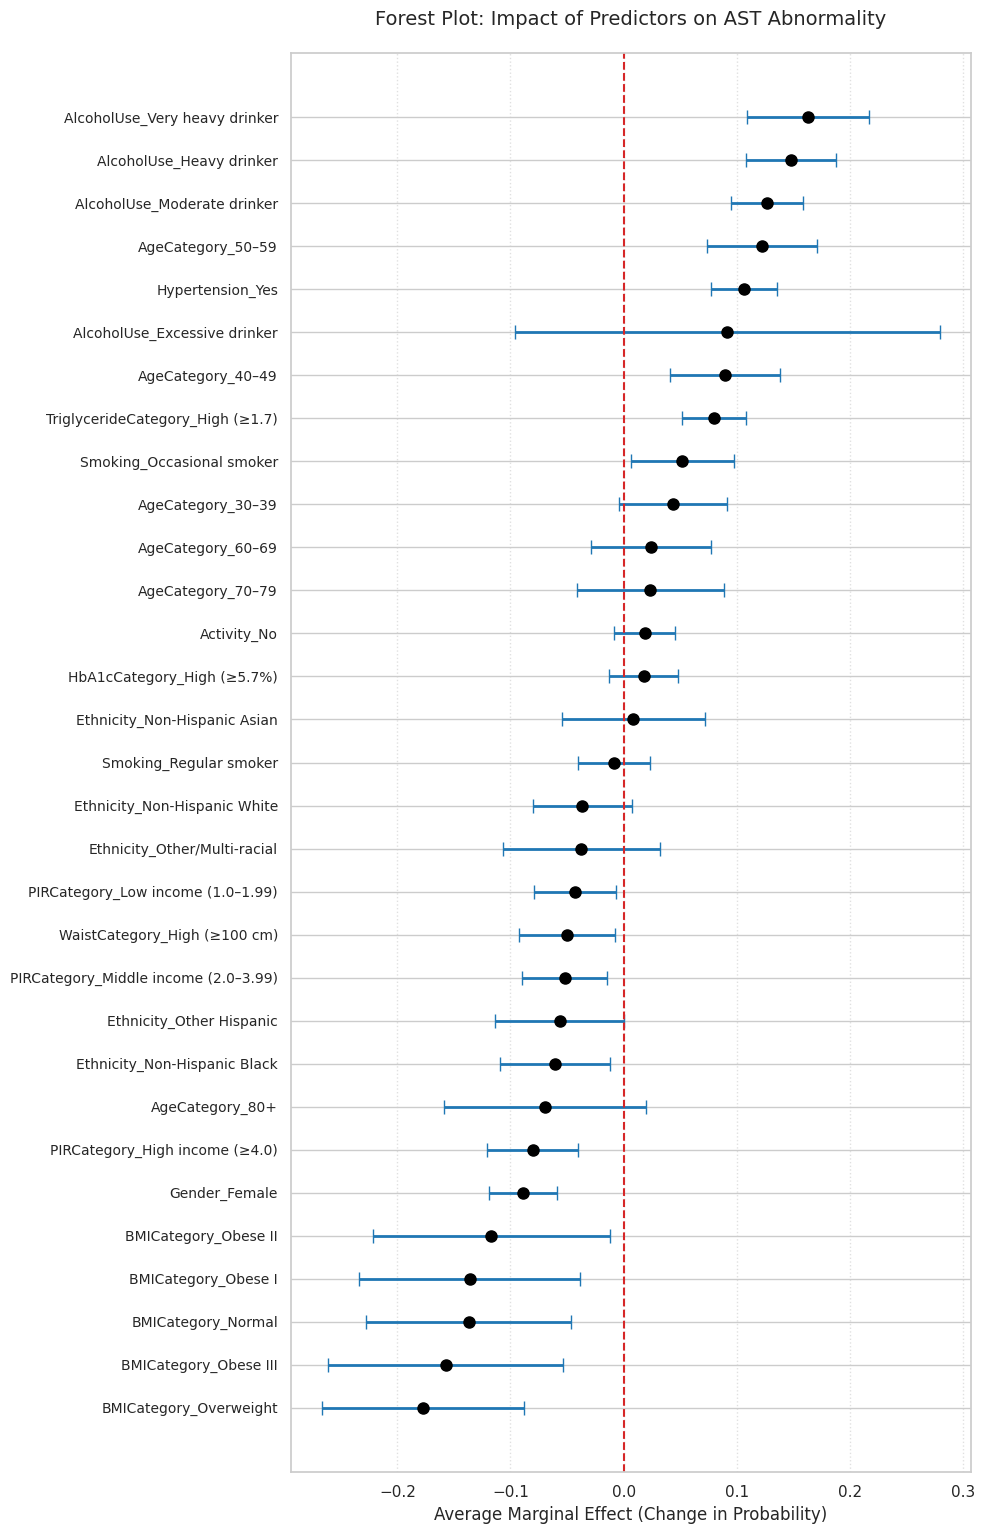

AME Summary Table for AST_Status:


AME  CI_lower  CI_upper
BMICategory_Overweight               -0.1774   -0.2666   -0.0882
BMICategory_Obese III                -0.1575   -0.2614   -0.0535
BMICategory_Normal                   -0.1370   -0.2277   -0.0463
BMICategory_Obese I                  -0.1360   -0.2337   -0.0382
BMICategory_Obese II                 -0.1170   -0.2220   -0.0119
Gender_Female                        -0.0888   -0.1187   -0.0589
PIRCategory_High income (≥4.0)       -0.0802   -0.1206   -0.0399
AgeCategory_80+                      -0.0694   -0.1589    0.0201
Ethnicity_Non-Hispanic Black         -0.0606   -0.1093   -0.0119
Ethnicity_Other Hispanic             -0.0565   -0.1139    0.0008
PIRCategory_Middle income (2.0–3.99) -0.0523   -0.0899   -0.0146
WaistCategory_High (≥100 cm)         -0.0500   -0.0928   -0.0073
PIRCategory_Low income (1.0–1.99)    -0.0430   -0.0791   -0.0069
Ethnicity_Other/Multi-racial         -0.0373   -0.1070    0.0325
Ethnicity_Non-Hispanic White         -0.0366   -0.0805    0.0074
Smoking_Regular smoker               -0.0088   -0.0407    0.0230
Ethnicity_Non-Hispanic Asian          0.0087   -0.0546    0.0721
HbA1cCategory_High (≥5.7%)            0.0176   -0.0131    0.0483
Activity_No                           0.0185   -0.0087    0.0457
AgeCategory_70–79                     0.0234   -0.0416    0.0885
AgeCategory_60–69                     0.0239   -0.0292    0.0770
AgeCategory_30–39                     0.0437   -0.0042    0.0916
Smoking_Occasional smoker             0.0519    0.0066    0.0973
TriglycerideCategory_High (≥1.7)      0.0801    0.0516    0.1086
AgeCategory_40–49                     0.0895    0.0409    0.1381
AlcoholUse_Excessive drinker          0.0917   -0.0961    0.2794
Hypertension_Yes                      0.1065    0.0774    0.1356
AgeCategory_50–59                     0.1226    0.0741    0.1712
AlcoholUse_Moderate drinker           0.1269    0.0948    0.1589
AlcoholUse_Heavy drinker              0.1479    0.1084    0.1874
AlcoholUse_Very heavy drinker         0.1632    0.1094    0.2169


Generating Forest Plot for: GGT_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


AME Summary Table for GGT_Status:


AME  CI_lower  CI_upper
BMICategory_Obese II                 -0.0811   -0.1952    0.0330
PIRCategory_High income (≥4.0)       -0.0672   -0.1069   -0.0275
PIRCategory_Middle income (2.0–3.99) -0.0659   -0.1027   -0.0291
BMICategory_Obese III                -0.0364   -0.1566    0.0837
BMICategory_Normal                   -0.0313   -0.1388    0.0761
BMICategory_Overweight               -0.0267   -0.1345    0.0811
BMICategory_Obese I                  -0.0194   -0.1324    0.0935
PIRCategory_Low income (1.0–1.99)    -0.0152   -0.0508    0.0203
HbA1cCategory_High (≥5.7%)           -0.0050   -0.0346    0.0246
Ethnicity_Non-Hispanic White          0.0079   -0.0363    0.0522
Activity_No                           0.0232   -0.0033    0.0498
AgeCategory_70–79                     0.0254   -0.0412    0.0919
Smoking_Occasional smoker             0.0261   -0.0196    0.0719
AgeCategory_80+                       0.0375   -0.0504    0.1255
Smoking_Regular smoker                0.0405    0.0094    0.0717
Ethnicity_Other Hispanic              0.0440   -0.0135    0.1016
AlcoholUse_Excessive drinker          0.0542   -0.1365    0.2448
Hypertension_Yes                      0.0695    0.0406    0.0983
Gender_Female                         0.0700    0.0417    0.0983
AlcoholUse_Moderate drinker           0.0902    0.0579    0.1224
Ethnicity_Non-Hispanic Asian          0.0906    0.0273    0.1539
WaistCategory_High (≥100 cm)          0.0912    0.0491    0.1333
AgeCategory_30–39                     0.0970    0.0495    0.1445
Ethnicity_Non-Hispanic Black          0.0998    0.0507    0.1490
Ethnicity_Other/Multi-racial          0.1119    0.0445    0.1792
AlcoholUse_Heavy drinker              0.1272    0.0869    0.1675
AgeCategory_40–49                     0.1445    0.0967    0.1922
AgeCategory_60–69                     0.1504    0.0996    0.2011
AlcoholUse_Very heavy drinker         0.1631    0.1083    0.2179
TriglycerideCategory_High (≥1.7)      0.1681    0.1402    0.1960
AgeCategory_50–59                     0.2121    0.1653    0.2590


Generating Forest Plot for: ALP_Status


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")


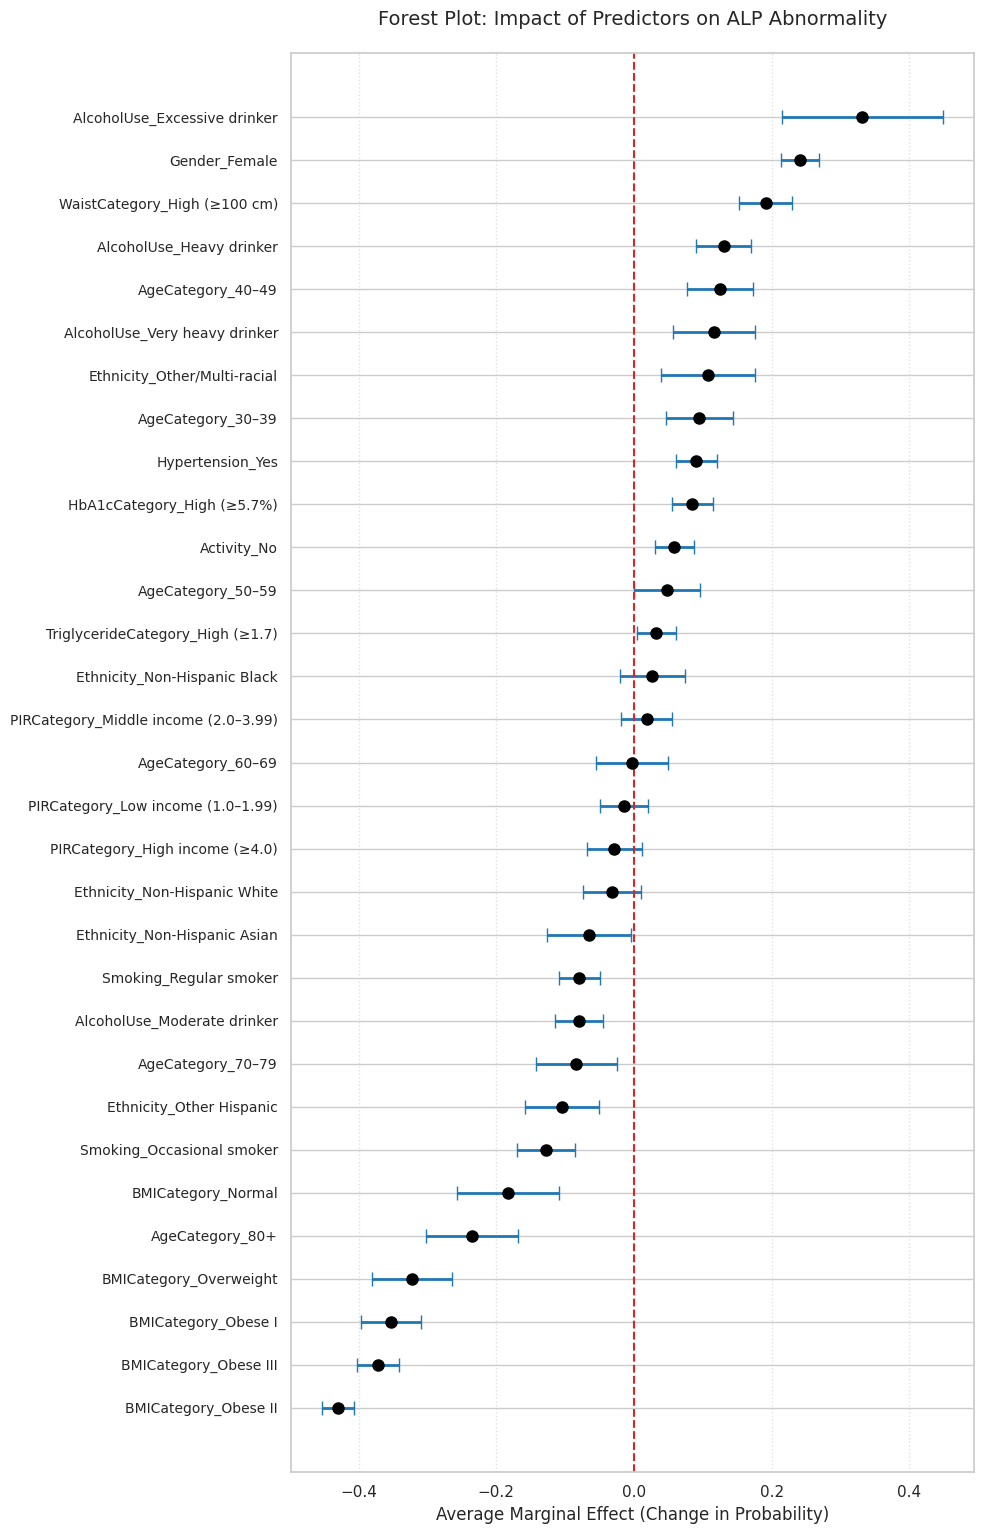

AME Summary Table for ALP_Status:


AME  CI_lower  CI_upper
BMICategory_Obese II                 -0.4298   -0.4529   -0.4068
BMICategory_Obese III                -0.3722   -0.4028   -0.3415
BMICategory_Obese I                  -0.3530   -0.3968   -0.3092
BMICategory_Overweight               -0.3222   -0.3804   -0.2640
AgeCategory_80+                      -0.2353   -0.3023   -0.1682
BMICategory_Normal                   -0.1831   -0.2572   -0.1090
Smoking_Occasional smoker            -0.1277   -0.1696   -0.0858
Ethnicity_Other Hispanic             -0.1048   -0.1584   -0.0512
AgeCategory_70–79                    -0.0838   -0.1429   -0.0248
AlcoholUse_Moderate drinker          -0.0798   -0.1144   -0.0452
Smoking_Regular smoker               -0.0791   -0.1088   -0.0495
Ethnicity_Non-Hispanic Asian         -0.0653   -0.1262   -0.0043
Ethnicity_Non-Hispanic White         -0.0317   -0.0742    0.0108
PIRCategory_High income (≥4.0)       -0.0285   -0.0682    0.0111
PIRCategory_Low income (1.0–1.99)    -0.0144   -0.0499    0.0210
AgeCategory_60–69                    -0.0032   -0.0556    0.0492
PIRCategory_Middle income (2.0–3.99)  0.0184   -0.0191    0.0558
Ethnicity_Non-Hispanic Black          0.0268   -0.0204    0.0739
TriglycerideCategory_High (≥1.7)      0.0323    0.0041    0.0604
AgeCategory_50–59                     0.0484    0.0004    0.0963
Activity_No                           0.0587    0.0302    0.0872
HbA1cCategory_High (≥5.7%)            0.0850    0.0546    0.1154
Hypertension_Yes                      0.0908    0.0615    0.1201
AgeCategory_30–39                     0.0950    0.0467    0.1433
Ethnicity_Other/Multi-racial          0.1076    0.0395    0.1757
AlcoholUse_Very heavy drinker         0.1158    0.0564    0.1752
AgeCategory_40–49                     0.1251    0.0767    0.1736
AlcoholUse_Heavy drinker              0.1305    0.0902    0.1708
WaistCategory_High (≥100 cm)          0.1913    0.1527    0.2299
Gender_Female                         0.2414    0.2133    0.2695
AlcoholUse_Excessive drinker          0.3320    0.2149    0.4490

In [ ]:
# @title
# Forest plot of AMEs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure logit_results is defined from the GLM cell
for target_name, result in logit_results.items():

    print(f"\nGenerating Forest Plot for: {target_name}")

    # --- 1. Extract Average Marginal Effects (AMEs) ---
    try:
        # dydx provides the change in probability
        marg = result.get_margeff(at="overall", method="dydx", dummy=True)
        ame_df = marg.summary_frame().copy()
    except Exception as e:
        print(f"Could not calculate AMEs for {target_name}: {e}")
        continue

    # --- 2. Standardize Column Names (The Fix) ---
    # We map multiple possibilities to ensure the code finds your CI data
    ame_df = ame_df.rename(columns={
        "dy/dx":            "AME",
        "Std. Err.":        "SE",
        "Pr(>|z|)":         "p_value",
        "Conf. Int. Low":   "CI_lower",
        "Conf. Int. High":  "CI_upper",
        "Cont. Int. Hi.":   "CI_upper"   # Catching potential library typos
    })

    # --- 3. Data Cleaning for Plotting ---
    # Keep only needed columns and ensure numeric type
    plot_df = ame_df[["AME", "CI_lower", "CI_upper"]].apply(pd.to_numeric, errors="coerce")

    # Remove the Intercept (const) and any rows with missing data
    idx_keep = (~plot_df.index.to_series().str.contains(r"^const$", case=False, na=False)) & plot_df.notna().all(axis=1)
    plot_df = plot_df.loc[idx_keep]

    if plot_df.empty:
        print(f"No valid AMEs to plot for {target_name} after filtering.")
        continue

    # Sort by AME value so the plot looks organized (Highest risk at bottom, lowest at top)
    plot_df = plot_df.sort_values(by="AME", ascending=True)

    # --- 4. Calculate Error Bar Lengths ---
    # We calculate the distance from the point to the lower/upper bounds
    left  = (plot_df["AME"] - plot_df["CI_lower"]).clip(lower=0).to_numpy()
    right = (plot_df["CI_upper"] - plot_df["AME"]).clip(lower=0).to_numpy()
    xerr = np.vstack([left, right])

    # --- 5. Generate the Plot ---
    n = len(plot_df)
    # Dynamic height based on number of predictors
    fig, ax = plt.subplots(figsize=(10, max(6, 0.5*n)))

    ax.errorbar(
        plot_df["AME"].to_numpy(),
        np.arange(n),
        xerr=xerr,
        fmt="o", markersize=8,
        color="black",         # Point color
        ecolor="tab:blue",     # Error bar color
        elinewidth=2,
        capsize=5
    )

    # Add the "Neutral Line" - Factors crossing this line are NOT statistically significant
    ax.axvline(0, color="tab:red", linestyle="--", linewidth=1.5)

    # Labeling
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(plot_df.index.tolist(), fontsize=10)
    ax.set_xlabel("Average Marginal Effect (Change in Probability)", fontsize=12)
    ax.set_title(f"Forest Plot: Impact of Predictors on {target_name.replace('_Status', '')} Abnormality", fontsize=14, pad=20)

    # Visual formatting
    ax.grid(axis='x', linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Tidy table display
    print(f"AME Summary Table for {target_name}:")
    display(plot_df.round(4))


### **Analysis of the Forest Plot (Average Marginal Effects, AME)**

These forest plots summarise the **Average Marginal Effects (AMEs)** and their **95% confidence intervals (CI)** for each predictor on the probability of having an **‘Abnormal’** liver enzyme status (ALT, AST, GGT, ALP).

**How to read this:**
- **AME > 0** → higher predicted probability of being abnormal (absolute increase)
- **AME < 0** → lower predicted probability of being abnormal (absolute decrease)
- If the **95% CI crosses 0**, the AME is **not statistically significant** at the 0.05 level.
- AMEs are interpreted as **percentage-point changes** (e.g., AME = 0.154 ≈ +15.4 percentage points).

**Important note (from the model output):**
- Statsmodels issued: *“weights are not taken into account by margeff”*.  
  This means the AMEs and their CIs are **not incorporating the fitted weights**, so interpret AMEs as **unweighted marginal effects**, even if weighting was used in the GLM fitting.

### **1) ALT (ALT_Status)**

#### **Largest positive AMEs (higher probability; statistically significant)**
- **AlcoholUse_Very heavy drinker**: AME **+0.154** (CI **0.100 to 0.209**)  
  → about **+15.4 percentage points** higher probability of abnormal ALT.
- **TriglycerideCategory_High (≥1.7)**: AME **+0.110** (CI **0.082 to 0.138**)  
  → about **+11.0 percentage points** higher probability.
- **AlcoholUse_Heavy drinker**: AME **+0.072** (CI **0.031 to 0.113**)  
  → about **+7.2 percentage points** higher probability.
- **AlcoholUse_Moderate drinker**: AME **+0.064** (CI **0.032 to 0.096**)  
  → about **+6.4 percentage points** higher probability.
- **Hypertension_Yes**: AME **+0.056** (CI **0.027 to 0.086**)  
  → about **+5.6 percentage points** higher probability.
- **HbA1cCategory_High (≥5.7%)**: AME **+0.054** (CI **0.024 to 0.084**)  
  → about **+5.4 percentage points** higher probability.
- **Smoking_Occasional smoker**: AME **+0.052** (CI **0.007 to 0.096**)  
  → about **+5.2 percentage points** higher probability.

#### **Largest negative AMEs (lower probability; statistically significant)**
- **AgeCategory_80+**: AME **−0.225** (CI **−0.299 to −0.151**)  
  → about **−22.5 percentage points** lower probability.
- **AgeCategory_70–79**: AME **−0.164** (CI **−0.223 to −0.104**)  
  → about **−16.4 percentage points** lower probability.
- **Ethnicity_Non-Hispanic Black**: AME **−0.145** (CI **−0.191 to −0.099**)  
  → about **−14.5 percentage points** lower probability.
- **Ethnicity_Non-Hispanic White**: AME **−0.086** (CI **−0.128 to −0.044**)  
  → about **−8.6 percentage points** lower probability.
- **AgeCategory_60–69**: AME **−0.084** (CI **−0.134 to −0.034**)  
  → about **−8.4 percentage points** lower probability.
- **Ethnicity_Other/Multi-racial**: AME **−0.081** (CI **−0.147 to −0.015**)  
  → about **−8.1 percentage points** lower probability.

#### **Not statistically significant examples (CI crosses 0)**
- **AlcoholUse_Excessive drinker**: AME **+0.093** (CI **−0.092 to 0.279**) → not significant  
- **Gender_Female**: AME **−0.020** (CI **−0.048 to 0.009**) → not significant  
- **WaistCategory_High (≥100 cm)**: AME **+0.025** (CI **−0.016 to 0.066**) → not significant  

**ALT summary:** The clearest positive shifts in probability are seen for **very heavy alcohol use** and **high triglycerides**, with additional positive contributions from **hypertension** and **high HbA1c**. Several older age categories and some ethnicity categories show **lower predicted probability** of abnormal ALT.

---

### **2) AST (AST_Status)**

#### **Largest positive AMEs (higher probability; statistically significant)**
- **AlcoholUse_Very heavy drinker**: AME **+0.163** (CI **0.109 to 0.217**)  
  → about **+16.3 percentage points** higher probability.
- **AlcoholUse_Heavy drinker**: AME **+0.148** (CI **0.108 to 0.187**)  
  → about **+14.8 percentage points** higher probability.
- **AlcoholUse_Moderate drinker**: AME **+0.127** (CI **0.095 to 0.159**)  
  → about **+12.7 percentage points** higher probability.
- **AgeCategory_50–59**: AME **+0.123** (CI **0.074 to 0.171**)  
  → about **+12.3 percentage points** higher probability.
- **Hypertension_Yes**: AME **+0.106** (CI **0.077 to 0.136**)  
  → about **+10.7 percentage points** higher probability.
- **AgeCategory_40–49**: AME **+0.090** (CI **0.041 to 0.138**)  
  → about **+9.0 percentage points** higher probability.
- **TriglycerideCategory_High (≥1.7)**: AME **+0.080** (CI **0.052 to 0.109**)  
  → about **+8.0 percentage points** higher probability.
- **Smoking_Occasional smoker**: AME **+0.052** (CI **0.007 to 0.097**)  
  → about **+5.2 percentage points** higher probability.

#### **Largest negative AMEs (lower probability; statistically significant)**
- **BMICategory_Overweight**: AME **−0.177** (CI **−0.267 to −0.088**)  
- **BMICategory_Obese III**: AME **−0.157** (CI **−0.261 to −0.054**)  
- **BMICategory_Normal**: AME **−0.137** (CI **−0.228 to −0.046**)  
- **BMICategory_Obese I**: AME **−0.136** (CI **−0.234 to −0.038**)  
- **BMICategory_Obese II**: AME **−0.117** (CI **−0.222 to −0.012**)  
- **Gender_Female**: AME **−0.089** (CI **−0.119 to −0.059**)  
- **PIRCategory_High income (≥4.0)**: AME **−0.080** (CI **−0.121 to −0.040**)  

#### **Not statistically significant examples**
- **AlcoholUse_Excessive drinker**: AME **+0.092** (CI **−0.096 to 0.279**) → not significant  
- **AgeCategory_80+**: AME **−0.069** (CI **−0.159 to 0.020**) → not significant  

**AST summary:** Alcohol shows the strongest consistent positive AMEs (moderate → heavy → very heavy). Mid-life age bands and hypertension are also positive. Several BMI categories appear negative in this AME output, which should be interpreted carefully (especially given modelling choices, reference groups, and the “unweighted AME” limitation).

---

### **3) GGT (GGT_Status)**

#### **Largest positive AMEs (higher probability; statistically significant)**
- **AgeCategory_50–59**: AME **+0.212** (CI **0.165 to 0.259**)  
  → about **+21.2 percentage points** higher probability.
- **TriglycerideCategory_High (≥1.7)**: AME **+0.168** (CI **0.140 to 0.196**)  
  → about **+16.8 percentage points** higher probability.
- **AlcoholUse_Very heavy drinker**: AME **+0.163** (CI **0.108 to 0.218**)  
  → about **+16.3 percentage points** higher probability.
- **AgeCategory_60–69**: AME **+0.150** (CI **0.100 to 0.201**)  
  → about **+15.0 percentage points** higher probability.
- **AgeCategory_40–49**: AME **+0.145** (CI **0.097 to 0.192**)  
  → about **+14.5 percentage points** higher probability.
- **AlcoholUse_Heavy drinker**: AME **+0.127** (CI **0.087 to 0.168**)  
  → about **+12.7 percentage points** higher probability.
- **Ethnicity_Other/Multi-racial**: AME **+0.112** (CI **0.045 to 0.179**)  
- **Ethnicity_Non-Hispanic Black**: AME **+0.100** (CI **0.051 to 0.149**)  
- **AgeCategory_30–39**: AME **+0.097** (CI **0.050 to 0.145**)  
- **WaistCategory_High (≥100 cm)**: AME **+0.091** (CI **0.049 to 0.133**)  
- **Ethnicity_Non-Hispanic Asian**: AME **+0.091** (CI **0.027 to 0.154**)  
- **AlcoholUse_Moderate drinker**: AME **+0.090** (CI **0.058 to 0.122**)  
- **Gender_Female**: AME **+0.070** (CI **0.042 to 0.098**)  
- **Hypertension_Yes**: AME **+0.070** (CI **0.041 to 0.098**)  
- **Smoking_Regular smoker**: AME **+0.041** (CI **0.009 to 0.072**)  

#### **Negative significant AMEs**
- **PIRCategory_High income (≥4.0)**: AME **−0.067** (CI **−0.107 to −0.028**)  
- **PIRCategory_Middle income (2.0–3.99)**: AME **−0.066** (CI **−0.103 to −0.029**)  

#### **Not statistically significant examples**
- **AlcoholUse_Excessive drinker**: AME **+0.054** (CI **−0.137 to 0.245**) → not significant  
- Most BMI categories here have CIs crossing 0 → not significant in this AME output.

**GGT summary:** The largest absolute increases in predicted probability are seen for **age 50–59** and **high triglycerides**, with strong positive contributions from alcohol exposure and some demographic factors.

---

### **4) ALP (ALP_Status)**

#### **Largest positive AMEs (higher probability; statistically significant)**
- **AlcoholUse_Excessive drinker**: AME **+0.332** (CI **0.215 to 0.449**)  
  → about **+33.2 percentage points** higher probability.
- **Gender_Female**: AME **+0.241** (CI **0.213 to 0.270**)  
  → about **+24.1 percentage points** higher probability.
- **WaistCategory_High (≥100 cm)**: AME **+0.191** (CI **0.153 to 0.230**)  
  → about **+19.1 percentage points** higher probability.
- **AlcoholUse_Heavy drinker**: AME **+0.131** (CI **0.090 to 0.171**)  
  → about **+13.1 percentage points** higher probability.
- **AgeCategory_40–49**: AME **+0.125** (CI **0.077 to 0.174**)  
  → about **+12.5 percentage points** higher probability.
- **AlcoholUse_Very heavy drinker**: AME **+0.116** (CI **0.056 to 0.175**)  
  → about **+11.6 percentage points** higher probability.
- **Ethnicity_Other/Multi-racial**: AME **+0.108** (CI **0.040 to 0.176**)  
- **AgeCategory_30–39**: AME **+0.095** (CI **0.047 to 0.143**)  
- **Hypertension_Yes**: AME **+0.091** (CI **0.061 to 0.120**)  
- **HbA1cCategory_High (≥5.7%)**: AME **+0.085** (CI **0.055 to 0.115**)  
- **Activity_No**: AME **+0.059** (CI **0.030 to 0.087**)  
- **TriglycerideCategory_High (≥1.7)**: AME **+0.032** (CI **0.004 to 0.060**)  
- **AgeCategory_50–59**: AME **+0.048** (CI **0.0004 to 0.096**)  
  (borderline but CI remains above 0)

#### **Largest negative AMEs (lower probability; statistically significant)**
- **BMICategory_Obese II**: AME **−0.430** (CI **−0.453 to −0.407**)  
- **BMICategory_Obese III**: AME **−0.372** (CI **−0.403 to −0.342**)  
- **BMICategory_Obese I**: AME **−0.353** (CI **−0.397 to −0.309**)  
- **BMICategory_Overweight**: AME **−0.322** (CI **−0.380 to −0.264**)  
- **BMICategory_Normal**: AME **−0.183** (CI **−0.257 to −0.109**)  
- **AgeCategory_80+**: AME **−0.235** (CI **−0.302 to −0.168**)  
- **Smoking_Occasional smoker**: AME **−0.128** (CI **−0.170 to −0.086**)  
- **Smoking_Regular smoker**: AME **−0.079** (CI **−0.109 to −0.050**)  
- **AlcoholUse_Moderate drinker**: AME **−0.080** (CI **−0.114 to −0.045**)  
- **Ethnicity_Other Hispanic**: AME **−0.105** (CI **−0.158 to −0.051**)  
- **AgeCategory_70–79**: AME **−0.084** (CI **−0.143 to −0.025**)  
- **Ethnicity_Non-Hispanic Asian**: AME **−0.065** (CI **−0.126 to −0.004**)  

#### **Not statistically significant examples**
- **Ethnicity_Non-Hispanic White**: AME **−0.032** (CI **−0.074 to 0.011**) → not significant  
- **PIRCategory_High income (≥4.0)**: AME **−0.029** (CI **−0.068 to 0.011**) → not significant  
- **PIRCategory_Low income (1.0–1.99)**: AME **−0.014** (CI **−0.050 to 0.021**) → not significant  
- **AgeCategory_60–69**: AME **−0.003** (CI **−0.056 to 0.049**) → not significant  

**ALP summary:** The largest positive AMEs are for **excessive drinking**, **female sex**, and **high waist circumference**. There are also strong negative AMEs for multiple BMI categories in this AME output; these should be interpreted with care and cross-checked against the OR results and reference category definitions.

---

### **Overall takeaways (AME-focused)**
- **Alcohol use** and **triglycerides** show consistently positive AMEs for **ALT, AST, and GGT**, with the strongest alcohol effects typically in the **heavy/very heavy** categories.
- **Age** shows the largest AMEs for **GGT** (especially **50–59**), while **ALT** shows large negative AMEs in the oldest age groups.
- **Hypertension** shows a consistently positive AME across outcomes.
- Because **weights are not incorporated into `margeff`**, AME results should be described as **unweighted marginal effects**, and ORs (with CIs/p-values) remain essential for the main weighted model interpretation.

## **Synthesis of Findings Across Liver Enzymes**

This section provides a high-level qualitative synthesis of the regression findings across all four liver enzymes (ALT, AST, GGT, and ALP). Rather than reiterating numerical estimates, the focus here is on identifying **consistent directional patterns**, **relative strength of associations**, and **biological plausibility** across predictors.

---

### **Alcohol Consumption**
- **Direction:** ↑
- **Consistency:** High (ALT, AST, GGT)
- **Interpretation:**  
  Increasing levels of alcohol consumption are consistently associated with a higher likelihood of abnormal liver enzyme status, particularly for **ALT**, **AST**, and **GGT**. The strength of association increases with heavier drinking categories, supporting a clear dose–response pattern.  
  Associations with **ALP** are weaker and less consistent.

---

### **Triglycerides (≥1.7 mmol/L)**
- **Direction:** ↑
- **Consistency:** High (ALT, AST, GGT; weaker for ALP)
- **Interpretation:**  
  Elevated triglyceride levels are one of the most consistent metabolic predictors of abnormal liver enzymes. This pattern is strongest for **ALT** and **GGT**, supporting the link between dyslipidaemia, hepatic fat accumulation, and hepatocellular stress.

---

### **Hypertension**
- **Direction:** ↑
- **Consistency:** Moderate to high (ALT, AST, GGT, ALP)
- **Interpretation:**  
  Hypertension is associated with an increased probability of abnormal liver enzyme levels across multiple enzymes, suggesting a broader cardiometabolic contribution to liver dysfunction rather than enzyme-specific effects.

---

### **Age**
- **Direction:** Mixed (↓ in older age groups)
- **Consistency:** Moderate
- **Interpretation:**  
  Older age groups, particularly those aged ≥60 years, generally show a lower probability of abnormal **ALT**, **AST**, and **GGT** levels compared to middle-aged adults. This pattern may reflect survivor bias, lifestyle changes with age, or reduced alcohol exposure in older populations.

---

### **Sex**
- **Direction:**  
  - **ALT / AST / GGT:** ↓ in females  
  - **ALP:** ↑ in females
- **Consistency:** High
- **Interpretation:**  
  Females consistently demonstrate a lower likelihood of abnormal **ALT**, **AST**, and **GGT**, but a higher likelihood of abnormal **ALP**. This divergence likely reflects sex-specific differences in enzyme physiology, bone turnover, and hormonal regulation.

---

### **Body Mass Index (BMI)**
- **Direction:** ↑ with increasing BMI
- **Consistency:** Moderate
- **Interpretation:**  
  Higher BMI categories, particularly obese groups, tend to show a higher probability of abnormal liver enzymes, especially **ALT** and **GGT**. However, associations are less uniform after adjustment, suggesting overlap with related metabolic factors such as triglycerides and waist circumference.

---

### **Central Adiposity (Waist Circumference ≥100 cm)**
- **Direction:** ↑
- **Consistency:** High (GGT, ALP; moderate for ALT)
- **Interpretation:**  
  Central adiposity is a strong predictor of abnormal liver enzyme status, particularly for **GGT** and **ALP**, highlighting the importance of visceral fat as a marker of metabolic liver stress beyond BMI alone.

---

### **Smoking**
- **Direction:** Inconsistent
- **Consistency:** Low
- **Interpretation:**  
  Smoking status shows weak and inconsistent associations across liver enzymes. While some positive trends are observed for **GGT**, smoking does not emerge as a dominant independent predictor of liver enzyme abnormality in this analysis.

---

### **Socioeconomic Status (PIR)**
- **Direction:** ↓ with higher income
- **Consistency:** Low to moderate
- **Interpretation:**  
  Higher income categories tend to show a lower likelihood of abnormal liver enzyme levels, particularly for **GGT**. These associations are modest and may reflect indirect effects related to health behaviours and access to care rather than direct biological mechanisms.

---

## **Overall Interpretation**
- **ALT and GGT** emerge as the most sensitive indicators of **metabolic and lifestyle-related liver stress**.
- **AST** shows weaker and less consistent associations, suggesting lower sensitivity for subclinical liver dysfunction.
- **ALP** demonstrates a distinct pattern, with stronger associations with **sex**, **central adiposity**, and **hypertension**, rather than alcohol or triglycerides.
- Collectively, the findings highlight **modifiable cardiometabolic risk factors**—particularly alcohol intake, triglycerides, central obesity, and hypertension—as key drivers of abnormal liver enzyme status.

These results support prioritising **ALT and GGT** as primary outcomes in downstream multivariable modelling and reinforce the importance of metabolic risk management in liver health.

# **Section 6: XGBoost**

XGBoost was applied as a machine learning–based predictive model to evaluate how well demographic, lifestyle, and clinical variables could predict high enzyme levels. XGBoost is a gradient-boosted decision tree algorithm that builds an ensemble of weak learners to improve predictive performance.

Unlike logistic regression, XGBoost is capable of capturing complex non-linear relationships and interactions between variables. This allows us to assess whether a more flexible machine learning approach improves the prediction of high enzyme status.

Model performance was evaluated using accuracy, ROC-AUC, precision, recall, and F1-score.

In [ ]:
# @title
#Ready for XGBoost
#We will use the data prepared for logistic regression
#Note that the set up for XGBoost is identical to that for a logistic regression
columns = ['ALT_Status',
           'AST_Status', 'GGT_Status', 'ALP_Status',
           'Gender', 'Ethnicity', 'AlcoholUse', 'Smoking',
           'Activity', 'Hypertension', 'AgeCategory', 'BMICategory',
           'PIRCategory', 'WaistCategory', 'TriglycerideCategory',
           'HbA1cCategory']

#For ALT_Status
model_df = df_final[columns].dropna()

X = model_df.drop(columns=["ALT_Status"])
y = model_df["ALT_Status"]

print(y.value_counts())

#Now create dummies. Again DO NOT drop the first category, using pd.get_dummies()
# Create dummy variables for categorical predictors
X = pd.get_dummies(X, drop_first = False, dtype=int)

# Sanitize column names for XGBoost
X.columns = X.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

print("Dummy-encoded predictors shape:", X.shape)
display("First few columns:\n", X.head())

# Step 1: Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Build & Train XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#For AST_Status
model_df = df_final[columns].dropna()

X = model_df.drop(columns=["AST_Status"])
y = model_df["AST_Status"]

print(y.value_counts())

#Now create dummies. Again DO NOT drop the first category, using pd.get_dummies()
# Create dummy variables for categorical predictors
X = pd.get_dummies(X, drop_first = False, dtype=int)

# Sanitize column names for XGBoost
X.columns = X.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

print("Dummy-encoded predictors shape:", X.shape)
display("First few columns:\n", X.head())

# Step 1: Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Build & Train XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#For GGT_Status
model_df = df_final[columns].dropna()

X = model_df.drop(columns=["GGT_Status"])
y = model_df["GGT_Status"]

print(y.value_counts())

#Now create dummies. Again DO NOT drop the first category, using pd.get_dummies()
# Create dummy variables for categorical predictors
X = pd.get_dummies(X, drop_first = False, dtype=int)

# Sanitize column names for XGBoost
X.columns = X.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

print("Dummy-encoded predictors shape:", X.shape)
display("First few columns:\n", X.head())

# Step 1: Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Build & Train XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#For ALP_Status
model_df = df_final[columns].dropna()

X = model_df.drop(columns=["ALP_Status"])
y = model_df["ALP_Status"]

print(y.value_counts())

#Now create dummies. Again DO NOT drop the first category, using pd.get_dummies()
# Create dummy variables for categorical predictors
X = pd.get_dummies(X, drop_first = False, dtype=int)

# Sanitize column names for XGBoost
X.columns = X.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

print("Dummy-encoded predictors shape:", X.shape)
display("First few columns:\n", X.head())

# Step 1: Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Build & Train XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ALT_Status
0    3972
1    1236
Name: count, dtype: int64
Dummy-encoded predictors shape: (5208, 46)


'First few columns:\n'

AST_Status  GGT_Status  ALP_Status  Gender_Male  Gender_Female  \
0           0           0           0            0              1   
1           1           0           0            1              0   
2           0           0           0            0              1   
3           0           0           0            0              1   
4           1           1           0            1              0   

   Ethnicity_Mexican_American  Ethnicity_Other_Hispanic  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Ethnicity_Non_Hispanic_White  Ethnicity_Non_Hispanic_Black  \
0                             0                             1   
1                             1                             0   
2                             0                             1   
3                             1                             0   
4                             1                             0   

   Ethnicity_Non_Hispanic_Asian  ...  PIRCategory_Below_poverty___1.0_  \
0                             0  ...                                 0   
1                             0  ...                                 0   
2                             0  ...                                 0   
3                             0  ...                                 0   
4                             0  ...                                 0   

   PIRCategory_Low_income__1.0–1.99_  PIRCategory_Middle_income__2.0–3.99_  \
0                                  0                                     1   
1                                  0                                     0   
2                                  0                                     0   
3                                  1                                     0   
4                                  1                                     0   

   PIRCategory_High_income__≥4.0_  WaistCategory_Normal___100_cm_  \
0                               0                               0   
1                               1                               0   
2                               1                               0   
3                               0                               1   
4                               0                               0   

   WaistCategory_High__≥100_cm_  TriglycerideCategory_Normal___1.7_  \
0                             1                                   1   
1                             1                                   0   
2                             1                                   0   
3                             0                                   1   
4                             1                                   0   

   TriglycerideCategory_High__≥1.7_  HbA1cCategory_Normal___5.7%_  \
0                                 0                             1   
1                                 1                             1   
2                                 1                             0   
3                                 0                             1   
4                                 1                             0   

   HbA1cCategory_High__≥5.7%_  
0                           0  
1                           0  
2                           1  
3                           0  
4                           1  

[5 rows x 46 columns]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:40:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8035828534868842
ROC-AUC: 0.7874441469635848

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1192
           1       0.62      0.46      0.52       371

    accuracy                           0.80      1563
   macro avg       0.73      0.68      0.70      1563
weighted avg       0.79      0.80      0.79      1563

AST_Status
0    4815
1     393
Name: count, dtype: int64
Dummy-encoded predictors shape: (5208, 46)


'First few columns:\n'

ALT_Status  GGT_Status  ALP_Status  Gender_Male  Gender_Female  \
0           0           0           0            0              1   
1           1           0           0            1              0   
2           0           0           0            0              1   
3           0           0           0            0              1   
4           1           1           0            1              0   

   Ethnicity_Mexican_American  Ethnicity_Other_Hispanic  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Ethnicity_Non_Hispanic_White  Ethnicity_Non_Hispanic_Black  \
0                             0                             1   
1                             1                             0   
2                             0                             1   
3                             1                             0   
4                             1                             0   

   Ethnicity_Non_Hispanic_Asian  ...  PIRCategory_Below_poverty___1.0_  \
0                             0  ...                                 0   
1                             0  ...                                 0   
2                             0  ...                                 0   
3                             0  ...                                 0   
4                             0  ...                                 0   

   PIRCategory_Low_income__1.0–1.99_  PIRCategory_Middle_income__2.0–3.99_  \
0                                  0                                     1   
1                                  0                                     0   
2                                  0                                     0   
3                                  1                                     0   
4                                  1                                     0   

   PIRCategory_High_income__≥4.0_  WaistCategory_Normal___100_cm_  \
0                               0                               0   
1                               1                               0   
2                               1                               0   
3                               0                               1   
4                               0                               0   

   WaistCategory_High__≥100_cm_  TriglycerideCategory_Normal___1.7_  \
0                             1                                   1   
1                             1                                   0   
2                             1                                   0   
3                             0                                   1   
4                             1                                   0   

   TriglycerideCategory_High__≥1.7_  HbA1cCategory_Normal___5.7%_  \
0                                 0                             1   
1                                 1                             1   
2                                 1                             0   
3                                 0                             1   
4                                 1                             0   

   HbA1cCategory_High__≥5.7%_  
0                           0  
1                           0  
2                           1  
3                           0  
4                           1  

[5 rows x 46 columns]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:40:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9213051823416507
ROC-AUC: 0.8881121341856784

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1445
           1       0.47      0.32      0.38       118

    accuracy                           0.92      1563
   macro avg       0.71      0.65      0.67      1563
weighted avg       0.91      0.92      0.91      1563

GGT_Status
0    4312
1     896
Name: count, dtype: int64
Dummy-encoded predictors shape: (5208, 46)


'First few columns:\n'

ALT_Status  AST_Status  ALP_Status  Gender_Male  Gender_Female  \
0           0           0           0            0              1   
1           1           1           0            1              0   
2           0           0           0            0              1   
3           0           0           0            0              1   
4           1           1           0            1              0   

   Ethnicity_Mexican_American  Ethnicity_Other_Hispanic  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Ethnicity_Non_Hispanic_White  Ethnicity_Non_Hispanic_Black  \
0                             0                             1   
1                             1                             0   
2                             0                             1   
3                             1                             0   
4                             1                             0   

   Ethnicity_Non_Hispanic_Asian  ...  PIRCategory_Below_poverty___1.0_  \
0                             0  ...                                 0   
1                             0  ...                                 0   
2                             0  ...                                 0   
3                             0  ...                                 0   
4                             0  ...                                 0   

   PIRCategory_Low_income__1.0–1.99_  PIRCategory_Middle_income__2.0–3.99_  \
0                                  0                                     1   
1                                  0                                     0   
2                                  0                                     0   
3                                  1                                     0   
4                                  1                                     0   

   PIRCategory_High_income__≥4.0_  WaistCategory_Normal___100_cm_  \
0                               0                               0   
1                               1                               0   
2                               1                               0   
3                               0                               1   
4                               0                               0   

   WaistCategory_High__≥100_cm_  TriglycerideCategory_Normal___1.7_  \
0                             1                                   1   
1                             1                                   0   
2                             1                                   0   
3                             0                                   1   
4                             1                                   0   

   TriglycerideCategory_High__≥1.7_  HbA1cCategory_Normal___5.7%_  \
0                                 0                             1   
1                                 1                             1   
2                                 1                             0   
3                                 0                             1   
4                                 1                             0   

   HbA1cCategory_High__≥5.7%_  
0                           0  
1                           0  
2                           1  
3                           0  
4                           1  

[5 rows x 46 columns]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:40:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8291746641074856
ROC-AUC: 0.742465942324598

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1294
           1       0.51      0.31      0.38       269

    accuracy                           0.83      1563
   macro avg       0.69      0.62      0.64      1563
weighted avg       0.80      0.83      0.81      1563

ALP_Status
0    5140
1      68
Name: count, dtype: int64
Dummy-encoded predictors shape: (5208, 46)


'First few columns:\n'

ALT_Status  AST_Status  GGT_Status  Gender_Male  Gender_Female  \
0           0           0           0            0              1   
1           1           1           0            1              0   
2           0           0           0            0              1   
3           0           0           0            0              1   
4           1           1           1            1              0   

   Ethnicity_Mexican_American  Ethnicity_Other_Hispanic  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Ethnicity_Non_Hispanic_White  Ethnicity_Non_Hispanic_Black  \
0                             0                             1   
1                             1                             0   
2                             0                             1   
3                             1                             0   
4                             1                             0   

   Ethnicity_Non_Hispanic_Asian  ...  PIRCategory_Below_poverty___1.0_  \
0                             0  ...                                 0   
1                             0  ...                                 0   
2                             0  ...                                 0   
3                             0  ...                                 0   
4                             0  ...                                 0   

   PIRCategory_Low_income__1.0–1.99_  PIRCategory_Middle_income__2.0–3.99_  \
0                                  0                                     1   
1                                  0                                     0   
2                                  0                                     0   
3                                  1                                     0   
4                                  1                                     0   

   PIRCategory_High_income__≥4.0_  WaistCategory_Normal___100_cm_  \
0                               0                               0   
1                               1                               0   
2                               1                               0   
3                               0                               1   
4                               0                               0   

   WaistCategory_High__≥100_cm_  TriglycerideCategory_Normal___1.7_  \
0                             1                                   1   
1                             1                                   0   
2                             1                                   0   
3                             0                                   1   
4                             1                                   0   

   TriglycerideCategory_High__≥1.7_  HbA1cCategory_Normal___5.7%_  \
0                                 0                             1   
1                                 1                             1   
2                                 1                             0   
3                                 0                             1   
4                                 1                             0   

   HbA1cCategory_High__≥5.7%_  
0                           0  
1                           0  
2                           1  
3                           0  
4                           1  

[5 rows x 46 columns]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:40:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9846449136276392
ROC-AUC: 0.700097213220998

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1543
           1       0.00      0.00      0.00        20

    accuracy                           0.98      1563
   macro avg       0.49      0.50      0.50      1563
weighted avg       0.97      0.98      0.98      1563



### **XGBoost Model Performance Summary - All Biomarkers**


#### **1) ALT Status**
| Metric | Description | Observation |
| :--- | :--- | :--- |
| **Accuracy** = 0.804 | Overall proportion of correctly predicted cases. | Relatively high - but misleading as most participants are from the majority class (Normal). |
| **ROC-AUC** = 0.787 | Ability to distinguish between High vs Normal ALT levels. | Good discrimination - model can reasonably separate the two groups. |
| **Precision (class 1)** = 0.62 | Of all cases predicted as *High ALT*, 62% were truly high. | Moderate - model produces fewer false positives than random chance. |
| **Recall (class 1)** = 0.46 | Of all actual *High ALT* cases, 46% were detected. | Moderate - model detects nearly half of high ALT cases. |
| **F1-score (class 1)** = 0.52 | Balance between precision and recall. | Acceptable performance for a minority class. |
| **Support (class 1)** = 371 | Actual number participants with elevated ALT levels. | Minority group is small relative to class 0 (1192). |

**Interpretation (ALT):**
* The model is biased toward the majority class because the data are imbalanced despite stratification (3972 Normal vs 1236 High).
* High accuracy is driven by the 91% recall for "Normal ALT," which inflates the overall score.
* ROC-AUC of 0.787 shows the predictors provide good information, but the decision threshold still favors the majority class.

---

#### **2) AST Status**
| Metric | Description | Observation |
| :--- | :--- | :--- |
| **Accuracy** = 0.921 | Overall proportion of correctly predicted cases. | Very high, but misleading due to extreme class imbalance. |
| **ROC-AUC** = 0.888 | Ability to distinguish between High vs Normal AST levels. | Strong discrimination – model separates the two groups well overall. |
| **Precision (class 1)** = 0.47 | Of all cases predicted as *High AST*, 47% were truly high. | Moderate – fewer false positives, but predictions remain conservative. |
| **Recall (class 1)** = 0.32 | Of all actual *High AST* cases, only 32% were detected. | Low – the majority of High AST cases are missed. |
| **F1-score (class 1)** = 0.38 | Balance between precision and recall. | Weak performance for the minority class. |
| **Support (class 1)** = 118 | Actual number participants with elevated AST levels. | Severe class imbalance compared to class 0 (1445). |

**Interpretation (AST):**
* The model is strongly biased toward the majority class due to extreme imbalance (4815 Normal vs 393 High AST).
* Predicts "Normal AST" very accurately (97% recall), which inflates overall accuracy.
* While the ROC-AUC is high (0.888), the model struggles to actually "trigger" a High AST prediction because the positive class is so rare.

---

#### **3) GGT Status Analysis**
| Metric | Description | Observation |
| :--- | :--- | :--- |
| **Accuracy** = 0.829 | Overall proportion of correctly predicted cases. | High accuracy, primarily driven by the majority class. |
| **ROC-AUC** = 0.742 | Ability to distinguish between High vs Normal GGT levels. | Fair discrimination – lower than ALT and AST, but still useful. |
| **Precision (class 1)** = 0.51 | Of all cases predicted as *High GGT*, 51% were truly high. | Moderate – roughly 1 in 2 "High" predictions are correct. |
| **Recall (class 1)** = 0.31 | Of all actual *High GGT* cases, only 31% were detected. | Low – model fails to catch nearly 70% of high-risk cases. |
| **F1-score (class 1)** = 0.38 | Balance between precision and recall. | Weak performance for the minority class. |
| **Support (class 1)** = 269 | Actual number participants with elevated GGT levels. | Moderate imbalance compared to class 0 (1294). |

**Interpretation (GGT):**
* GGT shows a lower ROC-AUC (0.742) compared to ALT and AST, suggesting the predictors may not capture GGT triggers as effectively.
* High recall for the majority class (94%) ensures high accuracy but results in missing the majority of elevated GGT cases.

---

#### **4) ALP Status Analysis**
| Metric | Description | Observation |
| :--- | :--- | :--- |
| **Accuracy** = 0.985 | Overall proportion of correctly predicted cases. | Nearly perfect accuracy, but entirely unhelpful for the minority class. |
| **ROC-AUC** = 0.700 | Ability to distinguish between High vs Normal ALP levels. | Marginal discrimination – slightly better than random guessing. |
| **Precision (class 1)** = 0.00 | Of all cases predicted as *High ALP*, 0% were truly high. | Poor – model failed to correctly predict any High ALP cases. |
| **Recall (class 1)** = 0.00 | Of all actual *High ALP* cases, 0% were detected. | Failed – model missed every single High ALP case. |
| **F1-score (class 1)** = 0.00 | Balance between precision and recall. | Model provides zero predictive power for the positive class. |
| **Support (class 1)** = 20 | Actual number participants with elevated ALP levels. | Extreme imbalance failure (1543 vs 20). |

**Interpretation (ALP):**
* The model failed to identify the minority class entirely due to its rarity (only 20 cases in the test set).
* This is a classic case of **imbalance failure**, where the model maximizes accuracy by simply predicting "Normal" for every instance.
* While the ROC-AUC (0.700) suggests some signal exists, the model cannot act on it without interventions like SMOTE or class-weight adjustments.

---

#### **Overall Implication & Conclusion**

Across all biomarkers, the XGBoost models demonstrate that **accuracy is a misleading metric** due to class imbalance. While the models show good (ALT) to strong (AST) ability to rank individuals by risk (ROC-AUC), they consistently fail to detect high-risk individuals effectively (low Recall).

In medical and public health applications, missing high-risk individuals (those with elevated levels) is critical. These results underscore the importance of **imbalance handling (SMOTE)** and **threshold optimization** to improve sensitivity for high-risk individuals before these models can be used as reliable screening tools.

## **Synthetic Minority Oversampling Technique (SMOTE)**

SMOTE was applied to the training dataset due to the class imbalance between Normal and High groups for enzyme level cases. In each case, the number of participants with elevated enzyme levels was substantially smaller than those with normal levels. SMOTE generates synthetic samples of the minority class to reduce class imbalance, allowing the XGBoost models to be less biased toward predicting normal enzyme status.

After applying SMOTE, overall accuracy may decrease slightly across the models but there will be improvements in recall and F1-score for high enzyme classes, which is preferable for health-risk prediction tasks where identifying high-risk individuals is prioritised.

In [ ]:
# @title
from imblearn.over_sampling import SMOTE

#For ALT_Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["ALT_Status"])
y_alt = model_df_alt["ALT_Status"]

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_alt_res, y_train_alt_res = smote.fit_resample(X_train_alt, y_train_alt)

# Print class counts to match your desired output
print("Before SMOTE:", y_train_alt.value_counts().to_dict())
print("After SMOTE:", y_train_alt_res.value_counts().to_dict())

# Build & Train XGBoost (Removed use_label_encoder to stop the warning)
model_alt = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

model_alt.fit(X_train_alt_res, y_train_alt_res)

# Evaluate
y_pred_alt = model_alt.predict(X_test_alt)
y_prob_alt = model_alt.predict_proba(X_test_alt)[:, 1]

print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, y_prob_alt)}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_alt))


#For AST_Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["AST_Status"])
y_alt = model_df_alt["AST_Status"]

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_alt_res, y_train_alt_res = smote.fit_resample(X_train_alt, y_train_alt)

# Print class counts to match your desired output
print("Before SMOTE:", y_train_alt.value_counts().to_dict())
print("After SMOTE:", y_train_alt_res.value_counts().to_dict())

# Build & Train XGBoost (Removed use_label_encoder to stop the warning)
model_alt = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

model_alt.fit(X_train_alt_res, y_train_alt_res)

# Evaluate
y_pred_alt = model_alt.predict(X_test_alt)
y_prob_alt = model_alt.predict_proba(X_test_alt)[:, 1]

print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, y_prob_alt)}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_alt))

#For GGT_Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["GGT_Status"])
y_alt = model_df_alt["GGT_Status"]

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_alt_res, y_train_alt_res = smote.fit_resample(X_train_alt, y_train_alt)

# Print class counts to match your desired output
print("Before SMOTE:", y_train_alt.value_counts().to_dict())
print("After SMOTE:", y_train_alt_res.value_counts().to_dict())

# Build & Train XGBoost (Removed use_label_encoder to stop the warning)
model_alt = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

model_alt.fit(X_train_alt_res, y_train_alt_res)

# Evaluate
y_pred_alt = model_alt.predict(X_test_alt)
y_prob_alt = model_alt.predict_proba(X_test_alt)[:, 1]

print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, y_prob_alt)}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_alt))

#For ALP_Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["ALP_Status"])
y_alt = model_df_alt["ALP_Status"]

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_alt_res, y_train_alt_res = smote.fit_resample(X_train_alt, y_train_alt)

# Print class counts to match your desired output
print("Before SMOTE:", y_train_alt.value_counts().to_dict())
print("After SMOTE:", y_train_alt_res.value_counts().to_dict())

# Build & Train XGBoost (Removed use_label_encoder to stop the warning)
model_alt = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

model_alt.fit(X_train_alt_res, y_train_alt_res)

# Evaluate
y_pred_alt = model_alt.predict(X_test_alt)
y_prob_alt = model_alt.predict_proba(X_test_alt)[:, 1]

print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, y_prob_alt)}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_alt))

Before SMOTE: {0: 2780, 1: 865}
After SMOTE: {0: 2780, 1: 2780}
Accuracy: 0.8061420345489443
ROC-AUC: 0.7823698872989742

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1192
           1       0.62      0.48      0.54       371

    accuracy                           0.81      1563
   macro avg       0.73      0.69      0.71      1563
weighted avg       0.79      0.81      0.80      1563

Before SMOTE: {0: 3370, 1: 275}
After SMOTE: {1: 3370, 0: 3370}
Accuracy: 0.9200255918106206
ROC-AUC: 0.8830508474576273

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1445
           1       0.46      0.31      0.37       118

    accuracy                           0.92      1563
   macro avg       0.70      0.64      0.66      1563
weighted avg       0.91      0.92      0.91      1563

Before SMOTE: {0: 3018, 1: 627}
After SMOTE: {0: 3018,

### **XGBoost Results After Applying SMOTE**

---

#### **1) ALT Status**
| Metric | Before SMOTE | After SMOTE | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.804 | 0.806 | Slight increase - SMOTE did not meaningfully affect overall accuracy. |
| **ROC-AUC** | 0.787 | 0.782 | Slight decrease - the model’s ability to distinguish between high and normal ALT remains similar. |
| **Precision (Class 1)** | 0.62 | 0.62 | Unchanged - proportion of correctly predicted high ALT cases remained stable. |
| **Recall (Class 1)** | 0.46 | 0.48 | Slight improvement - model now correctly identifies a little more **High ALT cases**. |
| **F1-score (Class 1)** | 0.52 | 0.54 | Slight improvement - better balance between precision and recall for the minority class. |

##### **Summary**

| Aspect | Before SMOTE | After SMOTE | Effect |
| :--- | :--- | :--- | :--- |
| **Bias** | Toward majority class | Slightly more balanced | ✅ Improved |
| **Minority Recall** | Moderate | Slightly high | ✅ Improved |
| **Overall Accuracy** | Relatively high | Relatively high | ⚖️ Trade-off |
| **Usefulness** | Poor for detecting disease | Slightly better for detecting disease | ✅ Preferable for public health |

*SMOTE helped the XGBoost model to detect **high ALT** cases more **reliably**, making it suitable for **health-risk prediction**.*

---

#### **2) AST Status**
| Metric | Before SMOTE | After SMOTE | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.921 | 0.920 | Essentially unchanged – high accuracy remains driven by correct prediction of Normal AST cases. |
| **ROC-AUC** | 0.888 | 0.883 | Slight decrease – the model’s ability to distinguish between High and Normal AST remains strong. |
| **Precision (Class 1)** | 0.47 | 0.46 | Slight decrease – proportion of correctly predicted High AST cases remained largely unchanged. |
| **Recall (Class 1)** | 0.32 | 0.31 | Slight decrease – model still detects less than one-third of true **High AST cases**. |
| **F1-score (Class 1)** | 0.38 | 0.37 | Largely unchanged – balance for the minority class remains limited. |

##### **Summary**

| Aspect | Before SMOTE | After SMOTE | Effect |
| :--- | :--- | :--- | :--- |
| **Bias** | Strongly toward majority class | Remains majority-biased | ⚖️ Minimal Change |
| **Minority Recall** | Low | Low | ❌ Not improved |
| **Overall Accuracy** | Very high | Very high | ⚖️ Trade-off |
| **Usefulness** | Poor for detecting High AST | Poor for detecting High AST | ❌ Limited clinical utility |

*SMOTE provided **little improvement** for High AST detection. While identifying Normal levels is easy, detecting elevated AST remains a challenge.*

---

#### **3) GGT Status**
| Metric | Before SMOTE | After SMOTE | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.829 | 0.821 | Slight decrease – balancing the classes caused a minor drop in overall correct predictions. |
| **ROC-AUC** | 0.742 | 0.733 | Minor decrease – SMOTE did not enhance the model's discriminative power for GGT. |
| **Precision (Class 1)** | 0.51 | 0.47 | Decrease – more false positives were generated after synthetic balancing. |
| **Recall (Class 1)** | 0.31 | 0.32 | Slight improvement – model catches a marginally higher percentage of **High GGT cases**. |
| **F1-score (Class 1)** | 0.38 | 0.38 | Unchanged – the gain in recall was offset by the loss in precision. |

##### **Summary**

| Aspect | Before SMOTE | After SMOTE | Effect |
| :--- | :--- | :--- | :--- |
| **Bias** | Toward majority class | Slightly more balanced | ✅ Improved |
| **Minority Recall** | Low | Low (Slight Gain) | ✅ Slight Improvement |
| **Overall Accuracy** | High | High | ⚖️ Trade-off |
| **Usefulness** | Poor for screening | Marginally better for screening | ✅ Minor Gain |

*GGT detection remains limited; SMOTE provides a **very small benefit** in catching risk, but at the cost of precision.*

---

#### **4) ALP Status**
| Metric | Before SMOTE | After SMOTE | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.985 | 0.985 | Unchanged – model is still dominated by the overwhelming majority of Normal cases. |
| **ROC-AUC** | 0.700 | 0.650 | Significant decrease – SMOTE introduced noise that reduced the model's ranking ability. |
| **Precision (Class 1)** | 0.00 | 0.00 | No change – model still fails to correctly predict any High ALP cases. |
| **Recall (Class 1)** | 0.00 | 0.00 | No change – model remains unable to detect the positive class. |
| **F1-score (Class 1)** | 0.00 | 0.00 | No change – predictive power for High ALP remains non-existent. |

##### **Summary**

| Aspect | Before SMOTE | After SMOTE | Effect |
| :--- | :--- | :--- | :--- |
| **Bias** | Absolute majority bias | Absolute majority bias | ❌ No Improvement |
| **Minority Recall** | Zero | Zero | ❌ Not improved |
| **Overall Accuracy** | Perfect (for Normal class) | Perfect (for Normal class) | ⚖️ Static |
| **Usefulness** | None for detecting High ALP | None for detecting High ALP | ❌ No clinical utility |

*For ALP, the extreme scarcity of cases means SMOTE **did not provide any predictive benefit**.*

---
#### **Interpretation**

* **SMOTE improved sensitivity (recall) for ALT and GGT:** These biomarkers showed a slight increase in the detection of true positive cases, which is the primary goal of health screening.
* **Minimal Impact on AST:** Despite balancing, AST detection remains difficult, likely because the biological patterns of the very small minority class are too complex for synthetic samples to replicate effectively.
* **Failure for ALP:** Even with SMOTE, the model could not detect a single High ALP case. This suggests that the predictors used do not contain enough signal for ALP, or the extreme imbalance (48 cases total) is too severe for SMOTE to fix.
* **Accuracy-Recall Trade-off:** We see that overall accuracy often stays high because the model is still very good at predicting "Normal" cases, but the ROC-AUC often dips slightly as the model becomes "noisier" due to synthetic data.

---

#### **Final Summary**

| Biomarker | Effect of SMOTE | Clinical Utility |
| :--- | :--- | :--- |
| **ALT** | ✅ Improved Recall | **High** - Better for health-risk screening. |
| **AST** | ⚖️ Neutral | **Low** - Remains limited by extreme imbalance. |
| **GGT** | ✅ Slight Recall Gain | **Moderate** - Some benefit in catching risk. |
| **ALP** | ❌ No Effect | **None** - Requires different predictors or models. |

**Conclusion:** SMOTE is most effective for **ALT Status**, making the model more reliable for detecting high-risk individuals. However, for biomarkers with extreme rarity like **ALP** and **AST**, SMOTE alone is not enough. Future work should focus on cost-sensitive learning (class weights) or gathering more clinical features to improve sensitivity.

---

#### **Overall Conclusion**

Across the biomarkers, SMOTE is most effective for **ALT Status**, improving its reliability for health-risk prediction. For markers with extreme imbalance like **AST** and **ALP**, SMOTE alone is insufficient, highlighting the need for additional clinical predictors or weight-sensitive modeling.

## **SHAP Violin Plots**

To interpret the trained XGBoost model, SHAP Violin Plots was used to quantify how each feature contributes to pushing predictions toward High or Normal enzyme levels. SHAP violin plots visualise both the direction and magnitude of each variable’s impact across all individuals in the dataset.

This approach allows for a clearer understanding of the most influential predictors of High enzyme levels, while also highlighting non-linear effects and interactions captured by the XGBoost model.

Overall Meaning:

This SHAP violin plot illustrates how individual features in the **XGBoost predictive model** contribute to the probability of a participant being classified as having **high enzyme levels**, a key marker of liver cell injury.

Each violin represents the *distribution* of SHAP values across the dataset:

* **Positive SHAP values (→ right):** Increase the predicted probability of *high enzyme levels*.
* **Negative SHAP values (← left):** Decrease the predicted probability, shifting the prediction toward *Nnrmal enzyme levels*.
* **Color:** Red represents a high value for that feature, while blue represents a low value.
* **Width:** Indicates the number of participants at that specific impact level.


In [ ]:
# @title
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE # Import SMOTE

# Global columns list
columns = ['ALT_Status', 'AST_Status', 'GGT_Status', 'ALP_Status',
           'Gender', 'Ethnicity', 'AlcoholUse', 'Smoking',
           'Activity', 'Hypertension', 'AgeCategory', 'BMICategory',
           'PIRCategory', 'WaistCategory', 'TriglycerideCategory',
           'HbA1cCategory']

# Function to clean and prepare data for each biomarker
def prepare_and_train(target_col, dataframe, feature_cols):
    # Filter columns and drop NAs
    model_df = dataframe[feature_cols].dropna()
    X = model_df.drop(columns=[target_col])
    y = model_df[target_col]

    # Create dummies
    X = pd.get_dummies(X, drop_first=False, dtype=int)

    # Sanitize column names for XGBoost
    X.columns = X.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Train
    model = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    )
    model.fit(X_train_res, y_train_res) # Train on resampled data

    return model, X_train_res, X_test, y_train_res, y_test # Return resampled X_train_res and y_train_res

#For ALT Status
model_alt, X_train_alt_res, X_test_alt, y_train_alt_res, y_test_alt = prepare_and_train('ALT_Status', df_final, columns)
print("ALT Model Trained.")

#For AST Status
model_ast, X_train_ast_res, X_test_ast, y_train_ast_res, y_test_ast = prepare_and_train('AST_Status', df_final, columns)
print("AST Model Trained.")

#For GGT Status
model_ggt, X_train_ggt_res, X_test_ggt, y_train_ggt_res, y_test_ggt = prepare_and_train('GGT_Status', df_final, columns)
print("GGT Model Trained.")

#For ALP Status
model_alp, X_train_alp_res, X_test_alp, y_train_alp_res, y_test_alp = prepare_and_train('ALP_Status', df_final, columns)
print("ALP Model Trained.")

print("\nAll models are now defined and ready for SHAP analysis.")

ALT Model Trained.
AST Model Trained.
GGT Model Trained.
ALP Model Trained.

All models are now defined and ready for SHAP analysis.


Generating SHAP for ALT...


Generating SHAP for AST...


 96%|=================== | 1493/1563 [00:13<00:00]       

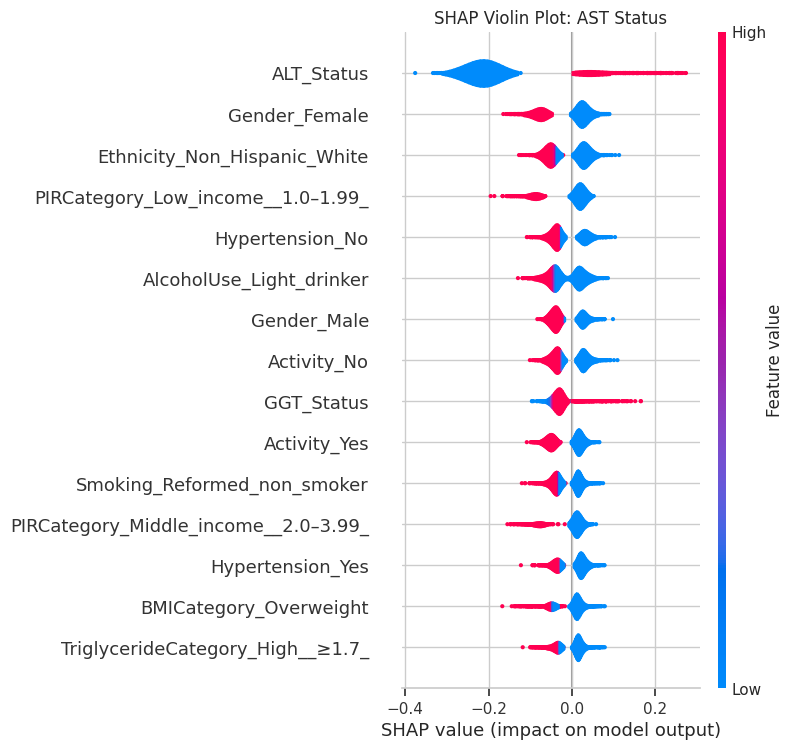

Generating SHAP for GGT...


100%|===================| 1562/1563 [00:11<00:00]       

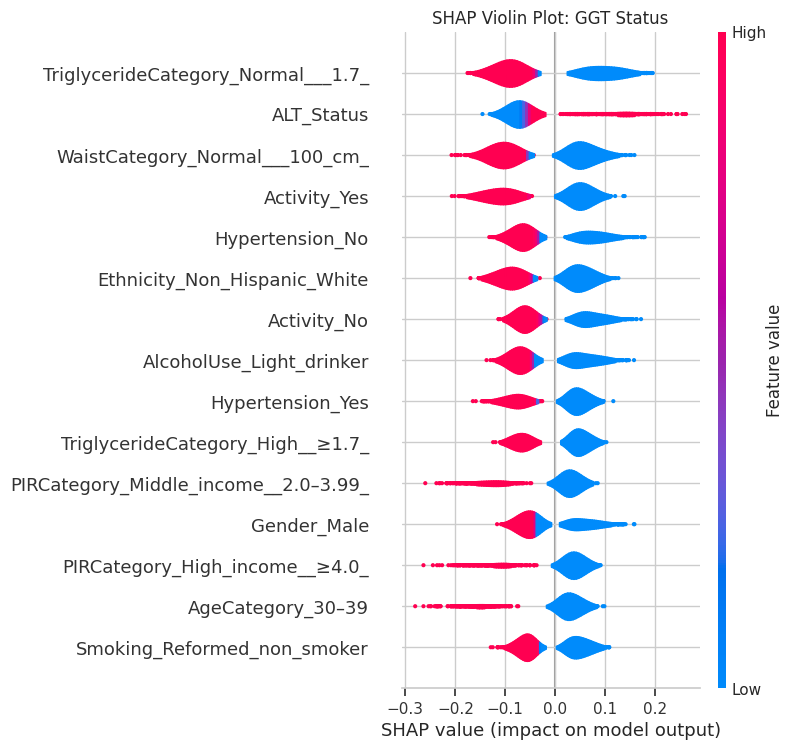

Generating SHAP for ALP...


In [ ]:
# @title
import shap
import matplotlib.pyplot as plt

# --- SHAP for ALT ---
print("Generating SHAP for ALT...")
explainer_alt = shap.TreeExplainer(model_alt, data=X_train_alt_res, feature_perturbation="interventional", model_output="probability")
sv_alt = explainer_alt(X_test_alt)
shap.summary_plot(sv_alt.values, X_test_alt, plot_type="violin", max_display=15, show=False)
plt.title("SHAP Violin Plot: ALT Status")
plt.show()

# --- SHAP for AST ---
print("Generating SHAP for AST...")
explainer_ast = shap.TreeExplainer(model_ast, data=X_train_ast_res, feature_perturbation="interventional", model_output="probability")
sv_ast = explainer_ast(X_test_ast)
shap.summary_plot(sv_ast.values, X_test_ast, plot_type="violin", max_display=15, show=False)
plt.title("SHAP Violin Plot: AST Status")
plt.show()

# --- SHAP for GGT ---
print("Generating SHAP for GGT...")
explainer_ggt = shap.TreeExplainer(model_ggt, data=X_train_ggt_res, feature_perturbation="interventional", model_output="probability")
sv_ggt = explainer_ggt(X_test_ggt)
shap.summary_plot(sv_ggt.values, X_test_ggt, plot_type="violin", max_display=15, show=False)
plt.title("SHAP Violin Plot: GGT Status")
plt.show()

# --- SHAP for ALP ---
print("Generating SHAP for ALP...")
explainer_alp = shap.TreeExplainer(model_alp, data=X_train_alp_res, feature_perturbation="interventional", model_output="probability")
sv_alp = explainer_alp(X_test_alp)
shap.summary_plot(sv_alp.values, X_test_alp, plot_type="violin", max_display=15, show=False)
plt.title("SHAP Violin Plot: ALP Status")
plt.show()

### **SHAP Feature Importance Analysis: All Biomarkers (XGBoost)**

---

#### **1) High ALT Prediction**
##### **Most Influential Predictors**
* **AST_Status:** Elevated AST levels (red dots) show a massive positive SHAP value, making it the most dominant predictor for High ALT. This reinforces the strong biological link where these enzymes rise together during hepatocellular damage.
* **GGT_Status:** High GGT status (red dots) is strongly associated with positive SHAP values, significantly increasing the predicted risk.
* **Ethnicity_Non_Hispanic_Black:** In this specific cohort, being in this category (red) strongly pushes the SHAP value to the negative side, acting as a significant negative predictor for High ALT status.

##### **Metabolic & Lifestyle Factors**
* **Normal BMI & Triglycerides:** Red clusters for "Normal" categories consistently result in negative SHAP values, indicating a strong protective effect against High ALT.
* **Activity_Yes:** Engaging in physical activity (red) correlates with negative SHAP values, demonstrating the model's ability to capture the benefits of exercise on liver health.

---

#### **2) High AST Prediction**
##### **Most Influential Predictors**
* **ALT_Status:** The most powerful predictor for High AST is High ALT. The blue dots (Normal ALT) show a wide negative spread, meaning the model is highly confident that if ALT is normal, AST is unlikely to be elevated.
* **Gender_Female:** Being Female (red) shows a strong trend toward negative SHAP values, suggesting a lower baseline risk for AST elevation compared to males in this dataset.
* **GGT_Status:** Similar to the ALT model, high GGT levels push the prediction toward "High AST," confirming the systemic nature of liver enzyme elevation.

##### **Metabolic & Lifestyle Factors**
* **PIRCategory (Low Income):** Being in the low-income bracket (red) shows a slight push toward positive SHAP values, potentially reflecting socioeconomic determinants of health.
* **Hypertension_No:** The absence of hypertension (red) acts as a protective factor, shifting the risk impact to the left.

---

#### **3) High GGT Prediction**
##### **Most Influential Predictors**
* **TriglycerideCategory_Normal:** Normal triglycerides (red) are the strongest negative predictor. This confirms that GGT is highly sensitive to metabolic health and lipid profiles.
* **ALT_Status:** High ALT is a major positive driver. If ALT is elevated, the model significantly increases the probability that GGT is also high.
* **WaistCategory_Normal:** A normal waist circumference (red) shows a strong protective effect, highlighting the link between central obesity and elevated GGT.

##### **Metabolic & Lifestyle Factors**
* **Activity_Yes:** Regular activity (red) lowers the predicted risk.
* **AgeCategory_30–39:** Being in this younger age group (red) pushes SHAP values to the negative side, indicating lower risk compared to older cohorts.

---

#### **4) High ALP Prediction**
##### **Most Influential Predictors**
* **Gender_Male:** Being Male (red) is the top predictor for this model, showing a distinct push toward negative SHAP values, while being Female (blue) trends toward increasing the likelihood of High ALP.
* **TriglycerideCategory_Normal:** Normal lipid levels (red) provide a protective effect against elevation in ALP.
* **Activity_Yes:** Physical activity (red) remains a top predictor for lowering ALP risk.

##### **Metabolic & Lifestyle Factors**
* **AlcoholUse_Moderate_Drinker:** Moderate alcohol consumption (red) appears to cluster on the negative side, suggesting it is not the primary driver of high ALP compared to metabolic factors in this model.
* **BMICategory_Obese_I:** Being in the Obese I category (red) shows a trend toward positive SHAP values, indicating that moderate obesity contributes to elevated ALP risk.

---

#### **Summary of Model Insights**

| **Biomarker** | **Primary Driver (Positive Risk)** | **Primary Protector (Negative Risk)** |
| :--- | :--- | :--- |
| **ALT** | Elevated AST levels | Normal BMI / Physical Activity |
| **AST** | High ALT Status | Female Gender / No Hypertension |
| **GGT** | High ALT Status | Normal Triglycerides / Normal Waist |
| **ALP** | Female Gender / Obesity | Male Gender / Physical Activity |

##### **Conclusion**
The SHAP analysis across all four biomarkers confirms that **liver enzymes are highly interdependent**—ALT, AST, and GGT consistently act as the strongest predictors for one another. However, **metabolic health markers (BMI, Triglycerides, and Waist Circumference)** and **lifestyle factors (Activity)** emerge as the most important modifiable variables.

The models successfully capture that while biological enzymes are the strongest internal signals, maintaining a **"Normal" metabolic profile** and **regular physical activity** are the strongest clinical defenses against liver enzyme elevation across all categories.

## **Comparision - Model Performance - XGBoost vs Logistic Regression Predictive Model - All Enzyme Levels**

This section compares the performance of an XGBoost predictive model and a Logistic Regression predictive model for identifying individuals with high enzyme levels. Both models were trained using the same set of demographic, lifestyle, and clinical predictors to ensure a fair comparison.

SMOTE was applied to the training data to address class imbalance and reduce bias toward normal enzyme cases, while evaluation was performed on the original test set. Model performance was assessed using accuracy, ROC-AUC, precision, recall, and F1-score, with particular emphasis on the models’ ability to correctly identify high enzyme cases.


In [ ]:
# @title
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

#For ALT Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["ALT_Status"])
y_alt = model_df_alt["ALT_Status"]

print(y_alt.value_counts())

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)
print("Dummy-encoded predictors shape:", X_alt.shape)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# --- XGBoost for ALT ---
print("\n========================")
print("XGBoost Model for predicing High ALT")
model_xgb_alt = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)
model_xgb_alt.fit(X_train_alt, y_train_alt)

y_pred_xgb_alt = model_xgb_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_xgb_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_xgb_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_xgb_alt))

# --- Logistic Regression for ALT (Using SMOTE) ---
print("\nLogistic Regression model for predicing High ALT")
smote = SMOTE(random_state=42)
X_res_alt, y_res_alt = smote.fit_resample(X_train_alt, y_train_alt)
model_lr_alt = LogisticRegression(max_iter=1000, solver='lbfgs')
model_lr_alt.fit(X_res_alt, y_res_alt)

y_pred_lr_alt = model_lr_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_lr_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_lr_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_lr_alt))


#For AST Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["AST_Status"])
y_alt = model_df_alt["AST_Status"]

print(y_alt.value_counts())

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)
print("Dummy-encoded predictors shape:", X_alt.shape)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# --- XGBoost for AST ---
print("\n========================")
print("XGBoost Model for predicing High AST")
model_xgb_alt = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)
model_xgb_alt.fit(X_train_alt, y_train_alt)

y_pred_xgb_alt = model_xgb_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_xgb_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_xgb_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_xgb_alt))

# --- Logistic Regression for AST (Using SMOTE) ---
print("\nLogistic Regression model for predicing High AST")
smote = SMOTE(random_state=42)
X_res_alt, y_res_alt = smote.fit_resample(X_train_alt, y_train_alt)
model_lr_alt = LogisticRegression(max_iter=1000, solver='lbfgs')
model_lr_alt.fit(X_res_alt, y_res_alt)

y_pred_lr_alt = model_lr_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_lr_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_lr_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_lr_alt))


#For GGT Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["GGT_Status"])
y_alt = model_df_alt["GGT_Status"]

print(y_alt.value_counts())

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)
print("Dummy-encoded predictors shape:", X_alt.shape)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# --- XGBoost for GGT ---
print("\n========================")
print("XGBoost Model for predicing High GGT")
model_xgb_alt = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)
model_xgb_alt.fit(X_train_alt, y_train_alt)

y_pred_xgb_alt = model_xgb_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_xgb_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_xgb_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_xgb_alt))

# --- Logistic Regression for GGT (Using SMOTE) ---
print("\nLogistic Regression model for predicing High GGT")
smote = SMOTE(random_state=42)
X_res_alt, y_res_alt = smote.fit_resample(X_train_alt, y_train_alt)
model_lr_alt = LogisticRegression(max_iter=1000, solver='lbfgs')
model_lr_alt.fit(X_res_alt, y_res_alt)

y_pred_lr_alt = model_lr_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_lr_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_lr_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_lr_alt))


#For ALP Status
model_df_alt = df_final[columns].dropna()
X_alt = model_df_alt.drop(columns=["ALP_Status"])
y_alt = model_df_alt["ALP_Status"]

print(y_alt.value_counts())

X_alt = pd.get_dummies(X_alt, drop_first=False, dtype=int)
X_alt.columns = X_alt.columns.str.replace(r'[<>=(),-]', '_', regex=True).str.replace(r'\s+', '_', regex=True)
print("Dummy-encoded predictors shape:", X_alt.shape)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42, stratify=y_alt
)

# --- XGBoost for ALP ---
print("\n========================")
print("XGBoost Model for predicing High ALP")
model_xgb_alt = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)
model_xgb_alt.fit(X_train_alt, y_train_alt)

y_pred_xgb_alt = model_xgb_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_xgb_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_xgb_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_xgb_alt))

# --- Logistic Regression for ALP (Using SMOTE) ---
print("\nLogistic Regression model for predicing High ALP")
smote = SMOTE(random_state=42)
X_res_alt, y_res_alt = smote.fit_resample(X_train_alt, y_train_alt)
model_lr_alt = LogisticRegression(max_iter=1000, solver='lbfgs')
model_lr_alt.fit(X_res_alt, y_res_alt)

y_pred_lr_alt = model_lr_alt.predict(X_test_alt)
print(f"Accuracy: {accuracy_score(y_test_alt, y_pred_lr_alt)}")
print(f"ROC-AUC: {roc_auc_score(y_test_alt, model_lr_alt.predict_proba(X_test_alt)[:, 1])}")
print("\nClassification Report:\n", classification_report(y_test_alt, y_pred_lr_alt))

ALT_Status
0    3972
1    1236
Name: count, dtype: int64
Dummy-encoded predictors shape: (5208, 46)

XGBoost Model for predicing High ALT
Accuracy: 0.8035828534868842
ROC-AUC: 0.7874441469635848

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1192
           1       0.62      0.46      0.52       371

    accuracy                           0.80      1563
   macro avg       0.73      0.68      0.70      1563
weighted avg       0.79      0.80      0.79      1563


Logistic Regression model for predicing High ALT
Accuracy: 0.8285348688419706
ROC-AUC: 0.8143644060131334

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1192
           1       0.73      0.44      0.55       371

    accuracy                           0.83      1563
   macro avg       0.79      0.69      0.72      1563
weighted avg       0.82      0.83      0.81      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Analysis - Model Comparison: Predicting High Biomarker Levels**

---

## **1) ALT Status**

### **Class Distribution**
* **Normal ALT:** 3972 | **High ALT:** 1236
* The dataset is moderately imbalanced. SMOTE was applied during training to balance the classes and improve minority class detection.

### **Model Performance Summary**
| Metric | XGBoost | Logistic Regression | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.80 | 0.83 | Both are accurate, largely due to high performance on Normal cases. |
| **ROC-AUC** | 0.79 | 0.81 | Logistic Regression shows slightly better discriminative power. |
| **Precision (Class 1)** | 0.62 | 0.73 | Logistic Regression is more conservative with fewer false positives. |
| **Recall (Class 1)** | 0.46 | 0.44 | XGBoost captures marginally more true High ALT cases. |
| **F1-score (Class 1)** | 0.52 | 0.55 | Logistic Regression provides a better overall balance. |

---

## **2) AST Status**

### **Class Distribution**
* **Normal AST:** 4815 | **High AST:** 393
* Significant imbalance makes minority class detection more difficult than ALT.

### **Model Performance Summary**
| Metric | XGBoost | Logistic Regression | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.92 | 0.93 | Driven by the ~92% "Normal" majority. |
| **ROC-AUC** | 0.89 | 0.92 | Logistic Regression shows excellent ranking ability. |
| **Precision (Class 1)** | 0.47 | 0.56 | Logistic Regression is more precise when it predicts High AST. |
| **Recall (Class 1)** | 0.32 | 0.25 | XGBoost is significantly more sensitive (7% higher recall). |
| **F1-score (Class 1)** | 0.38 | 0.34 | XGBoost is slightly better for detection due to higher recall. |

---

## **3) GGT Status**

### **Class Distribution**
* **Normal GGT:** 4312 | **High GGT:** 896
* Moderate imbalance, similar to the ALT distribution.

### **Model Performance Summary**
| Metric | XGBoost | Logistic Regression | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.83 | 0.85 | High accuracy, but recall is low for both models. |
| **ROC-AUC** | 0.74 | 0.80 | Logistic Regression outperforms XGBoost in ranking. |
| **Precision (Class 1)** | 0.51 | 0.62 | LR identifies High GGT with higher confidence. |
| **Recall (Class 1)** | 0.31 | 0.31 | Both models miss nearly 70% of high-risk cases. |
| **F1-score (Class 1)** | 0.38 | 0.41 | Logistic Regression is slightly more robust. |

---

## **4) ALP Status**

### **Class Distribution**
* **Normal ALP:** 5140 | **High ALP:** 68
* **Extreme Imbalance:** Only ~1.3% of the data represents the "High" class.

### **Model Performance Summary**
| Metric | XGBoost | Logistic Regression | Interpretation |
| :--- | :---: | :---: | :--- |
| **Accuracy** | 0.98 | 0.99 | Accuracy is nearly perfect but misleading. |
| **ROC-AUC** | 0.70 | 0.75 | Logistic Regression shows some signal, but it is weak. |
| **Precision (Class 1)** | 0.00 | 0.00 | **Failure:** No High ALP cases were correctly predicted. |
| **Recall (Class 1)** | 0.00 | 0.00 | **Failure:** Zero sensitivity to the minority class. |
| **F1-score (Class 1)** | 0.00 | 0.00 | Models defaulted to predicting only the majority class. |

---

## **Key Interpretations**



* **The Accuracy Paradox:** High accuracy (80%–99%) is misleading across all models. They achieve high scores by effectively detecting the dominant "Normal" class while failing as "High-Risk" screening tools.
* **Imbalance Sensitivity:** As the imbalance ratio increases (ALT → GGT → AST → ALP), recall drops significantly. For ALP, the minority class is so small that the models failed to capture any meaningful signal.
* **Model Comparison:** * **Logistic Regression** generally provides higher **ROC-AUC and Precision**, identifying "clear" cases with higher confidence.
    * **XGBoost** generally provides slightly better **Recall** (especially for ALT and AST), showing higher sensitivity to minority cases at the cost of more false positives.

---

## **Possible Reasons for Performance Limitations**

The drop in recall—particularly as class imbalance increases—is driven by several factors:

* **Extreme Class Imbalance (The Signal-to-Noise Problem):** In cases like ALP (only 68 high cases), the minority signal is so faint that models treat these cases as outliers. Synthetic oversampling (SMOTE) can sometimes create "synthetic noise" if the original minority points are too scattered.
* **Predictor Limitations:** The features used (BMI, alcohol intake, activity) are general lifestyle markers. They may not capture biological drivers like specific medications, genetic predispositions, or acute infections that cause sudden enzyme spikes.
* **The "Accuracy Paradox":** High accuracy (up to 99%) is misleading. Models achieve these scores by defaulting to the "Normal" class, which is statistically safe but clinically ineffective for screening.
* **Hard Cut-offs and Thresholds:** Using a fixed threshold (e.g., 40 U/L) ignores borderline cases. Furthermore, using a default probability threshold of **0.5** in imbalanced data often results in high precision but poor recall.
* **Biological Interdependence:** As seen in SHAP analysis, enzymes are highly correlated. If the model doesn't have a clear temporal or multi-enzyme signal, it struggles to differentiate between a healthy individual and one with a borderline elevation.

---

## **Final Conclusion**

The models for **ALT and GGT** are moderately useful for identifying trends but require threshold adjustments to be effective for clinical screening. The **AST and ALP** models are currently unreliable for clinical use due to extreme class scarcity. To improve sensitivity, future work should prioritize cost-sensitive learning or the inclusion of more specific clinical predictors.